In [1]:
import random
import numpy as np

# set seeds
np.random.seed(42)
random.seed(42)

## Prepare Datasets

In [2]:
import kagglehub
import pandas as pd

years = ["2015",  "2016",  "2017",  "2018",	"2019"]

dfs = {}

### World Happiness

In [3]:
wh_path = kagglehub.dataset_download("unsdsn/world-happiness")
dfs_list = [pd.read_csv(wh_path+'/'+year+'.csv') for year in years]
# rename columns to ensure dfs alignment before concatting
dfs_to_concat = []
for i, df in enumerate(dfs_list):
    df['Year'] = years[i]
    df.rename(columns={'Country or region': 'Country'}, inplace=True)
    df.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
    df.rename(columns={'Score': 'Happiness Score'}, inplace=True)
    dfs_to_concat.append(df[['Year', 'Country', 'Happiness Score']])

dfs["world_happiness"] = pd.concat(dfs_to_concat).reset_index(drop=True)

100%|██████████| 36.8k/36.8k [00:00<00:00, 7.48MB/s]

Extracting files...


We note that some Country names are inconsistent across different years, for example:

In [4]:
dfs["world_happiness"][dfs["world_happiness"]['Country'].str.contains("Trinidad")]

,Year,Country,Happiness Score
40,2015,Trinidad and Tobago,6.168
200,2016,Trinidad and Tobago,6.168
352,2017,Trinidad and Tobago,6.168
507,2018,Trinidad & Tobago,6.192
664,2019,Trinidad & Tobago,6.192


In [5]:
dfs["world_happiness"]['Country'] = dfs["world_happiness"]['Country'].str.replace('&', 'and')
dfs["world_happiness"]['Country'] = dfs["world_happiness"]['Country'].str.replace('Northern', 'North')
dfs["world_happiness"]['Country'] = dfs["world_happiness"]['Country'].str.replace('region', 'Region')
dfs["world_happiness"]['Country'] = dfs["world_happiness"]['Country'].str.replace('Hong Kong S.A.R., China', 'Hong Kong')
dfs["world_happiness"]['Country'] = dfs["world_happiness"]['Country'].str.replace('Taiwan Province of China', 'Taiwan')
dfs["world_happiness"]['Country'] = dfs["world_happiness"]['Country'].str.replace('North Macedonia', 'Macedonia')
dfs["world_happiness"]['Country'] = dfs["world_happiness"]['Country'].str.replace('Macedonia', 'North Macedonia')

### Life Expectancy

In [6]:
le_path = kagglehub.dataset_download("mjshri23/life-expectancy-and-socio-economic-world-bank")
dfs["life_expectancy"] = pd.read_csv(le_path+'/life expectancy.csv')
dfs["life_expectancy"] = dfs["life_expectancy"][(dfs["life_expectancy"]['Year'] >= 2015) & (dfs["life_expectancy"]['Year'] <= 2019)]
dfs["life_expectancy"].rename(columns={'Country Name': 'Country'}, inplace=True)
dfs["life_expectancy"].head()

100%|██████████| 168k/168k [00:00<00:00, 24.4MB/s]

Extracting files...


,Country,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
2436,Afghanistan,AFG,South Asia,Low income,2015,63.377,21.5,5949.999809,10.105348,3.255800,11.127000,2.0,NaN,3673696.62,6528888.62,6988545.28
2437,Angola,AGO,Sub-Saharan Africa,Lower middle income,2015,59.398,14.5,31649.999619,2.605795,3.486896,7.392000,NaN,NaN,1176597.19,8056503.17,3778744.40
2438,Albania,ALB,Europe & Central Asia,Upper middle income,2015,78.025,4.9,4619.999886,4.896312,3.437970,17.190001,NaN,46.333013,80908.83,57284.75,607281.32
2439,Andorra,AND,Europe & Central Asia,High income,2015,NaN,NaN,469.999999,6.283535,3.280350,NaN,NaN,99.999998,1928.58,765.96,17120.05
2440,United Arab Emirates,ARE,Middle East & North Africa,High income,2015,77.285,6.5,195240.005493,3.583594,NaN,1.768000,NaN,91.829772,380850.30,120097.10,1379068.24


### Human Freedom Index

In [7]:
hfi_path = kagglehub.dataset_download("gsutters/the-human-freedom-index")
dfs["freedom"] = pd.read_csv(hfi_path+'/hfi_cc_2022.csv')
# rename columns: 'year' -> 'Year'
dfs["freedom"].rename(columns={'year': 'Year', 'region': 'Region', 'countries':'Country'}, inplace=True)
dfs["freedom"] = dfs["freedom"][(dfs["freedom"]['Year'] >= 2015) & (dfs["freedom"]['Year'] <= 2019)]
dfs["freedom"].head()

100%|██████████| 3.04M/3.04M [00:00<00:00, 46.2MB/s]

Extracting files...


,Year,Country,Region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
165,2019,Albania,Eastern Europe,8.07,42.0,2.0,5.903741,4.725831,4.047825,7.375907,...,5.651538,6.666667,9.742477,6.2425,5.621940,7.175250,6.850062,7.700885,7.79,31.0
166,2019,Algeria,Middle East & North Africa,5.08,155.0,4.0,4.913311,5.503872,4.254187,5.345021,...,4.215154,2.222222,9.305002,2.5775,8.771111,7.029528,5.686753,5.840164,4.86,159.0
167,2019,Angola,Sub-Saharan Africa,5.96,127.0,4.0,2.773262,4.352009,3.478950,5.264300,...,2.937894,2.444444,8.730805,4.7025,7.916416,6.782923,5.585830,5.974672,5.55,153.0
168,2019,Argentina,Latin America & the Caribbean,7.33,75.0,2.0,6.824288,5.679943,4.218635,6.570627,...,2.714233,5.777778,9.579288,6.5300,5.726521,6.508295,6.139352,5.994265,5.44,154.0
169,2019,Armenia,Caucasus & Central Asia,8.32,34.0,1.0,NaN,NaN,NaN,7.287006,...,5.170406,5.555556,9.863530,6.9575,9.302574,7.040738,7.315051,7.819774,7.98,17.0


### Population

In [8]:
population_path = kagglehub.dataset_download("mscidoamit/world-population-by-country-years-1960-2023")
dfs["population"] = pd.read_csv(population_path+'/World Population 1960-2023 by Country.csv')
dfs["population"].rename(columns={'Country Name': 'Country'}, inplace=True)
dfs["population"] = dfs["population"][['Country'] + years]
dfs["population"] = dfs["population"].melt(id_vars=["Country"], var_name="Year", value_name="Population")

100%|██████████| 71.1k/71.1k [00:00<00:00, 36.0MB/s]

Extracting files...


### Country Longitude Latitude

In [9]:
ll_path = kagglehub.dataset_download("bohnacker/country-longitude-latitude")
ll_path = kagglehub.dataset_download("bohnacker/country-longitude-latitude")
dfs["long_lat"] = pd.read_csv(ll_path+'/longitude-latitude.csv')
dfs["long_lat"] = dfs["long_lat"][['Country', 'Longitude', 'Latitude']]

100%|██████████| 13.5k/13.5k [00:00<00:00, 19.3MB/s]

Extracting files...


## Join the Datasets

In [10]:
dfs["world_happiness"]['Country'].nunique(), dfs["freedom"]['Country'].nunique(), dfs["life_expectancy"]['Country'].nunique(), dfs["population"]['Country'].nunique(), dfs["long_lat"]['Country'].nunique()

(164, 165, 174, 266, 318)

In [11]:
# convert year to a numerical column in all dfs
dfs["world_happiness"]['Year'] = dfs["world_happiness"]['Year'].astype(int)
dfs["freedom"]['Year'] = dfs["freedom"]['Year'].astype(int)
dfs["life_expectancy"]['Year'] = dfs["life_expectancy"]['Year'].astype(int)
dfs["population"]['Year'] = dfs["population"]['Year'].astype(int)

Make sure that country names are aligned across all dataset to ensure a faithful merge

In [12]:
countries = {}
for key,df in dfs.items():
    countries[key] = set(df['Country'].unique())

In [13]:
union = set.union(*countries.values())
intersection = set.intersection(*countries.values())
union - intersection

{'Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Arab World',
 'Aruba',
 'Bahamas',
 'Bahamas, The',
 'Barbados',
 'Bermuda',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bouvet Island',
 'British Honduras',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Brunei Darussalam',
 'Burma',
 'Cabo Verde',
 'Cape Verde',
 'Caribbean Netherlands: Bonaire, Sint Eustatius and Saba',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Ceylon',
 'Channel Islands',
 "China, People's Republic of",
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Congo [DRC]',
 'Congo [Republic]',
 'Congo, Dem. Rep.',
 'Congo, Democratic Republic of the',
 'Congo, Rep.',
 'Congo, Republic of the',
 'Cook Islands',
 "Cote d'Ivoire",
 'Cuba',
 'Curacao',
 'Curaça

In [14]:
for key, df in dfs.items():
    df['Country'] = df['Country'].str.replace('Congo [Republic]', 'Congo (Brazzaville)')
    df['Country'] = df['Country'].str.replace('Congo, Rep.', 'Congo (Brazzaville)')
    df['Country'] = df['Country'].str.replace('Congo, Dem. Rep.', 'Congo (Kinshasa)')
    df['Country'] = df['Country'].str.replace('Congo, Democratic Republic of the', 'Congo (Kinshasa)')
    df['Country'] = df['Country'].str.replace('Czechia', 'Czech Republic')
    df['Country'] = df['Country'].str.replace('Egypt, Arab Rep.', 'Egypt')
    df['Country'] = df['Country'].str.replace('Gambia, The', 'Gambia')
    df['Country'] = df['Country'].str.replace('Hong Kong SAR, China', 'Hong Kong')
    df['Country'] = df['Country'].str.replace('Iran, Islamic Rep.', 'Iran')
    df['Country'] = df['Country'].str.replace('Iran, Islamic Rep.', 'Iran')
    df['Country'] = df['Country'].str.replace('Kyrgyz Republic', 'Kyrgyzstan')
    df['Country'] = df['Country'].str.replace('Russian Federation', 'Russia')
    df['Country'] = df['Country'].str.replace('Korea, Rep.', 'South Korea')
    df['Country'] = df['Country'].str.replace('Syrian Arab Republic', 'Syria')
    df['Country'] = df['Country'].str.replace('Turkiye', 'Turkey')
    df['Country'] = df['Country'].str.replace('Venezuela, RB', 'Venezuela')
    df['Country'] = df['Country'].str.replace('Viet Nam', 'Vietnam')
    df['Country'] = df['Country'].str.replace('Yemen, Rep.', 'Yemen')
    df['Country'] = df['Country'].str.replace('Bahamas, The', 'Bahamas')
    df['Country'] = df['Country'].str.replace('Brunei Darussalam', 'Brunei')
    df['Country'] = df['Country'].str.replace('Cape Verde', 'Cabo Verde')
    df['Country'] = df['Country'].str.replace('Bonaire, Sint Eustatius and Saba', 'Caribbean Netherlands: Bonaire, Sint Eustatius and Saba')
    df['Country'] = df['Country'].str.replace('Curaçao', 'Curacao')
    df['Country'] = df['Country'].str.replace('Curaçao', 'Curacao')

In [15]:
merged_df = dfs["world_happiness"].merge(dfs["life_expectancy"], on=["Country", "Year"], how="left").merge(dfs["freedom"], on=["Country", "Year"], how="left", suffixes=('_le', '_fr')).merge(dfs["population"], on=["Country", "Year"], how="inner").merge(dfs["long_lat"].drop_duplicates(), on=["Country"], how="left")
merged_df.head()

,Year,Country,Happiness Score,Country Code,Region_le,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,...,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,Population,Longitude,Latitude
0,2015,Switzerland,7.587,CHE,Europe & Central Asia,High income,82.897561,2.5,39090.000153,11.007950,...,9.5200,8.373754,9.293812,8.521664,8.569759,8.52,4.0,8282396.0,8.227512,46.818188
1,2015,Iceland,7.561,ISL,Europe & Central Asia,High income,82.468293,2.5,2059.999943,8.069790,...,8.4975,9.548915,8.430694,8.270635,8.102748,7.38,55.0,330815.0,-19.020835,64.963051
2,2015,Denmark,7.527,DNK,Europe & Central Asia,High income,80.702439,2.5,33700.000763,10.227166,...,9.9250,9.872664,8.542788,8.265236,8.469024,8.08,13.0,5683483.0,9.501785,56.263920
3,2015,Norway,7.522,NOR,Europe & Central Asia,High income,82.304878,2.5,39490.001678,10.131469,...,9.5750,9.116229,9.069626,8.409159,7.880600,7.40,54.0,5188607.0,8.468946,60.472024
4,2015,Canada,7.427,CAN,North America,High income,81.900000,2.5,558700.012207,10.733205,...,9.5050,6.855454,8.531578,8.131087,8.666125,8.22,8.0,35704498.0,-106.346771,56.130366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2019,Rwanda,3.334,RWA,Sub-Saharan Africa,Low income,69.024000,35.2,1330.000043,6.410667,...,7.4175,9.316924,8.985556,8.178491,7.767977,7.25,69.0,12776103.0,29.873888,-1.940278
745,2019,Tanzania,3.231,TZA,Sub-Saharan Africa,Lower middle income,65.456000,23.4,12449.999809,3.827693,...,6.1000,7.908452,7.679669,6.081266,7.034958,6.58,107.0,59174891.0,34.888822,-6.369028
746,2019,Afghanistan,3.203,AFG,South Asia,Low income,64.833000,26.9,6079.999924,13.242202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37856121.0,67.709953,33.939110
747,2019,Central African Republic,3.083,CAF,Sub-Saharan Africa,Low income,53.283000,49.2,239.999995,7.753009,...,2.8950,7.305243,4.585895,3.881761,4.794304,5.37,157.0,4944703.0,20.939444,6.611111


In [16]:
# remove countries that are missing from both life_expectancy and freedom datasets
countries = [dfs[k]['Country'].unique().tolist() for k in dfs.keys() if k not in ["world_happiness", "long_lat", "population"]]
countries_set = set()
for clist in countries:
    countries_set.update(clist)
len(countries_set)
missing_data_countries = set(dfs["world_happiness"]['Country'].unique())-countries_set
missing_data_countries

merged_df = merged_df[~merged_df.Country.isin(missing_data_countries)].reset_index(drop=True)
merged_df.head()

,Year,Country,Happiness Score,Country Code,Region_le,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,...,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,Population,Longitude,Latitude
0,2015,Switzerland,7.587,CHE,Europe & Central Asia,High income,82.897561,2.5,39090.000153,11.007950,...,9.5200,8.373754,9.293812,8.521664,8.569759,8.52,4.0,8282396.0,8.227512,46.818188
1,2015,Iceland,7.561,ISL,Europe & Central Asia,High income,82.468293,2.5,2059.999943,8.069790,...,8.4975,9.548915,8.430694,8.270635,8.102748,7.38,55.0,330815.0,-19.020835,64.963051
2,2015,Denmark,7.527,DNK,Europe & Central Asia,High income,80.702439,2.5,33700.000763,10.227166,...,9.9250,9.872664,8.542788,8.265236,8.469024,8.08,13.0,5683483.0,9.501785,56.263920
3,2015,Norway,7.522,NOR,Europe & Central Asia,High income,82.304878,2.5,39490.001678,10.131469,...,9.5750,9.116229,9.069626,8.409159,7.880600,7.40,54.0,5188607.0,8.468946,60.472024
4,2015,Canada,7.427,CAN,North America,High income,81.900000,2.5,558700.012207,10.733205,...,9.5050,6.855454,8.531578,8.131087,8.666125,8.22,8.0,35704498.0,-106.346771,56.130366


In [17]:
merged_df.Country.nunique()

155

We notice that the Injuries, Communicable (diseases) and NonCommunicable (diseases) columns in the Life Expectancy dataset are the sums of Disability-Adjusted Life Years (DALYs).  One DALY represents the loss of the equivalent of one year of full health. DALYs for a communicable disease or health condition is the sum of the years of life lost due to premature mortality (YLLs) and the years lived with a disability (YLDs) due to prevalent cases of the disease.

For this reason, we normalize these columns by the country's population, which we obtained from the Population dataset.

In [18]:
merged_df[['Injuries', 'Communicable', 'NonCommunicable']] = merged_df[['Injuries', 'Communicable', 'NonCommunicable']].div(merged_df['Population'], axis=0)

In [19]:
# drop Region_le column since it's duplicate with the more informative Region_fr
merged_df = merged_df.drop(columns=['Region_le'])
merged_df = merged_df.rename(columns={'Region_fr': 'Region'})

# drop Country Code column because it's redundant with Country
merged_df = merged_df.drop(columns=['Country Code'])

The merged dataset:

In [20]:
merged_df

,Year,Country,Happiness Score,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,...,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,Population,Longitude,Latitude
0,2015,Switzerland,7.587,High income,82.897561,2.5,39090.000153,11.007950,4.938450,4.800,...,9.5200,8.373754,9.293812,8.521664,8.569759,8.52,4.0,8282396.0,8.227512,46.818188
1,2015,Iceland,7.561,High income,82.468293,2.5,2059.999943,8.069790,7.457970,3.980,...,8.4975,9.548915,8.430694,8.270635,8.102748,7.38,55.0,330815.0,-19.020835,64.963051
2,2015,Denmark,7.527,High income,80.702439,2.5,33700.000763,10.227166,NaN,6.280,...,9.9250,9.872664,8.542788,8.265236,8.469024,8.08,13.0,5683483.0,9.501785,56.263920
3,2015,Norway,7.522,High income,82.304878,2.5,39490.001678,10.131469,7.569330,4.300,...,9.5750,9.116229,9.069626,8.409159,7.880600,7.40,54.0,5188607.0,8.468946,60.472024
4,2015,Canada,7.427,High income,81.900000,2.5,558700.012207,10.733205,NaN,6.910,...,9.5050,6.855454,8.531578,8.131087,8.666125,8.22,8.0,35704498.0,-106.346771,56.130366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2019,Rwanda,3.334,Low income,69.024000,35.2,1330.000043,6.410667,3.237074,1.098,...,7.4175,9.316924,8.985556,8.178491,7.767977,7.25,69.0,12776103.0,29.873888,-1.940278
740,2019,Tanzania,3.231,Lower middle income,65.456000,23.4,12449.999809,3.827693,3.596836,2.222,...,6.1000,7.908452,7.679669,6.081266,7.034958,6.58,107.0,59174891.0,34.888822,-6.369028
741,2019,Afghanistan,3.203,Low income,64.833000,26.9,6079.999924,13.242202,3.213780,11.217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37856121.0,67.709953,33.939110
742,2019,Central African Republic,3.083,Low income,53.283000,49.2,239.999995,7.753009,1.768712,5.623,...,2.8950,7.305243,4.585895,3.881761,4.794304,5.37,157.0,4944703.0,20.939444,6.611111


# Algorithmic Challenge - Imputation

We observe that while there are some columns where all values are present, the vast majority of the columns have missing values:

In [21]:
# columns without missing values
merged_df.isnull().sum()[merged_df.isnull().sum() == 0].index

Index(['Year', 'Country', 'Happiness Score', 'Population', 'Longitude',
       'Latitude'],
      dtype='object')

In [22]:
# count of missing values per column
merged_df.isnull().sum()[merged_df.isnull().sum() > 0].sort_values(ascending=False)

,0
Corruption,524
pf_identity_inheritance_widows,463
pf_identity_inheritance_daughters,463
Sanitation,273
Education Expenditure %,201
...,...
pf_religion_freedom,20
pf_religion,20
pf_assembly_freedom_house,20
pf_assembly_freedom,20


In [23]:
# remove columns with more than half of the rows missing
columns_to_drop = merged_df.isnull().sum()[merged_df.isnull().sum() > len(merged_df)/2].index
merged_df = merged_df.drop(columns=columns_to_drop)

## Normalize and Prepare Data for Imputation

First, we remove features unsuitable for knn and convert ordinal and categorical features to numerical

In [24]:
import numpy as np
df_normalized = merged_df

# remove features unsuitable for knn
df_normalized = df_normalized.drop(columns=['Happiness Score', 'Country', 'Year', 'ef_government_tax_income_data', 'ef_government_tax_payroll_data'])

# convert ef_regulation_labor_dismissal to float, '' maps to nan
df_normalized['ef_regulation_labor_dismissal'] = df_normalized['ef_regulation_labor_dismissal'].str.strip().replace('', np.nan).astype(float)

# convert incomegorup to ordinal
income_group_mapping = {
    'Low income': 1,
    'Lower middle income': 2,
    'Upper middle income': 3,
    'High income': 4
}
df_normalized['IncomeGroup'] = df_normalized['IncomeGroup'].map(income_group_mapping)

# convert Region to one hot encoding as int
df_normalized = pd.get_dummies(df_normalized, columns=['Region'], prefix='Region', dtype=int)
df_normalized.head()

,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,...,Region_Caucasus & Central Asia,Region_East Asia,Region_Eastern Europe,Region_Latin America & the Caribbean,Region_Middle East & North Africa,Region_North America,Region_Oceania,Region_South Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,4.0,82.897561,2.5,39090.000153,11.007950,4.93845,4.80,99.632888,0.025615,0.010072,...,0,0,0,0,0,0,0,0,0,1
1,4.0,82.468293,2.5,2059.999943,8.069790,7.45797,3.98,73.986008,0.019114,0.009623,...,0,0,0,0,0,0,0,0,0,1
2,4.0,80.702439,2.5,33700.000763,10.227166,NaN,6.28,90.443012,0.019781,0.012569,...,0,0,0,0,0,0,0,0,0,1
3,4.0,82.304878,2.5,39490.001678,10.131469,7.56933,4.30,63.650549,0.023117,0.011141,...,0,0,0,0,0,0,0,0,0,1
4,4.0,81.900000,2.5,558700.012207,10.733205,NaN,6.91,82.803878,0.024865,0.011832,...,0,0,0,0,0,1,0,0,0,0


Then, we must normalize the data to ensure that the scale of certain features will not skew the distance metric.

In [25]:
from sklearn.preprocessing import MinMaxScaler


# Select numerical features to normalize
numerical_features = df_normalized.select_dtypes(include=['number']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
df_normalized[numerical_features] = scaler.fit_transform(df_normalized[numerical_features])
df_normalized

,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,...,Region_Caucasus & Central Asia,Region_East Asia,Region_Eastern Europe,Region_Latin America & the Caribbean,Region_Middle East & North Africa,Region_North America,Region_Oceania,Region_South Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1.000000,0.956422,0.000000,0.003633,0.478198,0.387881,0.165668,0.996109,0.097833,0.004795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.943599,0.000000,0.000175,0.315194,0.658434,0.136764,0.724267,0.032308,0.004162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.890848,0.000000,0.003130,0.434882,NaN,0.217836,0.898702,0.039032,0.008319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.938717,0.000000,0.003670,0.429573,0.670392,0.148044,0.614718,0.072649,0.006304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.926622,0.000000,0.052163,0.462956,NaN,0.240042,0.817732,0.090267,0.007279,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0.000000,0.541981,0.571678,0.000106,0.223148,0.205182,0.035178,NaN,0.174065,0.216937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
740,0.333333,0.435395,0.365385,0.001145,0.079848,0.243814,0.074797,0.218170,0.091438,0.308732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
741,0.000000,0.416784,0.426573,0.000550,0.602152,0.202681,0.391858,NaN,0.766506,0.215528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,0.000000,0.071754,0.816434,0.000005,0.297619,0.047505,0.194677,0.087882,0.632206,0.850926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Handle Missing Values

In [26]:
imputed_dfs = {}

## 0. Drop Columns with Missing Data

In [27]:
# columns without null values
non_null_columns = df_normalized.isnull().sum()[df_normalized.isnull().sum() == 0].index.to_list()
non_null_columns

['Population',
 'Longitude',
 'Latitude',
 'Region_Caucasus & Central Asia',
 'Region_East Asia',
 'Region_Eastern Europe',
 'Region_Latin America & the Caribbean',
 'Region_Middle East & North Africa',
 'Region_North America',
 'Region_Oceania',
 'Region_South Asia',
 'Region_Sub-Saharan Africa',
 'Region_Western Europe']

In [28]:
imputed_dfs['drop'] = df_normalized[non_null_columns]

## Evaluate Imputation Methods Via Cross Validation

In [29]:
# columns with null values
cols_to_impute = df_normalized.isnull().sum()[df_normalized.isnull().sum() > 0].index
cols_to_impute

Index(['IncomeGroup', 'Life Expectancy World Bank',
       'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %',
       'Education Expenditure %', 'Unemployment', 'Sanitation', 'Injuries',
       'Communicable',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_burden',
       'ef_regulation_business_start', 'ef_regulation_business_impartial',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=145)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
pd.options.mode.chained_assignment = None

cv_results = {}

In [31]:
def eval_imputer(input_df, cols_to_impute, model, input_features, serial=False):
    mse = []
    input_df_copy = input_df.copy()
    input_features_copy = input_features.copy()
    cols_to_impute_copy = cols_to_impute.to_list().copy()

    for col in cols_to_impute_copy:
        # print(col)
        df = input_df_copy[input_features_copy + [col]]
        # print(df.columns)

        # Drop rows with NaN values in the target column
        df_dropped = df[~df[col].isna()]

        # Separate features (X) and target variable (y)
        X = df_dropped.drop(columns=[col])
        y = df_dropped[col]

        # Perform cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
        mse.append(-scores.mean())

        if serial:
            # predict nan values in col
            X_nan = df[df[col].isna()].drop(columns=[col])
            y_pred = model.fit(X, y).predict(X_nan)
            df.loc[df[col].isna(), col] = y_pred
            input_df_copy[col] = df[col]
            input_features_copy.append(col)

    print(f'Mean MSE for all columns: {sum(mse)/len(mse)}')
    print(f'Variance: {np.var(mse)}')
    return {'mse_mean': sum(mse)/len(mse), 'mse_variance': np.var(mse)}

In [32]:
def impute(input_df, cols_to_impute, model, input_features, serial=False):
    input_df_copy = input_df.copy()
    input_features_copy = input_features.copy()
    cols_to_impute_copy = cols_to_impute.to_list().copy()

    for col in cols_to_impute_copy:
        # print(col)
        df = input_df_copy[input_features_copy + [col]]
        # print(df.columns)

        # Drop rows with NaN values in the target column
        df_dropped = df[~df[col].isna()]

        # Separate features (X) and target variable (y)
        X_train = df_dropped.drop(columns=[col])
        y_train = df_dropped[col]
        X_test = df[df[col].isna()].drop(columns=[col])
        y_test = df[df[col].isna()][col]

        X_nan = df[df[col].isna()].drop(columns=[col])
        y_pred = model.fit(X_train, y_train).predict(X_nan)
        df.loc[df[col].isna(), col] = y_pred
        input_df_copy[col] = df[col]

        if serial:
            input_features_copy.append(col)

    return input_df_copy

### 1. Mean

In [33]:
method_name = "mean"
model = DummyRegressor(strategy='mean')
cv_results[method_name] = eval_imputer(df_normalized, cols_to_impute, model, non_null_columns)
imputed_dfs[method_name] = impute(df_normalized, cols_to_impute, model, non_null_columns)

Mean MSE for all columns: 0.05949893963873968
Variance: 0.0014035396209291164


### 2. Median

In [34]:
method_name = "median"
model = DummyRegressor(strategy='median')
cv_results[method_name] = eval_imputer(df_normalized, cols_to_impute, model, non_null_columns)
imputed_dfs[method_name] = impute(df_normalized, cols_to_impute, model, non_null_columns)

Mean MSE for all columns: 0.06723889012192936
Variance: 0.002608855356522941


### 3. FancyImpute kNN

In [35]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=b8f8642ef96c9a1083c5fbc44c4aa61bd5c54b51037d95b6ff73b139b85c62db
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=03953a0f18ca70e2a79a2e7c60bc9fa8247646c07b98485406efdbb5142da909
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [36]:
from sklearn.model_selection import train_test_split
import fancyimpute
from fancyimpute import KNN

cv_random_states = [42, 123, 234, 345, 456]
mse = []
df_normalized_copy = df_normalized.copy()

for col in cols_to_impute:
    print(col)
    col_mse = []
    for random_state in cv_random_states:
        df_dropped = df_normalized_copy[~df_normalized_copy[col].isna()]
        X_train, X_test, y_train, y_test = train_test_split(df_dropped, df_dropped[col], test_size=0.2, random_state=random_state)
        X_train = X_train.drop(columns=[col])
        X_test = X_test.drop(columns=[col])
        y_test_nan = pd.DataFrame([np.nan] * len(y_test), columns=[col])
        # reunite train and test
        X_reunited = pd.concat([X_train, X_test]).reset_index(drop=True)
        y_reunited = pd.concat([y_train, y_test_nan]).reset_index(drop=True)
        df_reunited = pd.concat([X_reunited, y_reunited], axis=1)

        model = KNN(k=5)
        imputed_df = model.fit_transform(df_reunited)
        imputed_df = pd.DataFrame(imputed_df, columns=df_reunited.columns)
        y_pred = imputed_df[col][-len(y_test):]
        col_mse.append(mean_squared_error(y_test, y_pred))
    mse.append(sum(col_mse)/len(col_mse))

print(f'Mean MSE for all columns: {sum(mse)/len(mse)}')
print(f'Variance: {np.var(mse)}')

method_name = "fancy_knn"
cv_results[method_name] = {'mse_mean': sum(mse)/len(mse), 'mse_variance': np.var(mse)}
imputed_dfs[method_name] = KNN(k=5).fit_transform(df_normalized_copy)

IncomeGroup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 0 missing, elapsed time: 0.626
Imputing row 101/678 with 1 missing, elapsed time: 0.644
Imputing row 201/678 with 2 missing, elapsed time: 0.660
Imputing row 301/678 with 1 missing, elapsed time: 0.692
Imputing row 401/678 with 11 missing, elapsed time: 0.716
Imputing row 501/678 with 0 missing, elapsed time: 0.735
Imputing row 601/678 with 2 missing, elapsed time: 0.756


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 4 missing, elapsed time: 0.719
Imputing row 101/678 with 0 missing, elapsed time: 0.745
Imputing row 201/678 with 0 missing, elapsed time: 0.756
Imputing row 301/678 with 78 missing, elapsed time: 0.770
Imputing row 401/678 with 7 missing, elapsed time: 0.791
Imputing row 501/678 with 1 missing, elapsed time: 0.809
Imputing row 601/678 with 1 missing, elapsed time: 0.838


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 2 missing, elapsed time: 0.814
Imputing row 101/678 with 5 missing, elapsed time: 0.832
Imputing row 201/678 with 0 missing, elapsed time: 0.853
Imputing row 301/678 with 7 missing, elapsed time: 0.872
Imputing row 401/678 with 3 missing, elapsed time: 0.903
Imputing row 501/678 with 2 missing, elapsed time: 0.920
Imputing row 601/678 with 4 missing, elapsed time: 0.982


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.696
Imputing row 101/678 with 0 missing, elapsed time: 0.722
Imputing row 201/678 with 2 missing, elapsed time: 0.753
Imputing row 301/678 with 3 missing, elapsed time: 0.784
Imputing row 401/678 with 0 missing, elapsed time: 0.811
Imputing row 501/678 with 7 missing, elapsed time: 0.830
Imputing row 601/678 with 1 missing, elapsed time: 0.845


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.605
Imputing row 101/678 with 0 missing, elapsed time: 0.638
Imputing row 201/678 with 1 missing, elapsed time: 0.680
Imputing row 301/678 with 6 missing, elapsed time: 0.702
Imputing row 401/678 with 1 missing, elapsed time: 0.710
Imputing row 501/678 with 1 missing, elapsed time: 0.727
Imputing row 601/678 with 5 missing, elapsed time: 0.752
Life Expectancy World Bank


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 0 missing, elapsed time: 0.768
Imputing row 101/678 with 1 missing, elapsed time: 0.795
Imputing row 201/678 with 2 missing, elapsed time: 0.810
Imputing row 301/678 with 1 missing, elapsed time: 0.838
Imputing row 401/678 with 11 missing, elapsed time: 0.856
Imputing row 501/678 with 0 missing, elapsed time: 0.871
Imputing row 601/678 with 2 missing, elapsed time: 0.888


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 4 missing, elapsed time: 0.608
Imputing row 101/678 with 0 missing, elapsed time: 0.629
Imputing row 201/678 with 0 missing, elapsed time: 0.650
Imputing row 301/678 with 78 missing, elapsed time: 0.665
Imputing row 401/678 with 7 missing, elapsed time: 0.688
Imputing row 501/678 with 1 missing, elapsed time: 0.706
Imputing row 601/678 with 1 missing, elapsed time: 0.729


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 2 missing, elapsed time: 0.571
Imputing row 101/678 with 5 missing, elapsed time: 0.589
Imputing row 201/678 with 0 missing, elapsed time: 0.608
Imputing row 301/678 with 7 missing, elapsed time: 0.625
Imputing row 401/678 with 3 missing, elapsed time: 0.646
Imputing row 501/678 with 2 missing, elapsed time: 0.655
Imputing row 601/678 with 4 missing, elapsed time: 0.674


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.741
Imputing row 101/678 with 0 missing, elapsed time: 0.771
Imputing row 201/678 with 2 missing, elapsed time: 0.802
Imputing row 301/678 with 3 missing, elapsed time: 0.815
Imputing row 401/678 with 0 missing, elapsed time: 0.832
Imputing row 501/678 with 7 missing, elapsed time: 0.849
Imputing row 601/678 with 1 missing, elapsed time: 0.864


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.889
Imputing row 101/678 with 0 missing, elapsed time: 0.929
Imputing row 201/678 with 1 missing, elapsed time: 0.982
Imputing row 301/678 with 6 missing, elapsed time: 1.035
Imputing row 401/678 with 1 missing, elapsed time: 1.056
Imputing row 501/678 with 1 missing, elapsed time: 1.087
Imputing row 601/678 with 5 missing, elapsed time: 1.143
Prevelance of Undernourishment


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/605 with 0 missing, elapsed time: 1.440
Imputing row 101/605 with 0 missing, elapsed time: 1.459
Imputing row 201/605 with 1 missing, elapsed time: 1.482
Imputing row 301/605 with 3 missing, elapsed time: 1.497
Imputing row 401/605 with 2 missing, elapsed time: 1.511
Imputing row 501/605 with 7 missing, elapsed time: 1.536
Imputing row 601/605 with 2 missing, elapsed time: 1.553


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/605 with 3 missing, elapsed time: 0.748
Imputing row 101/605 with 2 missing, elapsed time: 0.778
Imputing row 201/605 with 0 missing, elapsed time: 0.795
Imputing row 301/605 with 0 missing, elapsed time: 0.818
Imputing row 401/605 with 2 missing, elapsed time: 0.846
Imputing row 501/605 with 2 missing, elapsed time: 0.879
Imputing row 601/605 with 1 missing, elapsed time: 0.908


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/605 with 0 missing, elapsed time: 0.529
Imputing row 101/605 with 0 missing, elapsed time: 0.547
Imputing row 201/605 with 1 missing, elapsed time: 0.577
Imputing row 301/605 with 2 missing, elapsed time: 0.612
Imputing row 401/605 with 4 missing, elapsed time: 0.642
Imputing row 501/605 with 1 missing, elapsed time: 0.649
Imputing row 601/605 with 5 missing, elapsed time: 0.663


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/605 with 3 missing, elapsed time: 0.577
Imputing row 101/605 with 0 missing, elapsed time: 0.589
Imputing row 201/605 with 0 missing, elapsed time: 0.599
Imputing row 301/605 with 1 missing, elapsed time: 0.620
Imputing row 401/605 with 0 missing, elapsed time: 0.637
Imputing row 501/605 with 3 missing, elapsed time: 0.645
Imputing row 601/605 with 4 missing, elapsed time: 0.660


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/605 with 1 missing, elapsed time: 0.632
Imputing row 101/605 with 135 missing, elapsed time: 0.657
Imputing row 201/605 with 1 missing, elapsed time: 0.685
Imputing row 301/605 with 0 missing, elapsed time: 0.698
Imputing row 401/605 with 1 missing, elapsed time: 0.718
Imputing row 501/605 with 2 missing, elapsed time: 0.729
Imputing row 601/605 with 2 missing, elapsed time: 0.750
CO2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 0 missing, elapsed time: 0.724
Imputing row 101/677 with 1 missing, elapsed time: 0.760
Imputing row 201/677 with 2 missing, elapsed time: 0.779
Imputing row 301/677 with 1 missing, elapsed time: 0.789
Imputing row 401/677 with 0 missing, elapsed time: 0.825
Imputing row 501/677 with 0 missing, elapsed time: 0.858
Imputing row 601/677 with 4 missing, elapsed time: 0.893


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 1 missing, elapsed time: 0.837
Imputing row 101/677 with 5 missing, elapsed time: 0.860
Imputing row 201/677 with 0 missing, elapsed time: 0.895
Imputing row 301/677 with 0 missing, elapsed time: 0.928
Imputing row 401/677 with 2 missing, elapsed time: 0.950
Imputing row 501/677 with 1 missing, elapsed time: 0.972
Imputing row 601/677 with 4 missing, elapsed time: 1.011


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 0 missing, elapsed time: 0.803
Imputing row 101/677 with 2 missing, elapsed time: 0.845
Imputing row 201/677 with 0 missing, elapsed time: 0.862
Imputing row 301/677 with 0 missing, elapsed time: 0.873
Imputing row 401/677 with 0 missing, elapsed time: 0.906
Imputing row 501/677 with 7 missing, elapsed time: 0.923
Imputing row 601/677 with 3 missing, elapsed time: 0.947


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 5 missing, elapsed time: 0.912
Imputing row 101/677 with 1 missing, elapsed time: 0.949
Imputing row 201/677 with 2 missing, elapsed time: 0.994
Imputing row 301/677 with 5 missing, elapsed time: 1.012
Imputing row 401/677 with 0 missing, elapsed time: 1.029
Imputing row 501/677 with 1 missing, elapsed time: 1.038
Imputing row 601/677 with 7 missing, elapsed time: 1.053


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 3 missing, elapsed time: 1.266
Imputing row 101/677 with 3 missing, elapsed time: 1.295
Imputing row 201/677 with 3 missing, elapsed time: 1.332
Imputing row 301/677 with 1 missing, elapsed time: 1.373
Imputing row 401/677 with 1 missing, elapsed time: 1.383
Imputing row 501/677 with 135 missing, elapsed time: 1.395
Imputing row 601/677 with 3 missing, elapsed time: 1.414
Health Expenditure %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/666 with 0 missing, elapsed time: 0.572
Imputing row 101/666 with 3 missing, elapsed time: 0.584
Imputing row 201/666 with 2 missing, elapsed time: 0.601
Imputing row 301/666 with 5 missing, elapsed time: 0.607
Imputing row 401/666 with 1 missing, elapsed time: 0.627
Imputing row 501/666 with 3 missing, elapsed time: 0.643
Imputing row 601/666 with 137 missing, elapsed time: 0.660


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/666 with 2 missing, elapsed time: 0.723
Imputing row 101/666 with 2 missing, elapsed time: 0.743
Imputing row 201/666 with 2 missing, elapsed time: 0.758
Imputing row 301/666 with 1 missing, elapsed time: 0.775
Imputing row 401/666 with 1 missing, elapsed time: 0.812
Imputing row 501/666 with 0 missing, elapsed time: 0.830
Imputing row 601/666 with 4 missing, elapsed time: 0.843


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/666 with 0 missing, elapsed time: 0.676
Imputing row 101/666 with 2 missing, elapsed time: 0.698
Imputing row 201/666 with 2 missing, elapsed time: 0.714
Imputing row 301/666 with 0 missing, elapsed time: 0.742
Imputing row 401/666 with 3 missing, elapsed time: 0.772
Imputing row 501/666 with 1 missing, elapsed time: 0.780
Imputing row 601/666 with 3 missing, elapsed time: 0.802


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/666 with 3 missing, elapsed time: 1.091
Imputing row 101/666 with 137 missing, elapsed time: 1.098
Imputing row 201/666 with 5 missing, elapsed time: 1.142
Imputing row 301/666 with 3 missing, elapsed time: 1.183
Imputing row 401/666 with 1 missing, elapsed time: 1.208
Imputing row 501/666 with 4 missing, elapsed time: 1.229
Imputing row 601/666 with 5 missing, elapsed time: 1.262


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/666 with 4 missing, elapsed time: 1.394
Imputing row 101/666 with 0 missing, elapsed time: 1.445
Imputing row 201/666 with 0 missing, elapsed time: 1.469
Imputing row 301/666 with 2 missing, elapsed time: 1.520
Imputing row 401/666 with 2 missing, elapsed time: 1.549
Imputing row 501/666 with 2 missing, elapsed time: 1.565
Imputing row 601/666 with 5 missing, elapsed time: 1.645
Education Expenditure %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/543 with 4 missing, elapsed time: 0.966
Imputing row 101/543 with 2 missing, elapsed time: 0.975
Imputing row 201/543 with 2 missing, elapsed time: 0.985
Imputing row 301/543 with 0 missing, elapsed time: 0.996
Imputing row 401/543 with 0 missing, elapsed time: 1.014
Imputing row 501/543 with 4 missing, elapsed time: 1.028


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/543 with 1 missing, elapsed time: 0.371
Imputing row 101/543 with 7 missing, elapsed time: 0.389
Imputing row 201/543 with 1 missing, elapsed time: 0.399
Imputing row 301/543 with 3 missing, elapsed time: 0.410
Imputing row 401/543 with 2 missing, elapsed time: 0.423
Imputing row 501/543 with 2 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/543 with 3 missing, elapsed time: 0.350
Imputing row 101/543 with 2 missing, elapsed time: 0.363
Imputing row 201/543 with 0 missing, elapsed time: 0.380
Imputing row 301/543 with 1 missing, elapsed time: 0.387
Imputing row 401/543 with 9 missing, elapsed time: 0.402
Imputing row 501/543 with 1 missing, elapsed time: 0.435


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/543 with 1 missing, elapsed time: 0.460
Imputing row 101/543 with 6 missing, elapsed time: 0.484
Imputing row 201/543 with 0 missing, elapsed time: 0.510
Imputing row 301/543 with 1 missing, elapsed time: 0.557
Imputing row 401/543 with 1 missing, elapsed time: 0.572
Imputing row 501/543 with 3 missing, elapsed time: 0.589


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/543 with 0 missing, elapsed time: 0.584
Imputing row 101/543 with 4 missing, elapsed time: 0.596
Imputing row 201/543 with 4 missing, elapsed time: 0.608
Imputing row 301/543 with 1 missing, elapsed time: 0.627
Imputing row 401/543 with 3 missing, elapsed time: 0.639
Imputing row 501/543 with 1 missing, elapsed time: 0.649
Unemployment


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 0 missing, elapsed time: 0.688
Imputing row 101/678 with 1 missing, elapsed time: 0.701
Imputing row 201/678 with 2 missing, elapsed time: 0.716
Imputing row 301/678 with 1 missing, elapsed time: 0.750
Imputing row 401/678 with 11 missing, elapsed time: 0.769
Imputing row 501/678 with 0 missing, elapsed time: 0.790
Imputing row 601/678 with 2 missing, elapsed time: 0.809


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 4 missing, elapsed time: 0.598
Imputing row 101/678 with 0 missing, elapsed time: 0.639
Imputing row 201/678 with 0 missing, elapsed time: 0.654
Imputing row 301/678 with 78 missing, elapsed time: 0.682
Imputing row 401/678 with 7 missing, elapsed time: 0.738
Imputing row 501/678 with 1 missing, elapsed time: 0.784
Imputing row 601/678 with 1 missing, elapsed time: 0.834


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 2 missing, elapsed time: 0.750
Imputing row 101/678 with 5 missing, elapsed time: 0.784
Imputing row 201/678 with 0 missing, elapsed time: 0.810
Imputing row 301/678 with 7 missing, elapsed time: 0.837
Imputing row 401/678 with 3 missing, elapsed time: 0.877
Imputing row 501/678 with 2 missing, elapsed time: 0.913
Imputing row 601/678 with 4 missing, elapsed time: 0.971


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.703
Imputing row 101/678 with 0 missing, elapsed time: 0.713
Imputing row 201/678 with 2 missing, elapsed time: 0.729
Imputing row 301/678 with 3 missing, elapsed time: 0.736
Imputing row 401/678 with 0 missing, elapsed time: 0.747
Imputing row 501/678 with 7 missing, elapsed time: 0.760
Imputing row 601/678 with 1 missing, elapsed time: 0.770


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.338
Imputing row 101/678 with 0 missing, elapsed time: 0.350
Imputing row 201/678 with 1 missing, elapsed time: 0.372
Imputing row 301/678 with 6 missing, elapsed time: 0.387
Imputing row 401/678 with 1 missing, elapsed time: 0.392
Imputing row 501/678 with 1 missing, elapsed time: 0.401
Imputing row 601/678 with 5 missing, elapsed time: 0.412
Sanitation


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Imputing row 1/471 with 7 missing, elapsed time: 0.160
Imputing row 101/471 with 0 missing, elapsed time: 0.165
Imputing row 201/471 with 8 missing, elapsed time: 0.170
Imputing row 301/471 with 3 missing, elapsed time: 0.174
Imputing row 401/471 with 2 missing, elapsed time: 0.177
Imputing row 1/471 with 3 missing, elapsed time: 0.161
Imputing row 101/471 with 0 missing, elapsed time: 0.166
Imputing row 201/471 with 2 missing, elapsed time: 0.171
Imputing row 301/471 with 0 missing, elapsed time: 0.180
Imputing row 401/471 with 1 missing, elapsed time: 0.188
Imputing row 1/471 with 5 missing, elapsed time: 0.153
Imputing row 101/471 with 0 missing, elapsed time: 0.159
Imputing row 201/471 with 12 missing, elapsed time: 0.163
Imputing row 301/471 with 5 missing, elapsed time: 0.167
Imputing row 401/471 with 3 missing, elapsed time: 0.173


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Imputing row 1/471 with 0 missing, elapsed time: 0.170
Imputing row 101/471 with 0 missing, elapsed time: 0.177
Imputing row 201/471 with 2 missing, elapsed time: 0.180
Imputing row 301/471 with 0 missing, elapsed time: 0.184
Imputing row 401/471 with 2 missing, elapsed time: 0.189
Imputing row 1/471 with 0 missing, elapsed time: 0.157
Imputing row 101/471 with 1 missing, elapsed time: 0.163


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 201/471 with 0 missing, elapsed time: 0.175
Imputing row 301/471 with 3 missing, elapsed time: 0.184
Imputing row 401/471 with 5 missing, elapsed time: 0.195
Injuries


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 0 missing, elapsed time: 0.354
Imputing row 101/678 with 1 missing, elapsed time: 0.362
Imputing row 201/678 with 2 missing, elapsed time: 0.371
Imputing row 301/678 with 1 missing, elapsed time: 0.386
Imputing row 401/678 with 11 missing, elapsed time: 0.396
Imputing row 501/678 with 0 missing, elapsed time: 0.407
Imputing row 601/678 with 2 missing, elapsed time: 0.417


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 4 missing, elapsed time: 0.370
Imputing row 101/678 with 0 missing, elapsed time: 0.382
Imputing row 201/678 with 0 missing, elapsed time: 0.389
Imputing row 301/678 with 78 missing, elapsed time: 0.398
Imputing row 401/678 with 7 missing, elapsed time: 0.408
Imputing row 501/678 with 1 missing, elapsed time: 0.419
Imputing row 601/678 with 1 missing, elapsed time: 0.431


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 2 missing, elapsed time: 0.371
Imputing row 101/678 with 5 missing, elapsed time: 0.382
Imputing row 201/678 with 0 missing, elapsed time: 0.393
Imputing row 301/678 with 7 missing, elapsed time: 0.404
Imputing row 401/678 with 3 missing, elapsed time: 0.416
Imputing row 501/678 with 2 missing, elapsed time: 0.421
Imputing row 601/678 with 4 missing, elapsed time: 0.432


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.363
Imputing row 101/678 with 0 missing, elapsed time: 0.373
Imputing row 201/678 with 2 missing, elapsed time: 0.387
Imputing row 301/678 with 3 missing, elapsed time: 0.394
Imputing row 401/678 with 0 missing, elapsed time: 0.405
Imputing row 501/678 with 7 missing, elapsed time: 0.417
Imputing row 601/678 with 1 missing, elapsed time: 0.425


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.474
Imputing row 101/678 with 0 missing, elapsed time: 0.493
Imputing row 201/678 with 1 missing, elapsed time: 0.517
Imputing row 301/678 with 6 missing, elapsed time: 0.535
Imputing row 401/678 with 1 missing, elapsed time: 0.543
Imputing row 501/678 with 1 missing, elapsed time: 0.559
Imputing row 601/678 with 5 missing, elapsed time: 0.578
Communicable


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 0 missing, elapsed time: 0.524
Imputing row 101/678 with 1 missing, elapsed time: 0.536
Imputing row 201/678 with 2 missing, elapsed time: 0.551
Imputing row 301/678 with 1 missing, elapsed time: 0.577
Imputing row 401/678 with 11 missing, elapsed time: 0.595
Imputing row 501/678 with 0 missing, elapsed time: 0.612
Imputing row 601/678 with 2 missing, elapsed time: 0.628


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 4 missing, elapsed time: 0.515
Imputing row 101/678 with 0 missing, elapsed time: 0.533
Imputing row 201/678 with 0 missing, elapsed time: 0.544
Imputing row 301/678 with 78 missing, elapsed time: 0.557
Imputing row 401/678 with 7 missing, elapsed time: 0.573
Imputing row 501/678 with 1 missing, elapsed time: 0.589
Imputing row 601/678 with 1 missing, elapsed time: 0.615


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 2 missing, elapsed time: 0.548
Imputing row 101/678 with 5 missing, elapsed time: 0.567
Imputing row 201/678 with 0 missing, elapsed time: 0.585
Imputing row 301/678 with 7 missing, elapsed time: 0.602
Imputing row 401/678 with 3 missing, elapsed time: 0.624
Imputing row 501/678 with 2 missing, elapsed time: 0.630
Imputing row 601/678 with 4 missing, elapsed time: 0.648


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.528
Imputing row 101/678 with 0 missing, elapsed time: 0.537
Imputing row 201/678 with 2 missing, elapsed time: 0.551
Imputing row 301/678 with 3 missing, elapsed time: 0.558
Imputing row 401/678 with 0 missing, elapsed time: 0.568
Imputing row 501/678 with 7 missing, elapsed time: 0.579
Imputing row 601/678 with 1 missing, elapsed time: 0.588


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.372
Imputing row 101/678 with 0 missing, elapsed time: 0.384
Imputing row 201/678 with 1 missing, elapsed time: 0.396
Imputing row 301/678 with 6 missing, elapsed time: 0.407
Imputing row 401/678 with 1 missing, elapsed time: 0.411
Imputing row 501/678 with 1 missing, elapsed time: 0.420
Imputing row 601/678 with 5 missing, elapsed time: 0.431
NonCommunicable


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 0 missing, elapsed time: 0.361
Imputing row 101/678 with 1 missing, elapsed time: 0.368
Imputing row 201/678 with 2 missing, elapsed time: 0.378
Imputing row 301/678 with 1 missing, elapsed time: 0.392
Imputing row 401/678 with 11 missing, elapsed time: 0.402
Imputing row 501/678 with 0 missing, elapsed time: 0.412
Imputing row 601/678 with 2 missing, elapsed time: 0.425


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 4 missing, elapsed time: 0.360
Imputing row 101/678 with 0 missing, elapsed time: 0.372
Imputing row 201/678 with 0 missing, elapsed time: 0.379
Imputing row 301/678 with 78 missing, elapsed time: 0.391
Imputing row 401/678 with 7 missing, elapsed time: 0.413
Imputing row 501/678 with 1 missing, elapsed time: 0.424
Imputing row 601/678 with 1 missing, elapsed time: 0.436


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 2 missing, elapsed time: 0.358
Imputing row 101/678 with 5 missing, elapsed time: 0.369
Imputing row 201/678 with 0 missing, elapsed time: 0.382
Imputing row 301/678 with 7 missing, elapsed time: 0.392
Imputing row 401/678 with 3 missing, elapsed time: 0.403
Imputing row 501/678 with 2 missing, elapsed time: 0.408
Imputing row 601/678 with 4 missing, elapsed time: 0.419


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.355
Imputing row 101/678 with 0 missing, elapsed time: 0.363
Imputing row 201/678 with 2 missing, elapsed time: 0.377
Imputing row 301/678 with 3 missing, elapsed time: 0.384
Imputing row 401/678 with 0 missing, elapsed time: 0.394
Imputing row 501/678 with 7 missing, elapsed time: 0.404
Imputing row 601/678 with 1 missing, elapsed time: 0.412


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/678 with 5 missing, elapsed time: 0.352
Imputing row 101/678 with 0 missing, elapsed time: 0.363
Imputing row 201/678 with 1 missing, elapsed time: 0.380
Imputing row 301/678 with 6 missing, elapsed time: 0.391
Imputing row 401/678 with 1 missing, elapsed time: 0.395
Imputing row 501/678 with 1 missing, elapsed time: 0.404
Imputing row 601/678 with 5 missing, elapsed time: 0.416
hf_score


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.401
Imputing row 101/715 with 0 missing, elapsed time: 0.406
Imputing row 201/715 with 2 missing, elapsed time: 0.411
Imputing row 301/715 with 0 missing, elapsed time: 0.415
Imputing row 401/715 with 1 missing, elapsed time: 0.421
Imputing row 501/715 with 1 missing, elapsed time: 0.428
Imputing row 601/715 with 1 missing, elapsed time: 0.435
Imputing row 701/715 with 1 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.398
Imputing row 101/715 with 11 missing, elapsed time: 0.405
Imputing row 201/715 with 3 missing, elapsed time: 0.411
Imputing row 301/715 with 0 missing, elapsed time: 0.416
Imputing row 401/715 with 2 missing, elapsed time: 0.420
Imputing row 501/715 with 1 missing, elapsed time: 0.425
Imputing row 601/715 with 16 missing, elapsed time: 0.431
Imputing row 701/715 with 4 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.399
Imputing row 101/715 with 17 missing, elapsed time: 0.404
Imputing row 201/715 with 0 missing, elapsed time: 0.409
Imputing row 301/715 with 0 missing, elapsed time: 0.414
Imputing row 401/715 with 6 missing, elapsed time: 0.419
Imputing row 501/715 with 2 missing, elapsed time: 0.424
Imputing row 601/715 with 6 missing, elapsed time: 0.430
Imputing row 701/715 with 13 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.391
Imputing row 101/715 with 1 missing, elapsed time: 0.400
Imputing row 201/715 with 0 missing, elapsed time: 0.407
Imputing row 301/715 with 1 missing, elapsed time: 0.413
Imputing row 401/715 with 20 missing, elapsed time: 0.419
Imputing row 501/715 with 0 missing, elapsed time: 0.424
Imputing row 601/715 with 2 missing, elapsed time: 0.429
Imputing row 701/715 with 2 missing, elapsed time: 0.436


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.386
Imputing row 101/715 with 0 missing, elapsed time: 0.393
Imputing row 201/715 with 0 missing, elapsed time: 0.399
Imputing row 301/715 with 2 missing, elapsed time: 0.403
Imputing row 401/715 with 5 missing, elapsed time: 0.408
Imputing row 501/715 with 0 missing, elapsed time: 0.414
Imputing row 601/715 with 1 missing, elapsed time: 0.420
Imputing row 701/715 with 10 missing, elapsed time: 0.426
hf_rank


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.389
Imputing row 101/715 with 0 missing, elapsed time: 0.396
Imputing row 201/715 with 2 missing, elapsed time: 0.401
Imputing row 301/715 with 0 missing, elapsed time: 0.405
Imputing row 401/715 with 1 missing, elapsed time: 0.411
Imputing row 501/715 with 1 missing, elapsed time: 0.417
Imputing row 601/715 with 1 missing, elapsed time: 0.422
Imputing row 701/715 with 1 missing, elapsed time: 0.429


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.400
Imputing row 101/715 with 11 missing, elapsed time: 0.406
Imputing row 201/715 with 3 missing, elapsed time: 0.411
Imputing row 301/715 with 0 missing, elapsed time: 0.417
Imputing row 401/715 with 2 missing, elapsed time: 0.421
Imputing row 501/715 with 1 missing, elapsed time: 0.426
Imputing row 601/715 with 16 missing, elapsed time: 0.432
Imputing row 701/715 with 4 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.375
Imputing row 101/715 with 17 missing, elapsed time: 0.381
Imputing row 201/715 with 0 missing, elapsed time: 0.386
Imputing row 301/715 with 0 missing, elapsed time: 0.391
Imputing row 401/715 with 6 missing, elapsed time: 0.396
Imputing row 501/715 with 2 missing, elapsed time: 0.402
Imputing row 601/715 with 6 missing, elapsed time: 0.408
Imputing row 701/715 with 13 missing, elapsed time: 0.416


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.389
Imputing row 101/715 with 1 missing, elapsed time: 0.394
Imputing row 201/715 with 0 missing, elapsed time: 0.399
Imputing row 301/715 with 1 missing, elapsed time: 0.404
Imputing row 401/715 with 20 missing, elapsed time: 0.410
Imputing row 501/715 with 0 missing, elapsed time: 0.415
Imputing row 601/715 with 2 missing, elapsed time: 0.421
Imputing row 701/715 with 2 missing, elapsed time: 0.427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.405
Imputing row 101/715 with 0 missing, elapsed time: 0.411
Imputing row 201/715 with 0 missing, elapsed time: 0.418
Imputing row 301/715 with 2 missing, elapsed time: 0.423
Imputing row 401/715 with 5 missing, elapsed time: 0.431
Imputing row 501/715 with 0 missing, elapsed time: 0.437
Imputing row 601/715 with 1 missing, elapsed time: 0.443
Imputing row 701/715 with 10 missing, elapsed time: 0.449
hf_quartile


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.378
Imputing row 101/715 with 0 missing, elapsed time: 0.388
Imputing row 201/715 with 2 missing, elapsed time: 0.396
Imputing row 301/715 with 0 missing, elapsed time: 0.403
Imputing row 401/715 with 1 missing, elapsed time: 0.409
Imputing row 501/715 with 1 missing, elapsed time: 0.416
Imputing row 601/715 with 1 missing, elapsed time: 0.422
Imputing row 701/715 with 1 missing, elapsed time: 0.429


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.394
Imputing row 101/715 with 11 missing, elapsed time: 0.402
Imputing row 201/715 with 3 missing, elapsed time: 0.408
Imputing row 301/715 with 0 missing, elapsed time: 0.414
Imputing row 401/715 with 2 missing, elapsed time: 0.417
Imputing row 501/715 with 1 missing, elapsed time: 0.426
Imputing row 601/715 with 16 missing, elapsed time: 0.433
Imputing row 701/715 with 4 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.399
Imputing row 101/715 with 17 missing, elapsed time: 0.405
Imputing row 201/715 with 0 missing, elapsed time: 0.412
Imputing row 301/715 with 0 missing, elapsed time: 0.418
Imputing row 401/715 with 6 missing, elapsed time: 0.424
Imputing row 501/715 with 2 missing, elapsed time: 0.431
Imputing row 601/715 with 6 missing, elapsed time: 0.437
Imputing row 701/715 with 13 missing, elapsed time: 0.446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.404
Imputing row 101/715 with 1 missing, elapsed time: 0.411
Imputing row 201/715 with 0 missing, elapsed time: 0.417
Imputing row 301/715 with 1 missing, elapsed time: 0.422
Imputing row 401/715 with 20 missing, elapsed time: 0.432
Imputing row 501/715 with 0 missing, elapsed time: 0.438
Imputing row 601/715 with 2 missing, elapsed time: 0.445
Imputing row 701/715 with 2 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.386
Imputing row 101/715 with 0 missing, elapsed time: 0.392
Imputing row 201/715 with 0 missing, elapsed time: 0.397
Imputing row 301/715 with 2 missing, elapsed time: 0.401
Imputing row 401/715 with 5 missing, elapsed time: 0.407
Imputing row 501/715 with 0 missing, elapsed time: 0.412
Imputing row 601/715 with 1 missing, elapsed time: 0.418
Imputing row 701/715 with 10 missing, elapsed time: 0.424
pf_rol_procedural


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 11 missing, elapsed time: 0.237
Imputing row 101/545 with 11 missing, elapsed time: 0.242
Imputing row 201/545 with 30 missing, elapsed time: 0.246
Imputing row 301/545 with 11 missing, elapsed time: 0.250
Imputing row 401/545 with 0 missing, elapsed time: 0.253
Imputing row 501/545 with 3 missing, elapsed time: 0.257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 3 missing, elapsed time: 0.242
Imputing row 101/545 with 1 missing, elapsed time: 0.252
Imputing row 201/545 with 0 missing, elapsed time: 0.261
Imputing row 301/545 with 2 missing, elapsed time: 0.268
Imputing row 401/545 with 0 missing, elapsed time: 0.274
Imputing row 501/545 with 3 missing, elapsed time: 0.281


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 2 missing, elapsed time: 0.335
Imputing row 101/545 with 0 missing, elapsed time: 0.340
Imputing row 201/545 with 2 missing, elapsed time: 0.345
Imputing row 301/545 with 11 missing, elapsed time: 0.352
Imputing row 401/545 with 0 missing, elapsed time: 0.359
Imputing row 501/545 with 2 missing, elapsed time: 0.366


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 1 missing, elapsed time: 0.321
Imputing row 101/545 with 2 missing, elapsed time: 0.328
Imputing row 201/545 with 0 missing, elapsed time: 0.335
Imputing row 301/545 with 3 missing, elapsed time: 0.341
Imputing row 401/545 with 4 missing, elapsed time: 0.348
Imputing row 501/545 with 2 missing, elapsed time: 0.355


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 1 missing, elapsed time: 0.326
Imputing row 101/545 with 2 missing, elapsed time: 0.331
Imputing row 201/545 with 1 missing, elapsed time: 0.336
Imputing row 301/545 with 0 missing, elapsed time: 0.342
Imputing row 401/545 with 30 missing, elapsed time: 0.346
Imputing row 501/545 with 1 missing, elapsed time: 0.358
pf_rol_civil


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 11 missing, elapsed time: 0.327
Imputing row 101/545 with 11 missing, elapsed time: 0.335
Imputing row 201/545 with 30 missing, elapsed time: 0.341
Imputing row 301/545 with 11 missing, elapsed time: 0.347
Imputing row 401/545 with 0 missing, elapsed time: 0.352
Imputing row 501/545 with 3 missing, elapsed time: 0.358


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 3 missing, elapsed time: 0.314
Imputing row 101/545 with 1 missing, elapsed time: 0.322
Imputing row 201/545 with 0 missing, elapsed time: 0.327
Imputing row 301/545 with 2 missing, elapsed time: 0.333
Imputing row 401/545 with 0 missing, elapsed time: 0.337
Imputing row 501/545 with 3 missing, elapsed time: 0.344


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 2 missing, elapsed time: 0.340
Imputing row 101/545 with 0 missing, elapsed time: 0.345
Imputing row 201/545 with 2 missing, elapsed time: 0.350
Imputing row 301/545 with 11 missing, elapsed time: 0.356
Imputing row 401/545 with 0 missing, elapsed time: 0.363
Imputing row 501/545 with 2 missing, elapsed time: 0.371


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 1 missing, elapsed time: 0.349
Imputing row 101/545 with 2 missing, elapsed time: 0.355
Imputing row 201/545 with 0 missing, elapsed time: 0.362
Imputing row 301/545 with 3 missing, elapsed time: 0.368
Imputing row 401/545 with 4 missing, elapsed time: 0.373
Imputing row 501/545 with 2 missing, elapsed time: 0.381


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 1 missing, elapsed time: 0.267
Imputing row 101/545 with 2 missing, elapsed time: 0.270
Imputing row 201/545 with 1 missing, elapsed time: 0.274
Imputing row 301/545 with 0 missing, elapsed time: 0.277
Imputing row 401/545 with 30 missing, elapsed time: 0.280
Imputing row 501/545 with 1 missing, elapsed time: 0.285
pf_rol_criminal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 11 missing, elapsed time: 0.220
Imputing row 101/545 with 11 missing, elapsed time: 0.225
Imputing row 201/545 with 30 missing, elapsed time: 0.228
Imputing row 301/545 with 11 missing, elapsed time: 0.232
Imputing row 401/545 with 0 missing, elapsed time: 0.235
Imputing row 501/545 with 3 missing, elapsed time: 0.239


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 3 missing, elapsed time: 0.212
Imputing row 101/545 with 1 missing, elapsed time: 0.217
Imputing row 201/545 with 0 missing, elapsed time: 0.220
Imputing row 301/545 with 2 missing, elapsed time: 0.223
Imputing row 401/545 with 0 missing, elapsed time: 0.227
Imputing row 501/545 with 3 missing, elapsed time: 0.231


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 2 missing, elapsed time: 0.210
Imputing row 101/545 with 0 missing, elapsed time: 0.213
Imputing row 201/545 with 2 missing, elapsed time: 0.216
Imputing row 301/545 with 11 missing, elapsed time: 0.220
Imputing row 401/545 with 0 missing, elapsed time: 0.224
Imputing row 501/545 with 2 missing, elapsed time: 0.228


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 1 missing, elapsed time: 0.232
Imputing row 101/545 with 2 missing, elapsed time: 0.236
Imputing row 201/545 with 0 missing, elapsed time: 0.240
Imputing row 301/545 with 3 missing, elapsed time: 0.243
Imputing row 401/545 with 4 missing, elapsed time: 0.247
Imputing row 501/545 with 2 missing, elapsed time: 0.251


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/545 with 1 missing, elapsed time: 0.228
Imputing row 101/545 with 2 missing, elapsed time: 0.232
Imputing row 201/545 with 1 missing, elapsed time: 0.235
Imputing row 301/545 with 0 missing, elapsed time: 0.238
Imputing row 401/545 with 30 missing, elapsed time: 0.241
Imputing row 501/545 with 1 missing, elapsed time: 0.246
pf_rol_vdem


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.392
Imputing row 101/721 with 4 missing, elapsed time: 0.398
Imputing row 201/721 with 4 missing, elapsed time: 0.403
Imputing row 301/721 with 7 missing, elapsed time: 0.410
Imputing row 401/721 with 2 missing, elapsed time: 0.417
Imputing row 501/721 with 3 missing, elapsed time: 0.422
Imputing row 601/721 with 12 missing, elapsed time: 0.428
Imputing row 701/721 with 12 missing, elapsed time: 0.436


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.415
Imputing row 101/721 with 16 missing, elapsed time: 0.422
Imputing row 201/721 with 2 missing, elapsed time: 0.427
Imputing row 301/721 with 0 missing, elapsed time: 0.436
Imputing row 401/721 with 1 missing, elapsed time: 0.441
Imputing row 501/721 with 0 missing, elapsed time: 0.447
Imputing row 601/721 with 6 missing, elapsed time: 0.454
Imputing row 701/721 with 3 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.395
Imputing row 101/721 with 2 missing, elapsed time: 0.402
Imputing row 201/721 with 1 missing, elapsed time: 0.406
Imputing row 301/721 with 5 missing, elapsed time: 0.412
Imputing row 401/721 with 5 missing, elapsed time: 0.417
Imputing row 501/721 with 5 missing, elapsed time: 0.424
Imputing row 601/721 with 7 missing, elapsed time: 0.433
Imputing row 701/721 with 4 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.404
Imputing row 101/721 with 1 missing, elapsed time: 0.410
Imputing row 201/721 with 15 missing, elapsed time: 0.417
Imputing row 301/721 with 1 missing, elapsed time: 0.422
Imputing row 401/721 with 2 missing, elapsed time: 0.427
Imputing row 501/721 with 0 missing, elapsed time: 0.434
Imputing row 601/721 with 7 missing, elapsed time: 0.440
Imputing row 701/721 with 15 missing, elapsed time: 0.450


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.390
Imputing row 101/721 with 0 missing, elapsed time: 0.396
Imputing row 201/721 with 0 missing, elapsed time: 0.403
Imputing row 301/721 with 11 missing, elapsed time: 0.409
Imputing row 401/721 with 2 missing, elapsed time: 0.414
Imputing row 501/721 with 3 missing, elapsed time: 0.420
Imputing row 601/721 with 2 missing, elapsed time: 0.427
Imputing row 701/721 with 12 missing, elapsed time: 0.436
pf_rol


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.404
Imputing row 101/724 with 0 missing, elapsed time: 0.411
Imputing row 201/724 with 7 missing, elapsed time: 0.416
Imputing row 301/724 with 0 missing, elapsed time: 0.422
Imputing row 401/724 with 1 missing, elapsed time: 0.430
Imputing row 501/724 with 0 missing, elapsed time: 0.437
Imputing row 601/724 with 6 missing, elapsed time: 0.448
Imputing row 701/724 with 2 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.416
Imputing row 101/724 with 2 missing, elapsed time: 0.424
Imputing row 201/724 with 2 missing, elapsed time: 0.431
Imputing row 301/724 with 2 missing, elapsed time: 0.438
Imputing row 401/724 with 5 missing, elapsed time: 0.442
Imputing row 501/724 with 1 missing, elapsed time: 0.450
Imputing row 601/724 with 5 missing, elapsed time: 0.456
Imputing row 701/724 with 8 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.410
Imputing row 101/724 with 5 missing, elapsed time: 0.420
Imputing row 201/724 with 6 missing, elapsed time: 0.427
Imputing row 301/724 with 3 missing, elapsed time: 0.432
Imputing row 401/724 with 1 missing, elapsed time: 0.438
Imputing row 501/724 with 1 missing, elapsed time: 0.443
Imputing row 601/724 with 1 missing, elapsed time: 0.451
Imputing row 701/724 with 3 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.425
Imputing row 101/724 with 1 missing, elapsed time: 0.432
Imputing row 201/724 with 6 missing, elapsed time: 0.439
Imputing row 301/724 with 1 missing, elapsed time: 0.444
Imputing row 401/724 with 11 missing, elapsed time: 0.449
Imputing row 501/724 with 1 missing, elapsed time: 0.455
Imputing row 601/724 with 5 missing, elapsed time: 0.463
Imputing row 701/724 with 2 missing, elapsed time: 0.470


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.399
Imputing row 101/724 with 0 missing, elapsed time: 0.406
Imputing row 201/724 with 2 missing, elapsed time: 0.413
Imputing row 301/724 with 4 missing, elapsed time: 0.418
Imputing row 401/724 with 2 missing, elapsed time: 0.423
Imputing row 501/724 with 0 missing, elapsed time: 0.428
Imputing row 601/724 with 3 missing, elapsed time: 0.437
Imputing row 701/724 with 3 missing, elapsed time: 0.450
pf_ss_homicide


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.435
Imputing row 101/724 with 0 missing, elapsed time: 0.442
Imputing row 201/724 with 7 missing, elapsed time: 0.447
Imputing row 301/724 with 0 missing, elapsed time: 0.453
Imputing row 401/724 with 1 missing, elapsed time: 0.462
Imputing row 501/724 with 0 missing, elapsed time: 0.468
Imputing row 601/724 with 6 missing, elapsed time: 0.475
Imputing row 701/724 with 2 missing, elapsed time: 0.483


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.390
Imputing row 101/724 with 2 missing, elapsed time: 0.398
Imputing row 201/724 with 2 missing, elapsed time: 0.407
Imputing row 301/724 with 2 missing, elapsed time: 0.413
Imputing row 401/724 with 5 missing, elapsed time: 0.417
Imputing row 501/724 with 1 missing, elapsed time: 0.425
Imputing row 601/724 with 5 missing, elapsed time: 0.431
Imputing row 701/724 with 8 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.447
Imputing row 101/724 with 5 missing, elapsed time: 0.456
Imputing row 201/724 with 6 missing, elapsed time: 0.462
Imputing row 301/724 with 3 missing, elapsed time: 0.467
Imputing row 401/724 with 1 missing, elapsed time: 0.473
Imputing row 501/724 with 1 missing, elapsed time: 0.479
Imputing row 601/724 with 1 missing, elapsed time: 0.487
Imputing row 701/724 with 3 missing, elapsed time: 0.495


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.397
Imputing row 101/724 with 1 missing, elapsed time: 0.404
Imputing row 201/724 with 6 missing, elapsed time: 0.412
Imputing row 301/724 with 1 missing, elapsed time: 0.419
Imputing row 401/724 with 11 missing, elapsed time: 0.425
Imputing row 501/724 with 1 missing, elapsed time: 0.431
Imputing row 601/724 with 5 missing, elapsed time: 0.438
Imputing row 701/724 with 2 missing, elapsed time: 0.446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.421
Imputing row 101/724 with 0 missing, elapsed time: 0.427
Imputing row 201/724 with 2 missing, elapsed time: 0.435
Imputing row 301/724 with 4 missing, elapsed time: 0.439
Imputing row 401/724 with 2 missing, elapsed time: 0.445
Imputing row 501/724 with 0 missing, elapsed time: 0.450
Imputing row 601/724 with 3 missing, elapsed time: 0.457
Imputing row 701/724 with 3 missing, elapsed time: 0.467
pf_ss_homicide_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.384
Imputing row 101/724 with 0 missing, elapsed time: 0.390
Imputing row 201/724 with 7 missing, elapsed time: 0.395
Imputing row 301/724 with 0 missing, elapsed time: 0.400
Imputing row 401/724 with 1 missing, elapsed time: 0.408
Imputing row 501/724 with 0 missing, elapsed time: 0.415
Imputing row 601/724 with 6 missing, elapsed time: 0.422
Imputing row 701/724 with 2 missing, elapsed time: 0.429


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.385
Imputing row 101/724 with 2 missing, elapsed time: 0.393
Imputing row 201/724 with 2 missing, elapsed time: 0.406
Imputing row 301/724 with 2 missing, elapsed time: 0.417
Imputing row 401/724 with 5 missing, elapsed time: 0.424
Imputing row 501/724 with 1 missing, elapsed time: 0.436
Imputing row 601/724 with 5 missing, elapsed time: 0.443
Imputing row 701/724 with 8 missing, elapsed time: 0.451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.398
Imputing row 101/724 with 5 missing, elapsed time: 0.407
Imputing row 201/724 with 6 missing, elapsed time: 0.413
Imputing row 301/724 with 3 missing, elapsed time: 0.417
Imputing row 401/724 with 1 missing, elapsed time: 0.423
Imputing row 501/724 with 1 missing, elapsed time: 0.429
Imputing row 601/724 with 1 missing, elapsed time: 0.436
Imputing row 701/724 with 3 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.539
Imputing row 101/724 with 1 missing, elapsed time: 0.553
Imputing row 201/724 with 6 missing, elapsed time: 0.566
Imputing row 301/724 with 1 missing, elapsed time: 0.575
Imputing row 401/724 with 11 missing, elapsed time: 0.584
Imputing row 501/724 with 1 missing, elapsed time: 0.594
Imputing row 601/724 with 5 missing, elapsed time: 0.607
Imputing row 701/724 with 2 missing, elapsed time: 0.619


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.592
Imputing row 101/724 with 0 missing, elapsed time: 0.604
Imputing row 201/724 with 2 missing, elapsed time: 0.617
Imputing row 301/724 with 4 missing, elapsed time: 0.626
Imputing row 401/724 with 2 missing, elapsed time: 0.635
Imputing row 501/724 with 0 missing, elapsed time: 0.643
Imputing row 601/724 with 3 missing, elapsed time: 0.654
Imputing row 701/724 with 3 missing, elapsed time: 0.670
pf_ss_disappearances_disap


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 27 missing, elapsed time: 0.562
Imputing row 101/719 with 2 missing, elapsed time: 0.571
Imputing row 201/719 with 5 missing, elapsed time: 0.583
Imputing row 301/719 with 0 missing, elapsed time: 0.590
Imputing row 401/719 with 14 missing, elapsed time: 0.600
Imputing row 501/719 with 6 missing, elapsed time: 0.611
Imputing row 601/719 with 7 missing, elapsed time: 0.618
Imputing row 701/719 with 12 missing, elapsed time: 0.634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.613
Imputing row 101/719 with 6 missing, elapsed time: 0.627
Imputing row 201/719 with 0 missing, elapsed time: 0.637
Imputing row 301/719 with 2 missing, elapsed time: 0.646
Imputing row 401/719 with 2 missing, elapsed time: 0.659
Imputing row 501/719 with 2 missing, elapsed time: 0.664
Imputing row 601/719 with 2 missing, elapsed time: 0.679
Imputing row 701/719 with 4 missing, elapsed time: 0.691


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 0 missing, elapsed time: 0.496
Imputing row 101/719 with 0 missing, elapsed time: 0.501
Imputing row 201/719 with 0 missing, elapsed time: 0.506
Imputing row 301/719 with 1 missing, elapsed time: 0.514
Imputing row 401/719 with 2 missing, elapsed time: 0.519
Imputing row 501/719 with 1 missing, elapsed time: 0.525
Imputing row 601/719 with 2 missing, elapsed time: 0.533
Imputing row 701/719 with 20 missing, elapsed time: 0.542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.392
Imputing row 101/719 with 11 missing, elapsed time: 0.400
Imputing row 201/719 with 1 missing, elapsed time: 0.405
Imputing row 301/719 with 4 missing, elapsed time: 0.411
Imputing row 401/719 with 12 missing, elapsed time: 0.417
Imputing row 501/719 with 2 missing, elapsed time: 0.421
Imputing row 601/719 with 3 missing, elapsed time: 0.429
Imputing row 701/719 with 2 missing, elapsed time: 0.437


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 2 missing, elapsed time: 0.418
Imputing row 101/719 with 0 missing, elapsed time: 0.426
Imputing row 201/719 with 5 missing, elapsed time: 0.431
Imputing row 301/719 with 0 missing, elapsed time: 0.437
Imputing row 401/719 with 1 missing, elapsed time: 0.442
Imputing row 501/719 with 1 missing, elapsed time: 0.449
Imputing row 601/719 with 1 missing, elapsed time: 0.456
Imputing row 701/719 with 3 missing, elapsed time: 0.463
pf_ss_disappearances_violent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.401
Imputing row 101/724 with 0 missing, elapsed time: 0.408
Imputing row 201/724 with 7 missing, elapsed time: 0.413
Imputing row 301/724 with 0 missing, elapsed time: 0.419
Imputing row 401/724 with 1 missing, elapsed time: 0.427
Imputing row 501/724 with 0 missing, elapsed time: 0.433
Imputing row 601/724 with 6 missing, elapsed time: 0.441
Imputing row 701/724 with 2 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.424
Imputing row 101/724 with 2 missing, elapsed time: 0.431
Imputing row 201/724 with 2 missing, elapsed time: 0.438
Imputing row 301/724 with 2 missing, elapsed time: 0.445
Imputing row 401/724 with 5 missing, elapsed time: 0.449
Imputing row 501/724 with 1 missing, elapsed time: 0.456
Imputing row 601/724 with 5 missing, elapsed time: 0.462
Imputing row 701/724 with 8 missing, elapsed time: 0.469


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.409
Imputing row 101/724 with 5 missing, elapsed time: 0.418
Imputing row 201/724 with 6 missing, elapsed time: 0.425
Imputing row 301/724 with 3 missing, elapsed time: 0.430
Imputing row 401/724 with 1 missing, elapsed time: 0.437
Imputing row 501/724 with 1 missing, elapsed time: 0.443
Imputing row 601/724 with 1 missing, elapsed time: 0.451
Imputing row 701/724 with 3 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.424
Imputing row 101/724 with 1 missing, elapsed time: 0.431
Imputing row 201/724 with 6 missing, elapsed time: 0.437
Imputing row 301/724 with 1 missing, elapsed time: 0.443
Imputing row 401/724 with 11 missing, elapsed time: 0.448
Imputing row 501/724 with 1 missing, elapsed time: 0.454
Imputing row 601/724 with 5 missing, elapsed time: 0.462
Imputing row 701/724 with 2 missing, elapsed time: 0.469


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.409
Imputing row 101/724 with 0 missing, elapsed time: 0.418
Imputing row 201/724 with 2 missing, elapsed time: 0.426
Imputing row 301/724 with 4 missing, elapsed time: 0.431
Imputing row 401/724 with 2 missing, elapsed time: 0.437
Imputing row 501/724 with 0 missing, elapsed time: 0.443
Imputing row 601/724 with 3 missing, elapsed time: 0.452
Imputing row 701/724 with 3 missing, elapsed time: 0.462
pf_ss_disappearances_violent_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.427
Imputing row 101/724 with 0 missing, elapsed time: 0.433
Imputing row 201/724 with 7 missing, elapsed time: 0.439
Imputing row 301/724 with 0 missing, elapsed time: 0.444
Imputing row 401/724 with 1 missing, elapsed time: 0.451
Imputing row 501/724 with 0 missing, elapsed time: 0.458
Imputing row 601/724 with 6 missing, elapsed time: 0.465
Imputing row 701/724 with 2 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.422
Imputing row 101/724 with 2 missing, elapsed time: 0.429
Imputing row 201/724 with 2 missing, elapsed time: 0.436
Imputing row 301/724 with 2 missing, elapsed time: 0.442
Imputing row 401/724 with 5 missing, elapsed time: 0.447
Imputing row 501/724 with 1 missing, elapsed time: 0.456
Imputing row 601/724 with 5 missing, elapsed time: 0.463
Imputing row 701/724 with 8 missing, elapsed time: 0.471


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.414
Imputing row 101/724 with 5 missing, elapsed time: 0.423
Imputing row 201/724 with 6 missing, elapsed time: 0.429
Imputing row 301/724 with 3 missing, elapsed time: 0.434
Imputing row 401/724 with 1 missing, elapsed time: 0.439
Imputing row 501/724 with 1 missing, elapsed time: 0.445
Imputing row 601/724 with 1 missing, elapsed time: 0.456
Imputing row 701/724 with 3 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.416
Imputing row 101/724 with 1 missing, elapsed time: 0.423
Imputing row 201/724 with 6 missing, elapsed time: 0.431
Imputing row 301/724 with 1 missing, elapsed time: 0.436
Imputing row 401/724 with 11 missing, elapsed time: 0.442
Imputing row 501/724 with 1 missing, elapsed time: 0.449
Imputing row 601/724 with 5 missing, elapsed time: 0.457
Imputing row 701/724 with 2 missing, elapsed time: 0.467


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.411
Imputing row 101/724 with 0 missing, elapsed time: 0.418
Imputing row 201/724 with 2 missing, elapsed time: 0.432
Imputing row 301/724 with 4 missing, elapsed time: 0.440
Imputing row 401/724 with 2 missing, elapsed time: 0.450
Imputing row 501/724 with 0 missing, elapsed time: 0.457
Imputing row 601/724 with 3 missing, elapsed time: 0.465
Imputing row 701/724 with 3 missing, elapsed time: 0.474
pf_ss_disappearances_organized


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/701 with 11 missing, elapsed time: 0.382
Imputing row 101/701 with 6 missing, elapsed time: 0.388
Imputing row 201/701 with 2 missing, elapsed time: 0.393
Imputing row 301/701 with 1 missing, elapsed time: 0.398
Imputing row 401/701 with 0 missing, elapsed time: 0.404
Imputing row 501/701 with 2 missing, elapsed time: 0.411
Imputing row 601/701 with 1 missing, elapsed time: 0.417
Imputing row 701/701 with 4 missing, elapsed time: 0.427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/701 with 0 missing, elapsed time: 0.382
Imputing row 101/701 with 11 missing, elapsed time: 0.388
Imputing row 201/701 with 3 missing, elapsed time: 0.394
Imputing row 301/701 with 0 missing, elapsed time: 0.401
Imputing row 401/701 with 2 missing, elapsed time: 0.407
Imputing row 501/701 with 7 missing, elapsed time: 0.412
Imputing row 601/701 with 4 missing, elapsed time: 0.419
Imputing row 701/701 with 1 missing, elapsed time: 0.425


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/701 with 1 missing, elapsed time: 0.413
Imputing row 101/701 with 11 missing, elapsed time: 0.420
Imputing row 201/701 with 2 missing, elapsed time: 0.429
Imputing row 301/701 with 2 missing, elapsed time: 0.437
Imputing row 401/701 with 0 missing, elapsed time: 0.443
Imputing row 501/701 with 1 missing, elapsed time: 0.449
Imputing row 601/701 with 13 missing, elapsed time: 0.456
Imputing row 701/701 with 12 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/701 with 3 missing, elapsed time: 0.382
Imputing row 101/701 with 5 missing, elapsed time: 0.387
Imputing row 201/701 with 0 missing, elapsed time: 0.392
Imputing row 301/701 with 11 missing, elapsed time: 0.397
Imputing row 401/701 with 2 missing, elapsed time: 0.403
Imputing row 501/701 with 1 missing, elapsed time: 0.413
Imputing row 601/701 with 1 missing, elapsed time: 0.419
Imputing row 701/701 with 2 missing, elapsed time: 0.427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/701 with 0 missing, elapsed time: 0.397
Imputing row 101/701 with 1 missing, elapsed time: 0.403
Imputing row 201/701 with 1 missing, elapsed time: 0.409
Imputing row 301/701 with 2 missing, elapsed time: 0.415
Imputing row 401/701 with 9 missing, elapsed time: 0.420
Imputing row 501/701 with 5 missing, elapsed time: 0.426
Imputing row 601/701 with 12 missing, elapsed time: 0.431
Imputing row 701/701 with 8 missing, elapsed time: 0.438
pf_ss_disappearances_fatalities


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.411
Imputing row 101/724 with 0 missing, elapsed time: 0.417
Imputing row 201/724 with 7 missing, elapsed time: 0.422
Imputing row 301/724 with 0 missing, elapsed time: 0.427
Imputing row 401/724 with 1 missing, elapsed time: 0.435
Imputing row 501/724 with 0 missing, elapsed time: 0.442
Imputing row 601/724 with 6 missing, elapsed time: 0.450
Imputing row 701/724 with 2 missing, elapsed time: 0.458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.423
Imputing row 101/724 with 2 missing, elapsed time: 0.431
Imputing row 201/724 with 2 missing, elapsed time: 0.438
Imputing row 301/724 with 2 missing, elapsed time: 0.444
Imputing row 401/724 with 5 missing, elapsed time: 0.448
Imputing row 501/724 with 1 missing, elapsed time: 0.455
Imputing row 601/724 with 5 missing, elapsed time: 0.461
Imputing row 701/724 with 8 missing, elapsed time: 0.468


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.403
Imputing row 101/724 with 5 missing, elapsed time: 0.412
Imputing row 201/724 with 6 missing, elapsed time: 0.417
Imputing row 301/724 with 3 missing, elapsed time: 0.422
Imputing row 401/724 with 1 missing, elapsed time: 0.427
Imputing row 501/724 with 1 missing, elapsed time: 0.433
Imputing row 601/724 with 1 missing, elapsed time: 0.440
Imputing row 701/724 with 3 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.414
Imputing row 101/724 with 1 missing, elapsed time: 0.428
Imputing row 201/724 with 6 missing, elapsed time: 0.440
Imputing row 301/724 with 1 missing, elapsed time: 0.450
Imputing row 401/724 with 11 missing, elapsed time: 0.461
Imputing row 501/724 with 1 missing, elapsed time: 0.471
Imputing row 601/724 with 5 missing, elapsed time: 0.484
Imputing row 701/724 with 2 missing, elapsed time: 0.500


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.579
Imputing row 101/724 with 0 missing, elapsed time: 0.589
Imputing row 201/724 with 2 missing, elapsed time: 0.601
Imputing row 301/724 with 4 missing, elapsed time: 0.609
Imputing row 401/724 with 2 missing, elapsed time: 0.618
Imputing row 501/724 with 0 missing, elapsed time: 0.626
Imputing row 601/724 with 3 missing, elapsed time: 0.637
Imputing row 701/724 with 3 missing, elapsed time: 0.652
pf_ss_disappearances_fatalities_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.624
Imputing row 101/724 with 0 missing, elapsed time: 0.634
Imputing row 201/724 with 7 missing, elapsed time: 0.642
Imputing row 301/724 with 0 missing, elapsed time: 0.651
Imputing row 401/724 with 1 missing, elapsed time: 0.664
Imputing row 501/724 with 0 missing, elapsed time: 0.675
Imputing row 601/724 with 6 missing, elapsed time: 0.687
Imputing row 701/724 with 2 missing, elapsed time: 0.700


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.617
Imputing row 101/724 with 2 missing, elapsed time: 0.632
Imputing row 201/724 with 2 missing, elapsed time: 0.650
Imputing row 301/724 with 2 missing, elapsed time: 0.667
Imputing row 401/724 with 5 missing, elapsed time: 0.674
Imputing row 501/724 with 1 missing, elapsed time: 0.688
Imputing row 601/724 with 5 missing, elapsed time: 0.700
Imputing row 701/724 with 8 missing, elapsed time: 0.711


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.624
Imputing row 101/724 with 5 missing, elapsed time: 0.640
Imputing row 201/724 with 6 missing, elapsed time: 0.649
Imputing row 301/724 with 3 missing, elapsed time: 0.657
Imputing row 401/724 with 1 missing, elapsed time: 0.668
Imputing row 501/724 with 1 missing, elapsed time: 0.678
Imputing row 601/724 with 1 missing, elapsed time: 0.685
Imputing row 701/724 with 3 missing, elapsed time: 0.693


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.438
Imputing row 101/724 with 1 missing, elapsed time: 0.445
Imputing row 201/724 with 6 missing, elapsed time: 0.453
Imputing row 301/724 with 1 missing, elapsed time: 0.459
Imputing row 401/724 with 11 missing, elapsed time: 0.466
Imputing row 501/724 with 1 missing, elapsed time: 0.473
Imputing row 601/724 with 5 missing, elapsed time: 0.482
Imputing row 701/724 with 2 missing, elapsed time: 0.490


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.395
Imputing row 101/724 with 0 missing, elapsed time: 0.402
Imputing row 201/724 with 2 missing, elapsed time: 0.409
Imputing row 301/724 with 4 missing, elapsed time: 0.414
Imputing row 401/724 with 2 missing, elapsed time: 0.420
Imputing row 501/724 with 0 missing, elapsed time: 0.425
Imputing row 601/724 with 3 missing, elapsed time: 0.431
Imputing row 701/724 with 3 missing, elapsed time: 0.440
pf_ss_disappearances_injuries


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.430
Imputing row 101/724 with 0 missing, elapsed time: 0.437
Imputing row 201/724 with 7 missing, elapsed time: 0.444
Imputing row 301/724 with 0 missing, elapsed time: 0.451
Imputing row 401/724 with 1 missing, elapsed time: 0.460
Imputing row 501/724 with 0 missing, elapsed time: 0.467
Imputing row 601/724 with 6 missing, elapsed time: 0.474
Imputing row 701/724 with 2 missing, elapsed time: 0.482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.387
Imputing row 101/724 with 2 missing, elapsed time: 0.395
Imputing row 201/724 with 2 missing, elapsed time: 0.402
Imputing row 301/724 with 2 missing, elapsed time: 0.408
Imputing row 401/724 with 5 missing, elapsed time: 0.412
Imputing row 501/724 with 1 missing, elapsed time: 0.419
Imputing row 601/724 with 5 missing, elapsed time: 0.426
Imputing row 701/724 with 8 missing, elapsed time: 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.414
Imputing row 101/724 with 5 missing, elapsed time: 0.425
Imputing row 201/724 with 6 missing, elapsed time: 0.434
Imputing row 301/724 with 3 missing, elapsed time: 0.443
Imputing row 401/724 with 1 missing, elapsed time: 0.452
Imputing row 501/724 with 1 missing, elapsed time: 0.460
Imputing row 601/724 with 1 missing, elapsed time: 0.468
Imputing row 701/724 with 3 missing, elapsed time: 0.477


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.462
Imputing row 101/724 with 1 missing, elapsed time: 0.470
Imputing row 201/724 with 6 missing, elapsed time: 0.478
Imputing row 301/724 with 1 missing, elapsed time: 0.484
Imputing row 401/724 with 11 missing, elapsed time: 0.490
Imputing row 501/724 with 1 missing, elapsed time: 0.496
Imputing row 601/724 with 5 missing, elapsed time: 0.504
Imputing row 701/724 with 2 missing, elapsed time: 0.513


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.397
Imputing row 101/724 with 0 missing, elapsed time: 0.404
Imputing row 201/724 with 2 missing, elapsed time: 0.411
Imputing row 301/724 with 4 missing, elapsed time: 0.416
Imputing row 401/724 with 2 missing, elapsed time: 0.421
Imputing row 501/724 with 0 missing, elapsed time: 0.427
Imputing row 601/724 with 3 missing, elapsed time: 0.434
Imputing row 701/724 with 3 missing, elapsed time: 0.451
pf_ss_disappearances_injuries_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.442
Imputing row 101/724 with 0 missing, elapsed time: 0.449
Imputing row 201/724 with 7 missing, elapsed time: 0.454
Imputing row 301/724 with 0 missing, elapsed time: 0.459
Imputing row 401/724 with 1 missing, elapsed time: 0.467
Imputing row 501/724 with 0 missing, elapsed time: 0.474
Imputing row 601/724 with 6 missing, elapsed time: 0.482
Imputing row 701/724 with 2 missing, elapsed time: 0.490


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.397
Imputing row 101/724 with 2 missing, elapsed time: 0.404
Imputing row 201/724 with 2 missing, elapsed time: 0.411
Imputing row 301/724 with 2 missing, elapsed time: 0.418
Imputing row 401/724 with 5 missing, elapsed time: 0.422
Imputing row 501/724 with 1 missing, elapsed time: 0.430
Imputing row 601/724 with 5 missing, elapsed time: 0.436
Imputing row 701/724 with 8 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.416
Imputing row 101/724 with 5 missing, elapsed time: 0.425
Imputing row 201/724 with 6 missing, elapsed time: 0.430
Imputing row 301/724 with 3 missing, elapsed time: 0.435
Imputing row 401/724 with 1 missing, elapsed time: 0.441
Imputing row 501/724 with 1 missing, elapsed time: 0.446
Imputing row 601/724 with 1 missing, elapsed time: 0.454
Imputing row 701/724 with 3 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.397
Imputing row 101/724 with 1 missing, elapsed time: 0.404
Imputing row 201/724 with 6 missing, elapsed time: 0.411
Imputing row 301/724 with 1 missing, elapsed time: 0.417
Imputing row 401/724 with 11 missing, elapsed time: 0.422
Imputing row 501/724 with 1 missing, elapsed time: 0.428
Imputing row 601/724 with 5 missing, elapsed time: 0.436
Imputing row 701/724 with 2 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.420
Imputing row 101/724 with 0 missing, elapsed time: 0.427
Imputing row 201/724 with 2 missing, elapsed time: 0.435
Imputing row 301/724 with 4 missing, elapsed time: 0.439
Imputing row 401/724 with 2 missing, elapsed time: 0.445
Imputing row 501/724 with 0 missing, elapsed time: 0.450
Imputing row 601/724 with 3 missing, elapsed time: 0.457
Imputing row 701/724 with 3 missing, elapsed time: 0.466
pf_ss_disappearances_torture


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.396
Imputing row 101/721 with 4 missing, elapsed time: 0.403
Imputing row 201/721 with 4 missing, elapsed time: 0.409
Imputing row 301/721 with 7 missing, elapsed time: 0.416
Imputing row 401/721 with 2 missing, elapsed time: 0.424
Imputing row 501/721 with 3 missing, elapsed time: 0.429
Imputing row 601/721 with 12 missing, elapsed time: 0.435
Imputing row 701/721 with 12 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.428
Imputing row 101/721 with 16 missing, elapsed time: 0.434
Imputing row 201/721 with 2 missing, elapsed time: 0.440
Imputing row 301/721 with 0 missing, elapsed time: 0.448
Imputing row 401/721 with 1 missing, elapsed time: 0.452
Imputing row 501/721 with 0 missing, elapsed time: 0.458
Imputing row 601/721 with 6 missing, elapsed time: 0.465
Imputing row 701/721 with 3 missing, elapsed time: 0.473


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.413
Imputing row 101/721 with 2 missing, elapsed time: 0.419
Imputing row 201/721 with 1 missing, elapsed time: 0.424
Imputing row 301/721 with 5 missing, elapsed time: 0.430
Imputing row 401/721 with 5 missing, elapsed time: 0.436
Imputing row 501/721 with 5 missing, elapsed time: 0.443
Imputing row 601/721 with 7 missing, elapsed time: 0.451
Imputing row 701/721 with 4 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.414
Imputing row 101/721 with 1 missing, elapsed time: 0.420
Imputing row 201/721 with 15 missing, elapsed time: 0.428
Imputing row 301/721 with 1 missing, elapsed time: 0.434
Imputing row 401/721 with 2 missing, elapsed time: 0.440
Imputing row 501/721 with 0 missing, elapsed time: 0.448
Imputing row 601/721 with 7 missing, elapsed time: 0.455
Imputing row 701/721 with 15 missing, elapsed time: 0.465


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.407
Imputing row 101/721 with 0 missing, elapsed time: 0.414
Imputing row 201/721 with 0 missing, elapsed time: 0.421
Imputing row 301/721 with 11 missing, elapsed time: 0.426
Imputing row 401/721 with 2 missing, elapsed time: 0.432
Imputing row 501/721 with 3 missing, elapsed time: 0.438
Imputing row 601/721 with 2 missing, elapsed time: 0.446
Imputing row 701/721 with 12 missing, elapsed time: 0.457
pf_ss_killings


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.419
Imputing row 101/721 with 4 missing, elapsed time: 0.428
Imputing row 201/721 with 4 missing, elapsed time: 0.439
Imputing row 301/721 with 7 missing, elapsed time: 0.450
Imputing row 401/721 with 2 missing, elapsed time: 0.462
Imputing row 501/721 with 3 missing, elapsed time: 0.468
Imputing row 601/721 with 12 missing, elapsed time: 0.473
Imputing row 701/721 with 12 missing, elapsed time: 0.482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.420
Imputing row 101/721 with 16 missing, elapsed time: 0.426
Imputing row 201/721 with 2 missing, elapsed time: 0.432
Imputing row 301/721 with 0 missing, elapsed time: 0.440
Imputing row 401/721 with 1 missing, elapsed time: 0.444
Imputing row 501/721 with 0 missing, elapsed time: 0.450
Imputing row 601/721 with 6 missing, elapsed time: 0.457
Imputing row 701/721 with 3 missing, elapsed time: 0.465


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.403
Imputing row 101/721 with 2 missing, elapsed time: 0.412
Imputing row 201/721 with 1 missing, elapsed time: 0.417
Imputing row 301/721 with 5 missing, elapsed time: 0.424
Imputing row 401/721 with 5 missing, elapsed time: 0.432
Imputing row 501/721 with 5 missing, elapsed time: 0.441
Imputing row 601/721 with 7 missing, elapsed time: 0.449
Imputing row 701/721 with 4 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.413
Imputing row 101/721 with 1 missing, elapsed time: 0.422
Imputing row 201/721 with 15 missing, elapsed time: 0.434
Imputing row 301/721 with 1 missing, elapsed time: 0.443
Imputing row 401/721 with 2 missing, elapsed time: 0.451
Imputing row 501/721 with 0 missing, elapsed time: 0.466
Imputing row 601/721 with 7 missing, elapsed time: 0.477
Imputing row 701/721 with 15 missing, elapsed time: 0.490


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.613
Imputing row 101/721 with 0 missing, elapsed time: 0.628
Imputing row 201/721 with 0 missing, elapsed time: 0.640
Imputing row 301/721 with 11 missing, elapsed time: 0.648
Imputing row 401/721 with 2 missing, elapsed time: 0.657
Imputing row 501/721 with 3 missing, elapsed time: 0.666
Imputing row 601/721 with 2 missing, elapsed time: 0.678
Imputing row 701/721 with 12 missing, elapsed time: 0.692
pf_ss_disappearances


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.586
Imputing row 101/724 with 0 missing, elapsed time: 0.595
Imputing row 201/724 with 7 missing, elapsed time: 0.604
Imputing row 301/724 with 0 missing, elapsed time: 0.614
Imputing row 401/724 with 1 missing, elapsed time: 0.626
Imputing row 501/724 with 0 missing, elapsed time: 0.637
Imputing row 601/724 with 6 missing, elapsed time: 0.648
Imputing row 701/724 with 2 missing, elapsed time: 0.660


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.614
Imputing row 101/724 with 2 missing, elapsed time: 0.630
Imputing row 201/724 with 2 missing, elapsed time: 0.646
Imputing row 301/724 with 2 missing, elapsed time: 0.659
Imputing row 401/724 with 5 missing, elapsed time: 0.664
Imputing row 501/724 with 1 missing, elapsed time: 0.679
Imputing row 601/724 with 5 missing, elapsed time: 0.689
Imputing row 701/724 with 8 missing, elapsed time: 0.703


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.622
Imputing row 101/724 with 5 missing, elapsed time: 0.638
Imputing row 201/724 with 6 missing, elapsed time: 0.650
Imputing row 301/724 with 3 missing, elapsed time: 0.658
Imputing row 401/724 with 1 missing, elapsed time: 0.670
Imputing row 501/724 with 1 missing, elapsed time: 0.677
Imputing row 601/724 with 1 missing, elapsed time: 0.684
Imputing row 701/724 with 3 missing, elapsed time: 0.692


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.383
Imputing row 101/724 with 1 missing, elapsed time: 0.390
Imputing row 201/724 with 6 missing, elapsed time: 0.396
Imputing row 301/724 with 1 missing, elapsed time: 0.402
Imputing row 401/724 with 11 missing, elapsed time: 0.407
Imputing row 501/724 with 1 missing, elapsed time: 0.413
Imputing row 601/724 with 5 missing, elapsed time: 0.421
Imputing row 701/724 with 2 missing, elapsed time: 0.428


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.432
Imputing row 101/724 with 0 missing, elapsed time: 0.438
Imputing row 201/724 with 2 missing, elapsed time: 0.445
Imputing row 301/724 with 4 missing, elapsed time: 0.450
Imputing row 401/724 with 2 missing, elapsed time: 0.456
Imputing row 501/724 with 0 missing, elapsed time: 0.461
Imputing row 601/724 with 3 missing, elapsed time: 0.467
Imputing row 701/724 with 3 missing, elapsed time: 0.476
pf_ss


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.408
Imputing row 101/724 with 0 missing, elapsed time: 0.414
Imputing row 201/724 with 7 missing, elapsed time: 0.420
Imputing row 301/724 with 0 missing, elapsed time: 0.425
Imputing row 401/724 with 1 missing, elapsed time: 0.433
Imputing row 501/724 with 0 missing, elapsed time: 0.440
Imputing row 601/724 with 6 missing, elapsed time: 0.447
Imputing row 701/724 with 2 missing, elapsed time: 0.455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.413
Imputing row 101/724 with 2 missing, elapsed time: 0.421
Imputing row 201/724 with 2 missing, elapsed time: 0.429
Imputing row 301/724 with 2 missing, elapsed time: 0.435
Imputing row 401/724 with 5 missing, elapsed time: 0.439
Imputing row 501/724 with 1 missing, elapsed time: 0.446
Imputing row 601/724 with 5 missing, elapsed time: 0.453
Imputing row 701/724 with 8 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.417
Imputing row 101/724 with 5 missing, elapsed time: 0.428
Imputing row 201/724 with 6 missing, elapsed time: 0.433
Imputing row 301/724 with 3 missing, elapsed time: 0.439
Imputing row 401/724 with 1 missing, elapsed time: 0.444
Imputing row 501/724 with 1 missing, elapsed time: 0.450
Imputing row 601/724 with 1 missing, elapsed time: 0.457
Imputing row 701/724 with 3 missing, elapsed time: 0.465


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.402
Imputing row 101/724 with 1 missing, elapsed time: 0.409
Imputing row 201/724 with 6 missing, elapsed time: 0.415
Imputing row 301/724 with 1 missing, elapsed time: 0.421
Imputing row 401/724 with 11 missing, elapsed time: 0.426
Imputing row 501/724 with 1 missing, elapsed time: 0.432
Imputing row 601/724 with 5 missing, elapsed time: 0.440
Imputing row 701/724 with 2 missing, elapsed time: 0.447


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.407
Imputing row 101/724 with 0 missing, elapsed time: 0.413
Imputing row 201/724 with 2 missing, elapsed time: 0.420
Imputing row 301/724 with 4 missing, elapsed time: 0.425
Imputing row 401/724 with 2 missing, elapsed time: 0.431
Imputing row 501/724 with 0 missing, elapsed time: 0.437
Imputing row 601/724 with 3 missing, elapsed time: 0.444
Imputing row 701/724 with 3 missing, elapsed time: 0.453
pf_movement_vdem_foreign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.410
Imputing row 101/721 with 4 missing, elapsed time: 0.416
Imputing row 201/721 with 4 missing, elapsed time: 0.421
Imputing row 301/721 with 7 missing, elapsed time: 0.428
Imputing row 401/721 with 2 missing, elapsed time: 0.435
Imputing row 501/721 with 3 missing, elapsed time: 0.441
Imputing row 601/721 with 12 missing, elapsed time: 0.448
Imputing row 701/721 with 12 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.412
Imputing row 101/721 with 16 missing, elapsed time: 0.418
Imputing row 201/721 with 2 missing, elapsed time: 0.424
Imputing row 301/721 with 0 missing, elapsed time: 0.432
Imputing row 401/721 with 1 missing, elapsed time: 0.436
Imputing row 501/721 with 0 missing, elapsed time: 0.442
Imputing row 601/721 with 6 missing, elapsed time: 0.449
Imputing row 701/721 with 3 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.397
Imputing row 101/721 with 2 missing, elapsed time: 0.404
Imputing row 201/721 with 1 missing, elapsed time: 0.408
Imputing row 301/721 with 5 missing, elapsed time: 0.414
Imputing row 401/721 with 5 missing, elapsed time: 0.421
Imputing row 501/721 with 5 missing, elapsed time: 0.431
Imputing row 601/721 with 7 missing, elapsed time: 0.441
Imputing row 701/721 with 4 missing, elapsed time: 0.451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.383
Imputing row 101/721 with 1 missing, elapsed time: 0.389
Imputing row 201/721 with 15 missing, elapsed time: 0.396
Imputing row 301/721 with 1 missing, elapsed time: 0.402
Imputing row 401/721 with 2 missing, elapsed time: 0.406
Imputing row 501/721 with 0 missing, elapsed time: 0.418
Imputing row 601/721 with 7 missing, elapsed time: 0.432
Imputing row 701/721 with 15 missing, elapsed time: 0.446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.380
Imputing row 101/721 with 0 missing, elapsed time: 0.386
Imputing row 201/721 with 0 missing, elapsed time: 0.393
Imputing row 301/721 with 11 missing, elapsed time: 0.398
Imputing row 401/721 with 2 missing, elapsed time: 0.403
Imputing row 501/721 with 3 missing, elapsed time: 0.409
Imputing row 601/721 with 2 missing, elapsed time: 0.416
Imputing row 701/721 with 12 missing, elapsed time: 0.425
pf_movement_vdem_men


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.408
Imputing row 101/721 with 4 missing, elapsed time: 0.414
Imputing row 201/721 with 4 missing, elapsed time: 0.419
Imputing row 301/721 with 7 missing, elapsed time: 0.426
Imputing row 401/721 with 2 missing, elapsed time: 0.433
Imputing row 501/721 with 3 missing, elapsed time: 0.439
Imputing row 601/721 with 12 missing, elapsed time: 0.444
Imputing row 701/721 with 12 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.410
Imputing row 101/721 with 16 missing, elapsed time: 0.417
Imputing row 201/721 with 2 missing, elapsed time: 0.423
Imputing row 301/721 with 0 missing, elapsed time: 0.432
Imputing row 401/721 with 1 missing, elapsed time: 0.436
Imputing row 501/721 with 0 missing, elapsed time: 0.442
Imputing row 601/721 with 6 missing, elapsed time: 0.449
Imputing row 701/721 with 3 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.388
Imputing row 101/721 with 2 missing, elapsed time: 0.397
Imputing row 201/721 with 1 missing, elapsed time: 0.401
Imputing row 301/721 with 5 missing, elapsed time: 0.407
Imputing row 401/721 with 5 missing, elapsed time: 0.414
Imputing row 501/721 with 5 missing, elapsed time: 0.421
Imputing row 601/721 with 7 missing, elapsed time: 0.430
Imputing row 701/721 with 4 missing, elapsed time: 0.440


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.412
Imputing row 101/721 with 1 missing, elapsed time: 0.418
Imputing row 201/721 with 15 missing, elapsed time: 0.425
Imputing row 301/721 with 1 missing, elapsed time: 0.431
Imputing row 401/721 with 2 missing, elapsed time: 0.436
Imputing row 501/721 with 0 missing, elapsed time: 0.443
Imputing row 601/721 with 7 missing, elapsed time: 0.449
Imputing row 701/721 with 15 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.406
Imputing row 101/721 with 0 missing, elapsed time: 0.413
Imputing row 201/721 with 0 missing, elapsed time: 0.420
Imputing row 301/721 with 11 missing, elapsed time: 0.425
Imputing row 401/721 with 2 missing, elapsed time: 0.430
Imputing row 501/721 with 3 missing, elapsed time: 0.436
Imputing row 601/721 with 2 missing, elapsed time: 0.443
Imputing row 701/721 with 12 missing, elapsed time: 0.453
pf_movement_vdem_women


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.414
Imputing row 101/721 with 4 missing, elapsed time: 0.421
Imputing row 201/721 with 4 missing, elapsed time: 0.426
Imputing row 301/721 with 7 missing, elapsed time: 0.433
Imputing row 401/721 with 2 missing, elapsed time: 0.442
Imputing row 501/721 with 3 missing, elapsed time: 0.447
Imputing row 601/721 with 12 missing, elapsed time: 0.453
Imputing row 701/721 with 12 missing, elapsed time: 0.461


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.427
Imputing row 101/721 with 16 missing, elapsed time: 0.433
Imputing row 201/721 with 2 missing, elapsed time: 0.439
Imputing row 301/721 with 0 missing, elapsed time: 0.446
Imputing row 401/721 with 1 missing, elapsed time: 0.451
Imputing row 501/721 with 0 missing, elapsed time: 0.456
Imputing row 601/721 with 6 missing, elapsed time: 0.464
Imputing row 701/721 with 3 missing, elapsed time: 0.471


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.379
Imputing row 101/721 with 2 missing, elapsed time: 0.391
Imputing row 201/721 with 1 missing, elapsed time: 0.398
Imputing row 301/721 with 5 missing, elapsed time: 0.405
Imputing row 401/721 with 5 missing, elapsed time: 0.411
Imputing row 501/721 with 5 missing, elapsed time: 0.418
Imputing row 601/721 with 7 missing, elapsed time: 0.425
Imputing row 701/721 with 4 missing, elapsed time: 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.406
Imputing row 101/721 with 1 missing, elapsed time: 0.413
Imputing row 201/721 with 15 missing, elapsed time: 0.420
Imputing row 301/721 with 1 missing, elapsed time: 0.427
Imputing row 401/721 with 2 missing, elapsed time: 0.432
Imputing row 501/721 with 0 missing, elapsed time: 0.440
Imputing row 601/721 with 7 missing, elapsed time: 0.446
Imputing row 701/721 with 15 missing, elapsed time: 0.455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.546
Imputing row 101/721 with 0 missing, elapsed time: 0.556
Imputing row 201/721 with 0 missing, elapsed time: 0.567
Imputing row 301/721 with 11 missing, elapsed time: 0.576
Imputing row 401/721 with 2 missing, elapsed time: 0.585
Imputing row 501/721 with 3 missing, elapsed time: 0.596
Imputing row 601/721 with 2 missing, elapsed time: 0.608
Imputing row 701/721 with 12 missing, elapsed time: 0.627
pf_movement_vdem


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.587
Imputing row 101/721 with 4 missing, elapsed time: 0.596
Imputing row 201/721 with 4 missing, elapsed time: 0.605
Imputing row 301/721 with 7 missing, elapsed time: 0.616
Imputing row 401/721 with 2 missing, elapsed time: 0.629
Imputing row 501/721 with 3 missing, elapsed time: 0.638
Imputing row 601/721 with 12 missing, elapsed time: 0.647
Imputing row 701/721 with 12 missing, elapsed time: 0.661


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.580
Imputing row 101/721 with 16 missing, elapsed time: 0.590
Imputing row 201/721 with 2 missing, elapsed time: 0.600
Imputing row 301/721 with 0 missing, elapsed time: 0.615
Imputing row 401/721 with 1 missing, elapsed time: 0.624
Imputing row 501/721 with 0 missing, elapsed time: 0.636
Imputing row 601/721 with 6 missing, elapsed time: 0.651
Imputing row 701/721 with 3 missing, elapsed time: 0.668


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.608
Imputing row 101/721 with 2 missing, elapsed time: 0.627
Imputing row 201/721 with 1 missing, elapsed time: 0.634
Imputing row 301/721 with 5 missing, elapsed time: 0.644
Imputing row 401/721 with 5 missing, elapsed time: 0.656
Imputing row 501/721 with 5 missing, elapsed time: 0.671
Imputing row 601/721 with 7 missing, elapsed time: 0.683
Imputing row 701/721 with 4 missing, elapsed time: 0.704


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.538
Imputing row 101/721 with 1 missing, elapsed time: 0.544
Imputing row 201/721 with 15 missing, elapsed time: 0.553
Imputing row 301/721 with 1 missing, elapsed time: 0.559
Imputing row 401/721 with 2 missing, elapsed time: 0.563
Imputing row 501/721 with 0 missing, elapsed time: 0.570
Imputing row 601/721 with 7 missing, elapsed time: 0.576
Imputing row 701/721 with 15 missing, elapsed time: 0.584


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.409
Imputing row 101/721 with 0 missing, elapsed time: 0.415
Imputing row 201/721 with 0 missing, elapsed time: 0.422
Imputing row 301/721 with 11 missing, elapsed time: 0.427
Imputing row 401/721 with 2 missing, elapsed time: 0.432
Imputing row 501/721 with 3 missing, elapsed time: 0.438
Imputing row 601/721 with 2 missing, elapsed time: 0.444
Imputing row 701/721 with 12 missing, elapsed time: 0.456
pf_movement_cld


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 27 missing, elapsed time: 0.404
Imputing row 101/719 with 2 missing, elapsed time: 0.410
Imputing row 201/719 with 5 missing, elapsed time: 0.418
Imputing row 301/719 with 0 missing, elapsed time: 0.422
Imputing row 401/719 with 14 missing, elapsed time: 0.428
Imputing row 501/719 with 6 missing, elapsed time: 0.435
Imputing row 601/719 with 7 missing, elapsed time: 0.440
Imputing row 701/719 with 12 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.391
Imputing row 101/719 with 6 missing, elapsed time: 0.400
Imputing row 201/719 with 0 missing, elapsed time: 0.406
Imputing row 301/719 with 2 missing, elapsed time: 0.413
Imputing row 401/719 with 2 missing, elapsed time: 0.420
Imputing row 501/719 with 2 missing, elapsed time: 0.423
Imputing row 601/719 with 2 missing, elapsed time: 0.432
Imputing row 701/719 with 4 missing, elapsed time: 0.440


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 0 missing, elapsed time: 0.396
Imputing row 101/719 with 0 missing, elapsed time: 0.402
Imputing row 201/719 with 0 missing, elapsed time: 0.407
Imputing row 301/719 with 1 missing, elapsed time: 0.414
Imputing row 401/719 with 2 missing, elapsed time: 0.419
Imputing row 501/719 with 1 missing, elapsed time: 0.425
Imputing row 601/719 with 2 missing, elapsed time: 0.435
Imputing row 701/719 with 20 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.392
Imputing row 101/719 with 11 missing, elapsed time: 0.401
Imputing row 201/719 with 1 missing, elapsed time: 0.407
Imputing row 301/719 with 4 missing, elapsed time: 0.413
Imputing row 401/719 with 12 missing, elapsed time: 0.418
Imputing row 501/719 with 2 missing, elapsed time: 0.422
Imputing row 601/719 with 3 missing, elapsed time: 0.429
Imputing row 701/719 with 2 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 2 missing, elapsed time: 0.418
Imputing row 101/719 with 0 missing, elapsed time: 0.427
Imputing row 201/719 with 5 missing, elapsed time: 0.432
Imputing row 301/719 with 0 missing, elapsed time: 0.437
Imputing row 401/719 with 1 missing, elapsed time: 0.443
Imputing row 501/719 with 1 missing, elapsed time: 0.450
Imputing row 601/719 with 1 missing, elapsed time: 0.457
Imputing row 701/719 with 3 missing, elapsed time: 0.466
pf_movement


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.407
Imputing row 101/724 with 0 missing, elapsed time: 0.413
Imputing row 201/724 with 7 missing, elapsed time: 0.418
Imputing row 301/724 with 0 missing, elapsed time: 0.424
Imputing row 401/724 with 1 missing, elapsed time: 0.431
Imputing row 501/724 with 0 missing, elapsed time: 0.438
Imputing row 601/724 with 6 missing, elapsed time: 0.445
Imputing row 701/724 with 2 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.428
Imputing row 101/724 with 2 missing, elapsed time: 0.436
Imputing row 201/724 with 2 missing, elapsed time: 0.443
Imputing row 301/724 with 2 missing, elapsed time: 0.449
Imputing row 401/724 with 5 missing, elapsed time: 0.453
Imputing row 501/724 with 1 missing, elapsed time: 0.461
Imputing row 601/724 with 5 missing, elapsed time: 0.467
Imputing row 701/724 with 8 missing, elapsed time: 0.475


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.394
Imputing row 101/724 with 5 missing, elapsed time: 0.403
Imputing row 201/724 with 6 missing, elapsed time: 0.409
Imputing row 301/724 with 3 missing, elapsed time: 0.413
Imputing row 401/724 with 1 missing, elapsed time: 0.419
Imputing row 501/724 with 1 missing, elapsed time: 0.427
Imputing row 601/724 with 1 missing, elapsed time: 0.434
Imputing row 701/724 with 3 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.412
Imputing row 101/724 with 1 missing, elapsed time: 0.418
Imputing row 201/724 with 6 missing, elapsed time: 0.425
Imputing row 301/724 with 1 missing, elapsed time: 0.432
Imputing row 401/724 with 11 missing, elapsed time: 0.438
Imputing row 501/724 with 1 missing, elapsed time: 0.444
Imputing row 601/724 with 5 missing, elapsed time: 0.452
Imputing row 701/724 with 2 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.394
Imputing row 101/724 with 0 missing, elapsed time: 0.405
Imputing row 201/724 with 2 missing, elapsed time: 0.412
Imputing row 301/724 with 4 missing, elapsed time: 0.417
Imputing row 401/724 with 2 missing, elapsed time: 0.422
Imputing row 501/724 with 0 missing, elapsed time: 0.427
Imputing row 601/724 with 3 missing, elapsed time: 0.434
Imputing row 701/724 with 3 missing, elapsed time: 0.444
pf_religion_freedom_vdem


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.411
Imputing row 101/721 with 4 missing, elapsed time: 0.421
Imputing row 201/721 with 4 missing, elapsed time: 0.431
Imputing row 301/721 with 7 missing, elapsed time: 0.441
Imputing row 401/721 with 2 missing, elapsed time: 0.448
Imputing row 501/721 with 3 missing, elapsed time: 0.454
Imputing row 601/721 with 12 missing, elapsed time: 0.460
Imputing row 701/721 with 12 missing, elapsed time: 0.468


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.406
Imputing row 101/721 with 16 missing, elapsed time: 0.414
Imputing row 201/721 with 2 missing, elapsed time: 0.421
Imputing row 301/721 with 0 missing, elapsed time: 0.430
Imputing row 401/721 with 1 missing, elapsed time: 0.436
Imputing row 501/721 with 0 missing, elapsed time: 0.442
Imputing row 601/721 with 6 missing, elapsed time: 0.451
Imputing row 701/721 with 3 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.407
Imputing row 101/721 with 2 missing, elapsed time: 0.414
Imputing row 201/721 with 1 missing, elapsed time: 0.418
Imputing row 301/721 with 5 missing, elapsed time: 0.424
Imputing row 401/721 with 5 missing, elapsed time: 0.430
Imputing row 501/721 with 5 missing, elapsed time: 0.436
Imputing row 601/721 with 7 missing, elapsed time: 0.443
Imputing row 701/721 with 4 missing, elapsed time: 0.451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.439
Imputing row 101/721 with 1 missing, elapsed time: 0.446
Imputing row 201/721 with 15 missing, elapsed time: 0.452
Imputing row 301/721 with 1 missing, elapsed time: 0.458
Imputing row 401/721 with 2 missing, elapsed time: 0.463
Imputing row 501/721 with 0 missing, elapsed time: 0.470
Imputing row 601/721 with 7 missing, elapsed time: 0.476
Imputing row 701/721 with 15 missing, elapsed time: 0.484


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.403
Imputing row 101/721 with 0 missing, elapsed time: 0.409
Imputing row 201/721 with 0 missing, elapsed time: 0.417
Imputing row 301/721 with 11 missing, elapsed time: 0.422
Imputing row 401/721 with 2 missing, elapsed time: 0.429
Imputing row 501/721 with 3 missing, elapsed time: 0.436
Imputing row 601/721 with 2 missing, elapsed time: 0.444
Imputing row 701/721 with 12 missing, elapsed time: 0.453
pf_religion_freedom_cld


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 27 missing, elapsed time: 0.409
Imputing row 101/719 with 2 missing, elapsed time: 0.416
Imputing row 201/719 with 5 missing, elapsed time: 0.424
Imputing row 301/719 with 0 missing, elapsed time: 0.429
Imputing row 401/719 with 14 missing, elapsed time: 0.436
Imputing row 501/719 with 6 missing, elapsed time: 0.443
Imputing row 601/719 with 7 missing, elapsed time: 0.448
Imputing row 701/719 with 12 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.384
Imputing row 101/719 with 6 missing, elapsed time: 0.392
Imputing row 201/719 with 0 missing, elapsed time: 0.400
Imputing row 301/719 with 2 missing, elapsed time: 0.406
Imputing row 401/719 with 2 missing, elapsed time: 0.413
Imputing row 501/719 with 2 missing, elapsed time: 0.417
Imputing row 601/719 with 2 missing, elapsed time: 0.428
Imputing row 701/719 with 4 missing, elapsed time: 0.436


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 0 missing, elapsed time: 0.423
Imputing row 101/719 with 0 missing, elapsed time: 0.429
Imputing row 201/719 with 0 missing, elapsed time: 0.435
Imputing row 301/719 with 1 missing, elapsed time: 0.443
Imputing row 401/719 with 2 missing, elapsed time: 0.449
Imputing row 501/719 with 1 missing, elapsed time: 0.455
Imputing row 601/719 with 2 missing, elapsed time: 0.463
Imputing row 701/719 with 20 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.394
Imputing row 101/719 with 11 missing, elapsed time: 0.403
Imputing row 201/719 with 1 missing, elapsed time: 0.408
Imputing row 301/719 with 4 missing, elapsed time: 0.413
Imputing row 401/719 with 12 missing, elapsed time: 0.419
Imputing row 501/719 with 2 missing, elapsed time: 0.424
Imputing row 601/719 with 3 missing, elapsed time: 0.430
Imputing row 701/719 with 2 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 2 missing, elapsed time: 0.421
Imputing row 101/719 with 0 missing, elapsed time: 0.431
Imputing row 201/719 with 5 missing, elapsed time: 0.437
Imputing row 301/719 with 0 missing, elapsed time: 0.449
Imputing row 401/719 with 1 missing, elapsed time: 0.461
Imputing row 501/719 with 1 missing, elapsed time: 0.473
Imputing row 601/719 with 1 missing, elapsed time: 0.484
Imputing row 701/719 with 3 missing, elapsed time: 0.497
pf_religion_freedom


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.590
Imputing row 101/724 with 0 missing, elapsed time: 0.600
Imputing row 201/724 with 7 missing, elapsed time: 0.608
Imputing row 301/724 with 0 missing, elapsed time: 0.617
Imputing row 401/724 with 1 missing, elapsed time: 0.631
Imputing row 501/724 with 0 missing, elapsed time: 0.641
Imputing row 601/724 with 6 missing, elapsed time: 0.653
Imputing row 701/724 with 2 missing, elapsed time: 0.666


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.615
Imputing row 101/724 with 2 missing, elapsed time: 0.627
Imputing row 201/724 with 2 missing, elapsed time: 0.638
Imputing row 301/724 with 2 missing, elapsed time: 0.648
Imputing row 401/724 with 5 missing, elapsed time: 0.654
Imputing row 501/724 with 1 missing, elapsed time: 0.666
Imputing row 601/724 with 5 missing, elapsed time: 0.676
Imputing row 701/724 with 8 missing, elapsed time: 0.687


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.613
Imputing row 101/724 with 5 missing, elapsed time: 0.630
Imputing row 201/724 with 6 missing, elapsed time: 0.639
Imputing row 301/724 with 3 missing, elapsed time: 0.647
Imputing row 401/724 with 1 missing, elapsed time: 0.656
Imputing row 501/724 with 1 missing, elapsed time: 0.665
Imputing row 601/724 with 1 missing, elapsed time: 0.678
Imputing row 701/724 with 3 missing, elapsed time: 0.693


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.634
Imputing row 101/724 with 1 missing, elapsed time: 0.645
Imputing row 201/724 with 6 missing, elapsed time: 0.656
Imputing row 301/724 with 1 missing, elapsed time: 0.665
Imputing row 401/724 with 11 missing, elapsed time: 0.670
Imputing row 501/724 with 1 missing, elapsed time: 0.676
Imputing row 601/724 with 5 missing, elapsed time: 0.684
Imputing row 701/724 with 2 missing, elapsed time: 0.692


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.415
Imputing row 101/724 with 0 missing, elapsed time: 0.422
Imputing row 201/724 with 2 missing, elapsed time: 0.430
Imputing row 301/724 with 4 missing, elapsed time: 0.435
Imputing row 401/724 with 2 missing, elapsed time: 0.440
Imputing row 501/724 with 0 missing, elapsed time: 0.445
Imputing row 601/724 with 3 missing, elapsed time: 0.452
Imputing row 701/724 with 3 missing, elapsed time: 0.461
pf_religion_suppression


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.397
Imputing row 101/721 with 4 missing, elapsed time: 0.403
Imputing row 201/721 with 4 missing, elapsed time: 0.408
Imputing row 301/721 with 7 missing, elapsed time: 0.415
Imputing row 401/721 with 2 missing, elapsed time: 0.423
Imputing row 501/721 with 3 missing, elapsed time: 0.428
Imputing row 601/721 with 12 missing, elapsed time: 0.433
Imputing row 701/721 with 12 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.400
Imputing row 101/721 with 16 missing, elapsed time: 0.406
Imputing row 201/721 with 2 missing, elapsed time: 0.412
Imputing row 301/721 with 0 missing, elapsed time: 0.419
Imputing row 401/721 with 1 missing, elapsed time: 0.423
Imputing row 501/721 with 0 missing, elapsed time: 0.429
Imputing row 601/721 with 6 missing, elapsed time: 0.436
Imputing row 701/721 with 3 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.391
Imputing row 101/721 with 2 missing, elapsed time: 0.399
Imputing row 201/721 with 1 missing, elapsed time: 0.404
Imputing row 301/721 with 5 missing, elapsed time: 0.409
Imputing row 401/721 with 5 missing, elapsed time: 0.415
Imputing row 501/721 with 5 missing, elapsed time: 0.422
Imputing row 601/721 with 7 missing, elapsed time: 0.429
Imputing row 701/721 with 4 missing, elapsed time: 0.437


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.397
Imputing row 101/721 with 1 missing, elapsed time: 0.403
Imputing row 201/721 with 15 missing, elapsed time: 0.409
Imputing row 301/721 with 1 missing, elapsed time: 0.415
Imputing row 401/721 with 2 missing, elapsed time: 0.419
Imputing row 501/721 with 0 missing, elapsed time: 0.427
Imputing row 601/721 with 7 missing, elapsed time: 0.433
Imputing row 701/721 with 15 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.394
Imputing row 101/721 with 0 missing, elapsed time: 0.400
Imputing row 201/721 with 0 missing, elapsed time: 0.407
Imputing row 301/721 with 11 missing, elapsed time: 0.412
Imputing row 401/721 with 2 missing, elapsed time: 0.417
Imputing row 501/721 with 3 missing, elapsed time: 0.423
Imputing row 601/721 with 2 missing, elapsed time: 0.430
Imputing row 701/721 with 12 missing, elapsed time: 0.439
pf_religion


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.395
Imputing row 101/724 with 0 missing, elapsed time: 0.402
Imputing row 201/724 with 7 missing, elapsed time: 0.407
Imputing row 301/724 with 0 missing, elapsed time: 0.412
Imputing row 401/724 with 1 missing, elapsed time: 0.420
Imputing row 501/724 with 0 missing, elapsed time: 0.426
Imputing row 601/724 with 6 missing, elapsed time: 0.433
Imputing row 701/724 with 2 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.406
Imputing row 101/724 with 2 missing, elapsed time: 0.414
Imputing row 201/724 with 2 missing, elapsed time: 0.421
Imputing row 301/724 with 2 missing, elapsed time: 0.427
Imputing row 401/724 with 5 missing, elapsed time: 0.431
Imputing row 501/724 with 1 missing, elapsed time: 0.439
Imputing row 601/724 with 5 missing, elapsed time: 0.446
Imputing row 701/724 with 8 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.415
Imputing row 101/724 with 5 missing, elapsed time: 0.425
Imputing row 201/724 with 6 missing, elapsed time: 0.430
Imputing row 301/724 with 3 missing, elapsed time: 0.436
Imputing row 401/724 with 1 missing, elapsed time: 0.441
Imputing row 501/724 with 1 missing, elapsed time: 0.448
Imputing row 601/724 with 1 missing, elapsed time: 0.456
Imputing row 701/724 with 3 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.424
Imputing row 101/724 with 1 missing, elapsed time: 0.431
Imputing row 201/724 with 6 missing, elapsed time: 0.438
Imputing row 301/724 with 1 missing, elapsed time: 0.445
Imputing row 401/724 with 11 missing, elapsed time: 0.451
Imputing row 501/724 with 1 missing, elapsed time: 0.459
Imputing row 601/724 with 5 missing, elapsed time: 0.468
Imputing row 701/724 with 2 missing, elapsed time: 0.475


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.399
Imputing row 101/724 with 0 missing, elapsed time: 0.406
Imputing row 201/724 with 2 missing, elapsed time: 0.414
Imputing row 301/724 with 4 missing, elapsed time: 0.418
Imputing row 401/724 with 2 missing, elapsed time: 0.424
Imputing row 501/724 with 0 missing, elapsed time: 0.429
Imputing row 601/724 with 3 missing, elapsed time: 0.438
Imputing row 701/724 with 3 missing, elapsed time: 0.449
pf_assembly_entry


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.419
Imputing row 101/721 with 4 missing, elapsed time: 0.424
Imputing row 201/721 with 4 missing, elapsed time: 0.430
Imputing row 301/721 with 7 missing, elapsed time: 0.437
Imputing row 401/721 with 2 missing, elapsed time: 0.444
Imputing row 501/721 with 3 missing, elapsed time: 0.449
Imputing row 601/721 with 12 missing, elapsed time: 0.454
Imputing row 701/721 with 12 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.402
Imputing row 101/721 with 16 missing, elapsed time: 0.408
Imputing row 201/721 with 2 missing, elapsed time: 0.414
Imputing row 301/721 with 0 missing, elapsed time: 0.422
Imputing row 401/721 with 1 missing, elapsed time: 0.426
Imputing row 501/721 with 0 missing, elapsed time: 0.432
Imputing row 601/721 with 6 missing, elapsed time: 0.441
Imputing row 701/721 with 3 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.410
Imputing row 101/721 with 2 missing, elapsed time: 0.421
Imputing row 201/721 with 1 missing, elapsed time: 0.426
Imputing row 301/721 with 5 missing, elapsed time: 0.431
Imputing row 401/721 with 5 missing, elapsed time: 0.437
Imputing row 501/721 with 5 missing, elapsed time: 0.444
Imputing row 601/721 with 7 missing, elapsed time: 0.451
Imputing row 701/721 with 4 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.400
Imputing row 101/721 with 1 missing, elapsed time: 0.406
Imputing row 201/721 with 15 missing, elapsed time: 0.413
Imputing row 301/721 with 1 missing, elapsed time: 0.419
Imputing row 401/721 with 2 missing, elapsed time: 0.424
Imputing row 501/721 with 0 missing, elapsed time: 0.431
Imputing row 601/721 with 7 missing, elapsed time: 0.438
Imputing row 701/721 with 15 missing, elapsed time: 0.447


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.392
Imputing row 101/721 with 0 missing, elapsed time: 0.398
Imputing row 201/721 with 0 missing, elapsed time: 0.406
Imputing row 301/721 with 11 missing, elapsed time: 0.411
Imputing row 401/721 with 2 missing, elapsed time: 0.417
Imputing row 501/721 with 3 missing, elapsed time: 0.422
Imputing row 601/721 with 2 missing, elapsed time: 0.430
Imputing row 701/721 with 12 missing, elapsed time: 0.439
pf_assembly_freedom_house


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.403
Imputing row 101/724 with 0 missing, elapsed time: 0.409
Imputing row 201/724 with 7 missing, elapsed time: 0.414
Imputing row 301/724 with 0 missing, elapsed time: 0.419
Imputing row 401/724 with 1 missing, elapsed time: 0.427
Imputing row 501/724 with 0 missing, elapsed time: 0.434
Imputing row 601/724 with 6 missing, elapsed time: 0.440
Imputing row 701/724 with 2 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.406
Imputing row 101/724 with 2 missing, elapsed time: 0.414
Imputing row 201/724 with 2 missing, elapsed time: 0.421
Imputing row 301/724 with 2 missing, elapsed time: 0.428
Imputing row 401/724 with 5 missing, elapsed time: 0.434
Imputing row 501/724 with 1 missing, elapsed time: 0.442
Imputing row 601/724 with 5 missing, elapsed time: 0.448
Imputing row 701/724 with 8 missing, elapsed time: 0.455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.421
Imputing row 101/724 with 5 missing, elapsed time: 0.430
Imputing row 201/724 with 6 missing, elapsed time: 0.436
Imputing row 301/724 with 3 missing, elapsed time: 0.441
Imputing row 401/724 with 1 missing, elapsed time: 0.447
Imputing row 501/724 with 1 missing, elapsed time: 0.454
Imputing row 601/724 with 1 missing, elapsed time: 0.463
Imputing row 701/724 with 3 missing, elapsed time: 0.473


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.416
Imputing row 101/724 with 1 missing, elapsed time: 0.425
Imputing row 201/724 with 6 missing, elapsed time: 0.431
Imputing row 301/724 with 1 missing, elapsed time: 0.437
Imputing row 401/724 with 11 missing, elapsed time: 0.442
Imputing row 501/724 with 1 missing, elapsed time: 0.448
Imputing row 601/724 with 5 missing, elapsed time: 0.456
Imputing row 701/724 with 2 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.416
Imputing row 101/724 with 0 missing, elapsed time: 0.422
Imputing row 201/724 with 2 missing, elapsed time: 0.429
Imputing row 301/724 with 4 missing, elapsed time: 0.434
Imputing row 401/724 with 2 missing, elapsed time: 0.439
Imputing row 501/724 with 0 missing, elapsed time: 0.445
Imputing row 601/724 with 3 missing, elapsed time: 0.452
Imputing row 701/724 with 3 missing, elapsed time: 0.464
pf_assembly_freedom_bti


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 0 missing, elapsed time: 0.298
Imputing row 101/572 with 0 missing, elapsed time: 0.306
Imputing row 201/572 with 1 missing, elapsed time: 0.316
Imputing row 301/572 with 1 missing, elapsed time: 0.327
Imputing row 401/572 with 9 missing, elapsed time: 0.336
Imputing row 501/572 with 2 missing, elapsed time: 0.345


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 1 missing, elapsed time: 0.374
Imputing row 101/572 with 11 missing, elapsed time: 0.385
Imputing row 201/572 with 1 missing, elapsed time: 0.394
Imputing row 301/572 with 1 missing, elapsed time: 0.406
Imputing row 401/572 with 0 missing, elapsed time: 0.412
Imputing row 501/572 with 1 missing, elapsed time: 0.421


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 3 missing, elapsed time: 0.377
Imputing row 101/572 with 1 missing, elapsed time: 0.385
Imputing row 201/572 with 4 missing, elapsed time: 0.394
Imputing row 301/572 with 1 missing, elapsed time: 0.405
Imputing row 401/572 with 1 missing, elapsed time: 0.415
Imputing row 501/572 with 1 missing, elapsed time: 0.424


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 2 missing, elapsed time: 0.356
Imputing row 101/572 with 11 missing, elapsed time: 0.366
Imputing row 201/572 with 1 missing, elapsed time: 0.373
Imputing row 301/572 with 1 missing, elapsed time: 0.380
Imputing row 401/572 with 7 missing, elapsed time: 0.387
Imputing row 501/572 with 1 missing, elapsed time: 0.400


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 0 missing, elapsed time: 0.372
Imputing row 101/572 with 1 missing, elapsed time: 0.382
Imputing row 201/572 with 0 missing, elapsed time: 0.391
Imputing row 301/572 with 0 missing, elapsed time: 0.401
Imputing row 401/572 with 0 missing, elapsed time: 0.408
Imputing row 501/572 with 2 missing, elapsed time: 0.421
pf_assembly_freedom_cld


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 27 missing, elapsed time: 0.605
Imputing row 101/719 with 2 missing, elapsed time: 0.615
Imputing row 201/719 with 5 missing, elapsed time: 0.628
Imputing row 301/719 with 0 missing, elapsed time: 0.636
Imputing row 401/719 with 14 missing, elapsed time: 0.646
Imputing row 501/719 with 6 missing, elapsed time: 0.657
Imputing row 601/719 with 7 missing, elapsed time: 0.666
Imputing row 701/719 with 12 missing, elapsed time: 0.681


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.460
Imputing row 101/719 with 6 missing, elapsed time: 0.467
Imputing row 201/719 with 0 missing, elapsed time: 0.473
Imputing row 301/719 with 2 missing, elapsed time: 0.480
Imputing row 401/719 with 2 missing, elapsed time: 0.489
Imputing row 501/719 with 2 missing, elapsed time: 0.494
Imputing row 601/719 with 2 missing, elapsed time: 0.502
Imputing row 701/719 with 4 missing, elapsed time: 0.509


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 0 missing, elapsed time: 0.905
Imputing row 101/719 with 0 missing, elapsed time: 0.911
Imputing row 201/719 with 0 missing, elapsed time: 0.916
Imputing row 301/719 with 1 missing, elapsed time: 0.922
Imputing row 401/719 with 2 missing, elapsed time: 0.927
Imputing row 501/719 with 1 missing, elapsed time: 0.933
Imputing row 601/719 with 2 missing, elapsed time: 0.940
Imputing row 701/719 with 20 missing, elapsed time: 0.950


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.859
Imputing row 101/719 with 11 missing, elapsed time: 0.893
Imputing row 201/719 with 1 missing, elapsed time: 0.909
Imputing row 301/719 with 4 missing, elapsed time: 0.922
Imputing row 401/719 with 12 missing, elapsed time: 0.927
Imputing row 501/719 with 2 missing, elapsed time: 0.931
Imputing row 601/719 with 3 missing, elapsed time: 0.940
Imputing row 701/719 with 2 missing, elapsed time: 0.949


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 2 missing, elapsed time: 0.413
Imputing row 101/719 with 0 missing, elapsed time: 0.439
Imputing row 201/719 with 5 missing, elapsed time: 0.449
Imputing row 301/719 with 0 missing, elapsed time: 0.473
Imputing row 401/719 with 1 missing, elapsed time: 0.491
Imputing row 501/719 with 1 missing, elapsed time: 0.515
Imputing row 601/719 with 1 missing, elapsed time: 0.546
Imputing row 701/719 with 3 missing, elapsed time: 0.586
pf_assembly_freedom


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.693
Imputing row 101/724 with 0 missing, elapsed time: 0.699
Imputing row 201/724 with 7 missing, elapsed time: 0.704
Imputing row 301/724 with 0 missing, elapsed time: 0.710
Imputing row 401/724 with 1 missing, elapsed time: 0.717
Imputing row 501/724 with 0 missing, elapsed time: 0.724
Imputing row 601/724 with 6 missing, elapsed time: 0.730
Imputing row 701/724 with 2 missing, elapsed time: 0.741


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.411
Imputing row 101/724 with 2 missing, elapsed time: 0.419
Imputing row 201/724 with 2 missing, elapsed time: 0.426
Imputing row 301/724 with 2 missing, elapsed time: 0.432
Imputing row 401/724 with 5 missing, elapsed time: 0.436
Imputing row 501/724 with 1 missing, elapsed time: 0.443
Imputing row 601/724 with 5 missing, elapsed time: 0.450
Imputing row 701/724 with 8 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.412
Imputing row 101/724 with 5 missing, elapsed time: 0.423
Imputing row 201/724 with 6 missing, elapsed time: 0.428
Imputing row 301/724 with 3 missing, elapsed time: 0.433
Imputing row 401/724 with 1 missing, elapsed time: 0.438
Imputing row 501/724 with 1 missing, elapsed time: 0.444
Imputing row 601/724 with 1 missing, elapsed time: 0.451
Imputing row 701/724 with 3 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.410
Imputing row 101/724 with 1 missing, elapsed time: 0.416
Imputing row 201/724 with 6 missing, elapsed time: 0.423
Imputing row 301/724 with 1 missing, elapsed time: 0.428
Imputing row 401/724 with 11 missing, elapsed time: 0.433
Imputing row 501/724 with 1 missing, elapsed time: 0.439
Imputing row 601/724 with 5 missing, elapsed time: 0.447
Imputing row 701/724 with 2 missing, elapsed time: 0.454


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.418
Imputing row 101/724 with 0 missing, elapsed time: 0.425
Imputing row 201/724 with 2 missing, elapsed time: 0.432
Imputing row 301/724 with 4 missing, elapsed time: 0.437
Imputing row 401/724 with 2 missing, elapsed time: 0.443
Imputing row 501/724 with 0 missing, elapsed time: 0.448
Imputing row 601/724 with 3 missing, elapsed time: 0.454
Imputing row 701/724 with 3 missing, elapsed time: 0.463
pf_assembly_parties_barriers


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.422
Imputing row 101/721 with 4 missing, elapsed time: 0.430
Imputing row 201/721 with 4 missing, elapsed time: 0.436
Imputing row 301/721 with 7 missing, elapsed time: 0.442
Imputing row 401/721 with 2 missing, elapsed time: 0.450
Imputing row 501/721 with 3 missing, elapsed time: 0.455
Imputing row 601/721 with 12 missing, elapsed time: 0.461
Imputing row 701/721 with 12 missing, elapsed time: 0.470


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.407
Imputing row 101/721 with 16 missing, elapsed time: 0.413
Imputing row 201/721 with 2 missing, elapsed time: 0.419
Imputing row 301/721 with 0 missing, elapsed time: 0.426
Imputing row 401/721 with 1 missing, elapsed time: 0.430
Imputing row 501/721 with 0 missing, elapsed time: 0.436
Imputing row 601/721 with 6 missing, elapsed time: 0.443
Imputing row 701/721 with 3 missing, elapsed time: 0.451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.396
Imputing row 101/721 with 2 missing, elapsed time: 0.404
Imputing row 201/721 with 1 missing, elapsed time: 0.408
Imputing row 301/721 with 5 missing, elapsed time: 0.414
Imputing row 401/721 with 5 missing, elapsed time: 0.420
Imputing row 501/721 with 5 missing, elapsed time: 0.428
Imputing row 601/721 with 7 missing, elapsed time: 0.435
Imputing row 701/721 with 4 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.411
Imputing row 101/721 with 1 missing, elapsed time: 0.417
Imputing row 201/721 with 15 missing, elapsed time: 0.424
Imputing row 301/721 with 1 missing, elapsed time: 0.431
Imputing row 401/721 with 2 missing, elapsed time: 0.437
Imputing row 501/721 with 0 missing, elapsed time: 0.446
Imputing row 601/721 with 7 missing, elapsed time: 0.452
Imputing row 701/721 with 15 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.400
Imputing row 101/721 with 0 missing, elapsed time: 0.407
Imputing row 201/721 with 0 missing, elapsed time: 0.414
Imputing row 301/721 with 11 missing, elapsed time: 0.419
Imputing row 401/721 with 2 missing, elapsed time: 0.425
Imputing row 501/721 with 3 missing, elapsed time: 0.430
Imputing row 601/721 with 2 missing, elapsed time: 0.437
Imputing row 701/721 with 12 missing, elapsed time: 0.446
pf_assembly_parties_bans


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.398
Imputing row 101/721 with 4 missing, elapsed time: 0.406
Imputing row 201/721 with 4 missing, elapsed time: 0.416
Imputing row 301/721 with 7 missing, elapsed time: 0.427
Imputing row 401/721 with 2 missing, elapsed time: 0.438
Imputing row 501/721 with 3 missing, elapsed time: 0.443
Imputing row 601/721 with 12 missing, elapsed time: 0.449
Imputing row 701/721 with 12 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.395
Imputing row 101/721 with 16 missing, elapsed time: 0.402
Imputing row 201/721 with 2 missing, elapsed time: 0.408
Imputing row 301/721 with 0 missing, elapsed time: 0.416
Imputing row 401/721 with 1 missing, elapsed time: 0.420
Imputing row 501/721 with 0 missing, elapsed time: 0.425
Imputing row 601/721 with 6 missing, elapsed time: 0.432
Imputing row 701/721 with 3 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.402
Imputing row 101/721 with 2 missing, elapsed time: 0.409
Imputing row 201/721 with 1 missing, elapsed time: 0.414
Imputing row 301/721 with 5 missing, elapsed time: 0.419
Imputing row 401/721 with 5 missing, elapsed time: 0.425
Imputing row 501/721 with 5 missing, elapsed time: 0.432
Imputing row 601/721 with 7 missing, elapsed time: 0.439
Imputing row 701/721 with 4 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.403
Imputing row 101/721 with 1 missing, elapsed time: 0.410
Imputing row 201/721 with 15 missing, elapsed time: 0.416
Imputing row 301/721 with 1 missing, elapsed time: 0.422
Imputing row 401/721 with 2 missing, elapsed time: 0.427
Imputing row 501/721 with 0 missing, elapsed time: 0.435
Imputing row 601/721 with 7 missing, elapsed time: 0.441
Imputing row 701/721 with 15 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.469
Imputing row 101/721 with 0 missing, elapsed time: 0.481
Imputing row 201/721 with 0 missing, elapsed time: 0.497
Imputing row 301/721 with 11 missing, elapsed time: 0.505
Imputing row 401/721 with 2 missing, elapsed time: 0.514
Imputing row 501/721 with 3 missing, elapsed time: 0.525
Imputing row 601/721 with 2 missing, elapsed time: 0.537
Imputing row 701/721 with 12 missing, elapsed time: 0.551
pf_assembly_parties_auton


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/706 with 0 missing, elapsed time: 0.543
Imputing row 101/706 with 5 missing, elapsed time: 0.555
Imputing row 201/706 with 6 missing, elapsed time: 0.563
Imputing row 301/706 with 3 missing, elapsed time: 0.573
Imputing row 401/706 with 3 missing, elapsed time: 0.587
Imputing row 501/706 with 0 missing, elapsed time: 0.596
Imputing row 601/706 with 21 missing, elapsed time: 0.609
Imputing row 701/706 with 1 missing, elapsed time: 0.618


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/706 with 0 missing, elapsed time: 0.594
Imputing row 101/706 with 0 missing, elapsed time: 0.602
Imputing row 201/706 with 4 missing, elapsed time: 0.611
Imputing row 301/706 with 0 missing, elapsed time: 0.620
Imputing row 401/706 with 11 missing, elapsed time: 0.629
Imputing row 501/706 with 8 missing, elapsed time: 0.643
Imputing row 601/706 with 1 missing, elapsed time: 0.654
Imputing row 701/706 with 8 missing, elapsed time: 0.664


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/706 with 0 missing, elapsed time: 0.568
Imputing row 101/706 with 0 missing, elapsed time: 0.577
Imputing row 201/706 with 11 missing, elapsed time: 0.584
Imputing row 301/706 with 3 missing, elapsed time: 0.593
Imputing row 401/706 with 1 missing, elapsed time: 0.604
Imputing row 501/706 with 1 missing, elapsed time: 0.618
Imputing row 601/706 with 54 missing, elapsed time: 0.633
Imputing row 701/706 with 2 missing, elapsed time: 0.649


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/706 with 1 missing, elapsed time: 0.584
Imputing row 101/706 with 1 missing, elapsed time: 0.596
Imputing row 201/706 with 15 missing, elapsed time: 0.610
Imputing row 301/706 with 4 missing, elapsed time: 0.620
Imputing row 401/706 with 3 missing, elapsed time: 0.630
Imputing row 501/706 with 15 missing, elapsed time: 0.641
Imputing row 601/706 with 2 missing, elapsed time: 0.654
Imputing row 701/706 with 1 missing, elapsed time: 0.665


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/706 with 11 missing, elapsed time: 0.404
Imputing row 101/706 with 1 missing, elapsed time: 0.411
Imputing row 201/706 with 0 missing, elapsed time: 0.418
Imputing row 301/706 with 8 missing, elapsed time: 0.423
Imputing row 401/706 with 0 missing, elapsed time: 0.428
Imputing row 501/706 with 2 missing, elapsed time: 0.437
Imputing row 601/706 with 12 missing, elapsed time: 0.443
Imputing row 701/706 with 1 missing, elapsed time: 0.450
pf_assembly_parties


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.423
Imputing row 101/721 with 4 missing, elapsed time: 0.430
Imputing row 201/721 with 4 missing, elapsed time: 0.436
Imputing row 301/721 with 7 missing, elapsed time: 0.442
Imputing row 401/721 with 2 missing, elapsed time: 0.451
Imputing row 501/721 with 3 missing, elapsed time: 0.458
Imputing row 601/721 with 12 missing, elapsed time: 0.464
Imputing row 701/721 with 12 missing, elapsed time: 0.474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.387
Imputing row 101/721 with 16 missing, elapsed time: 0.394
Imputing row 201/721 with 2 missing, elapsed time: 0.401
Imputing row 301/721 with 0 missing, elapsed time: 0.409
Imputing row 401/721 with 1 missing, elapsed time: 0.413
Imputing row 501/721 with 0 missing, elapsed time: 0.420
Imputing row 601/721 with 6 missing, elapsed time: 0.429
Imputing row 701/721 with 3 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.427
Imputing row 101/721 with 2 missing, elapsed time: 0.434
Imputing row 201/721 with 1 missing, elapsed time: 0.438
Imputing row 301/721 with 5 missing, elapsed time: 0.443
Imputing row 401/721 with 5 missing, elapsed time: 0.449
Imputing row 501/721 with 5 missing, elapsed time: 0.456
Imputing row 601/721 with 7 missing, elapsed time: 0.463
Imputing row 701/721 with 4 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.407
Imputing row 101/721 with 1 missing, elapsed time: 0.414
Imputing row 201/721 with 15 missing, elapsed time: 0.421
Imputing row 301/721 with 1 missing, elapsed time: 0.427
Imputing row 401/721 with 2 missing, elapsed time: 0.432
Imputing row 501/721 with 0 missing, elapsed time: 0.441
Imputing row 601/721 with 7 missing, elapsed time: 0.448
Imputing row 701/721 with 15 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.429
Imputing row 101/721 with 0 missing, elapsed time: 0.439
Imputing row 201/721 with 0 missing, elapsed time: 0.450
Imputing row 301/721 with 11 missing, elapsed time: 0.455
Imputing row 401/721 with 2 missing, elapsed time: 0.460
Imputing row 501/721 with 3 missing, elapsed time: 0.466
Imputing row 601/721 with 2 missing, elapsed time: 0.474
Imputing row 701/721 with 12 missing, elapsed time: 0.483
pf_assembly_civil


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.398
Imputing row 101/721 with 4 missing, elapsed time: 0.404
Imputing row 201/721 with 4 missing, elapsed time: 0.410
Imputing row 301/721 with 7 missing, elapsed time: 0.416
Imputing row 401/721 with 2 missing, elapsed time: 0.424
Imputing row 501/721 with 3 missing, elapsed time: 0.430
Imputing row 601/721 with 12 missing, elapsed time: 0.436
Imputing row 701/721 with 12 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.423
Imputing row 101/721 with 16 missing, elapsed time: 0.429
Imputing row 201/721 with 2 missing, elapsed time: 0.436
Imputing row 301/721 with 0 missing, elapsed time: 0.445
Imputing row 401/721 with 1 missing, elapsed time: 0.450
Imputing row 501/721 with 0 missing, elapsed time: 0.456
Imputing row 601/721 with 6 missing, elapsed time: 0.464
Imputing row 701/721 with 3 missing, elapsed time: 0.471


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.412
Imputing row 101/721 with 2 missing, elapsed time: 0.419
Imputing row 201/721 with 1 missing, elapsed time: 0.423
Imputing row 301/721 with 5 missing, elapsed time: 0.429
Imputing row 401/721 with 5 missing, elapsed time: 0.435
Imputing row 501/721 with 5 missing, elapsed time: 0.441
Imputing row 601/721 with 7 missing, elapsed time: 0.449
Imputing row 701/721 with 4 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.400
Imputing row 101/721 with 1 missing, elapsed time: 0.407
Imputing row 201/721 with 15 missing, elapsed time: 0.413
Imputing row 301/721 with 1 missing, elapsed time: 0.419
Imputing row 401/721 with 2 missing, elapsed time: 0.424
Imputing row 501/721 with 0 missing, elapsed time: 0.431
Imputing row 601/721 with 7 missing, elapsed time: 0.437
Imputing row 701/721 with 15 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.438
Imputing row 101/721 with 0 missing, elapsed time: 0.444
Imputing row 201/721 with 0 missing, elapsed time: 0.451
Imputing row 301/721 with 11 missing, elapsed time: 0.456
Imputing row 401/721 with 2 missing, elapsed time: 0.462
Imputing row 501/721 with 3 missing, elapsed time: 0.467
Imputing row 601/721 with 2 missing, elapsed time: 0.474
Imputing row 701/721 with 12 missing, elapsed time: 0.483
pf_assembly


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.394
Imputing row 101/724 with 0 missing, elapsed time: 0.400
Imputing row 201/724 with 7 missing, elapsed time: 0.406
Imputing row 301/724 with 0 missing, elapsed time: 0.411
Imputing row 401/724 with 1 missing, elapsed time: 0.418
Imputing row 501/724 with 0 missing, elapsed time: 0.425
Imputing row 601/724 with 6 missing, elapsed time: 0.432
Imputing row 701/724 with 2 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.438
Imputing row 101/724 with 2 missing, elapsed time: 0.445
Imputing row 201/724 with 2 missing, elapsed time: 0.453
Imputing row 301/724 with 2 missing, elapsed time: 0.459
Imputing row 401/724 with 5 missing, elapsed time: 0.462
Imputing row 501/724 with 1 missing, elapsed time: 0.470
Imputing row 601/724 with 5 missing, elapsed time: 0.476
Imputing row 701/724 with 8 missing, elapsed time: 0.484


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.427
Imputing row 101/724 with 5 missing, elapsed time: 0.436
Imputing row 201/724 with 6 missing, elapsed time: 0.442
Imputing row 301/724 with 3 missing, elapsed time: 0.447
Imputing row 401/724 with 1 missing, elapsed time: 0.453
Imputing row 501/724 with 1 missing, elapsed time: 0.462
Imputing row 601/724 with 1 missing, elapsed time: 0.469
Imputing row 701/724 with 3 missing, elapsed time: 0.478


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.419
Imputing row 101/724 with 1 missing, elapsed time: 0.426
Imputing row 201/724 with 6 missing, elapsed time: 0.432
Imputing row 301/724 with 1 missing, elapsed time: 0.438
Imputing row 401/724 with 11 missing, elapsed time: 0.443
Imputing row 501/724 with 1 missing, elapsed time: 0.449
Imputing row 601/724 with 5 missing, elapsed time: 0.457
Imputing row 701/724 with 2 missing, elapsed time: 0.465


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.414
Imputing row 101/724 with 0 missing, elapsed time: 0.421
Imputing row 201/724 with 2 missing, elapsed time: 0.428
Imputing row 301/724 with 4 missing, elapsed time: 0.435
Imputing row 401/724 with 2 missing, elapsed time: 0.440
Imputing row 501/724 with 0 missing, elapsed time: 0.446
Imputing row 601/724 with 3 missing, elapsed time: 0.452
Imputing row 701/724 with 3 missing, elapsed time: 0.461
pf_expression_direct_killed


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.423
Imputing row 101/724 with 0 missing, elapsed time: 0.430
Imputing row 201/724 with 7 missing, elapsed time: 0.436
Imputing row 301/724 with 0 missing, elapsed time: 0.441
Imputing row 401/724 with 1 missing, elapsed time: 0.449
Imputing row 501/724 with 0 missing, elapsed time: 0.456
Imputing row 601/724 with 6 missing, elapsed time: 0.464
Imputing row 701/724 with 2 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.406
Imputing row 101/724 with 2 missing, elapsed time: 0.415
Imputing row 201/724 with 2 missing, elapsed time: 0.423
Imputing row 301/724 with 2 missing, elapsed time: 0.429
Imputing row 401/724 with 5 missing, elapsed time: 0.433
Imputing row 501/724 with 1 missing, elapsed time: 0.441
Imputing row 601/724 with 5 missing, elapsed time: 0.447
Imputing row 701/724 with 8 missing, elapsed time: 0.454


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.430
Imputing row 101/724 with 5 missing, elapsed time: 0.441
Imputing row 201/724 with 6 missing, elapsed time: 0.447
Imputing row 301/724 with 3 missing, elapsed time: 0.452
Imputing row 401/724 with 1 missing, elapsed time: 0.457
Imputing row 501/724 with 1 missing, elapsed time: 0.463
Imputing row 601/724 with 1 missing, elapsed time: 0.471
Imputing row 701/724 with 3 missing, elapsed time: 0.480


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.401
Imputing row 101/724 with 1 missing, elapsed time: 0.408
Imputing row 201/724 with 6 missing, elapsed time: 0.414
Imputing row 301/724 with 1 missing, elapsed time: 0.419
Imputing row 401/724 with 11 missing, elapsed time: 0.425
Imputing row 501/724 with 1 missing, elapsed time: 0.431
Imputing row 601/724 with 5 missing, elapsed time: 0.439
Imputing row 701/724 with 2 missing, elapsed time: 0.446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.419
Imputing row 101/724 with 0 missing, elapsed time: 0.425
Imputing row 201/724 with 2 missing, elapsed time: 0.433
Imputing row 301/724 with 4 missing, elapsed time: 0.438
Imputing row 401/724 with 2 missing, elapsed time: 0.445
Imputing row 501/724 with 0 missing, elapsed time: 0.450
Imputing row 601/724 with 3 missing, elapsed time: 0.456
Imputing row 701/724 with 3 missing, elapsed time: 0.465
pf_expression_direct_killed_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.580
Imputing row 101/724 with 0 missing, elapsed time: 0.589
Imputing row 201/724 with 7 missing, elapsed time: 0.597
Imputing row 301/724 with 0 missing, elapsed time: 0.605
Imputing row 401/724 with 1 missing, elapsed time: 0.618
Imputing row 501/724 with 0 missing, elapsed time: 0.628
Imputing row 601/724 with 6 missing, elapsed time: 0.639
Imputing row 701/724 with 2 missing, elapsed time: 0.652


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.619
Imputing row 101/724 with 2 missing, elapsed time: 0.630
Imputing row 201/724 with 2 missing, elapsed time: 0.642
Imputing row 301/724 with 2 missing, elapsed time: 0.652
Imputing row 401/724 with 5 missing, elapsed time: 0.658
Imputing row 501/724 with 1 missing, elapsed time: 0.670
Imputing row 601/724 with 5 missing, elapsed time: 0.681
Imputing row 701/724 with 8 missing, elapsed time: 0.693


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.572
Imputing row 101/724 with 5 missing, elapsed time: 0.589
Imputing row 201/724 with 6 missing, elapsed time: 0.598
Imputing row 301/724 with 3 missing, elapsed time: 0.609
Imputing row 401/724 with 1 missing, elapsed time: 0.621
Imputing row 501/724 with 1 missing, elapsed time: 0.631
Imputing row 601/724 with 1 missing, elapsed time: 0.645
Imputing row 701/724 with 3 missing, elapsed time: 0.661


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.602
Imputing row 101/724 with 1 missing, elapsed time: 0.614
Imputing row 201/724 with 6 missing, elapsed time: 0.625
Imputing row 301/724 with 1 missing, elapsed time: 0.635
Imputing row 401/724 with 11 missing, elapsed time: 0.644
Imputing row 501/724 with 1 missing, elapsed time: 0.654
Imputing row 601/724 with 5 missing, elapsed time: 0.668
Imputing row 701/724 with 2 missing, elapsed time: 0.681


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.449
Imputing row 101/724 with 0 missing, elapsed time: 0.456
Imputing row 201/724 with 2 missing, elapsed time: 0.463
Imputing row 301/724 with 4 missing, elapsed time: 0.468
Imputing row 401/724 with 2 missing, elapsed time: 0.473
Imputing row 501/724 with 0 missing, elapsed time: 0.478
Imputing row 601/724 with 3 missing, elapsed time: 0.485
Imputing row 701/724 with 3 missing, elapsed time: 0.494
pf_expression_direct_jailed


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.397
Imputing row 101/724 with 0 missing, elapsed time: 0.403
Imputing row 201/724 with 7 missing, elapsed time: 0.408
Imputing row 301/724 with 0 missing, elapsed time: 0.413
Imputing row 401/724 with 1 missing, elapsed time: 0.421
Imputing row 501/724 with 0 missing, elapsed time: 0.428
Imputing row 601/724 with 6 missing, elapsed time: 0.435
Imputing row 701/724 with 2 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.405
Imputing row 101/724 with 2 missing, elapsed time: 0.416
Imputing row 201/724 with 2 missing, elapsed time: 0.429
Imputing row 301/724 with 2 missing, elapsed time: 0.439
Imputing row 401/724 with 5 missing, elapsed time: 0.443
Imputing row 501/724 with 1 missing, elapsed time: 0.451
Imputing row 601/724 with 5 missing, elapsed time: 0.457
Imputing row 701/724 with 8 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.410
Imputing row 101/724 with 5 missing, elapsed time: 0.419
Imputing row 201/724 with 6 missing, elapsed time: 0.424
Imputing row 301/724 with 3 missing, elapsed time: 0.430
Imputing row 401/724 with 1 missing, elapsed time: 0.436
Imputing row 501/724 with 1 missing, elapsed time: 0.442
Imputing row 601/724 with 1 missing, elapsed time: 0.449
Imputing row 701/724 with 3 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.395
Imputing row 101/724 with 1 missing, elapsed time: 0.402
Imputing row 201/724 with 6 missing, elapsed time: 0.408
Imputing row 301/724 with 1 missing, elapsed time: 0.414
Imputing row 401/724 with 11 missing, elapsed time: 0.419
Imputing row 501/724 with 1 missing, elapsed time: 0.425
Imputing row 601/724 with 5 missing, elapsed time: 0.433
Imputing row 701/724 with 2 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.400
Imputing row 101/724 with 0 missing, elapsed time: 0.407
Imputing row 201/724 with 2 missing, elapsed time: 0.414
Imputing row 301/724 with 4 missing, elapsed time: 0.419
Imputing row 401/724 with 2 missing, elapsed time: 0.424
Imputing row 501/724 with 0 missing, elapsed time: 0.429
Imputing row 601/724 with 3 missing, elapsed time: 0.436
Imputing row 701/724 with 3 missing, elapsed time: 0.448
pf_expression_direct_jailed_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.402
Imputing row 101/724 with 0 missing, elapsed time: 0.408
Imputing row 201/724 with 7 missing, elapsed time: 0.414
Imputing row 301/724 with 0 missing, elapsed time: 0.421
Imputing row 401/724 with 1 missing, elapsed time: 0.429
Imputing row 501/724 with 0 missing, elapsed time: 0.436
Imputing row 601/724 with 6 missing, elapsed time: 0.442
Imputing row 701/724 with 2 missing, elapsed time: 0.450


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.417
Imputing row 101/724 with 2 missing, elapsed time: 0.424
Imputing row 201/724 with 2 missing, elapsed time: 0.432
Imputing row 301/724 with 2 missing, elapsed time: 0.438
Imputing row 401/724 with 5 missing, elapsed time: 0.442
Imputing row 501/724 with 1 missing, elapsed time: 0.449
Imputing row 601/724 with 5 missing, elapsed time: 0.456
Imputing row 701/724 with 8 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.403
Imputing row 101/724 with 5 missing, elapsed time: 0.413
Imputing row 201/724 with 6 missing, elapsed time: 0.419
Imputing row 301/724 with 3 missing, elapsed time: 0.424
Imputing row 401/724 with 1 missing, elapsed time: 0.430
Imputing row 501/724 with 1 missing, elapsed time: 0.436
Imputing row 601/724 with 1 missing, elapsed time: 0.443
Imputing row 701/724 with 3 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.408
Imputing row 101/724 with 1 missing, elapsed time: 0.414
Imputing row 201/724 with 6 missing, elapsed time: 0.421
Imputing row 301/724 with 1 missing, elapsed time: 0.427
Imputing row 401/724 with 11 missing, elapsed time: 0.432
Imputing row 501/724 with 1 missing, elapsed time: 0.439
Imputing row 601/724 with 5 missing, elapsed time: 0.447
Imputing row 701/724 with 2 missing, elapsed time: 0.455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.407
Imputing row 101/724 with 0 missing, elapsed time: 0.414
Imputing row 201/724 with 2 missing, elapsed time: 0.421
Imputing row 301/724 with 4 missing, elapsed time: 0.426
Imputing row 401/724 with 2 missing, elapsed time: 0.431
Imputing row 501/724 with 0 missing, elapsed time: 0.436
Imputing row 601/724 with 3 missing, elapsed time: 0.444
Imputing row 701/724 with 3 missing, elapsed time: 0.455
pf_expression_direct


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.417
Imputing row 101/724 with 0 missing, elapsed time: 0.423
Imputing row 201/724 with 7 missing, elapsed time: 0.428
Imputing row 301/724 with 0 missing, elapsed time: 0.434
Imputing row 401/724 with 1 missing, elapsed time: 0.443
Imputing row 501/724 with 0 missing, elapsed time: 0.450
Imputing row 601/724 with 6 missing, elapsed time: 0.458
Imputing row 701/724 with 2 missing, elapsed time: 0.466


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.421
Imputing row 101/724 with 2 missing, elapsed time: 0.429
Imputing row 201/724 with 2 missing, elapsed time: 0.437
Imputing row 301/724 with 2 missing, elapsed time: 0.443
Imputing row 401/724 with 5 missing, elapsed time: 0.447
Imputing row 501/724 with 1 missing, elapsed time: 0.456
Imputing row 601/724 with 5 missing, elapsed time: 0.463
Imputing row 701/724 with 8 missing, elapsed time: 0.470


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.440
Imputing row 101/724 with 5 missing, elapsed time: 0.455
Imputing row 201/724 with 6 missing, elapsed time: 0.461
Imputing row 301/724 with 3 missing, elapsed time: 0.466
Imputing row 401/724 with 1 missing, elapsed time: 0.471
Imputing row 501/724 with 1 missing, elapsed time: 0.477
Imputing row 601/724 with 1 missing, elapsed time: 0.485
Imputing row 701/724 with 3 missing, elapsed time: 0.495


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.411
Imputing row 101/724 with 1 missing, elapsed time: 0.418
Imputing row 201/724 with 6 missing, elapsed time: 0.424
Imputing row 301/724 with 1 missing, elapsed time: 0.430
Imputing row 401/724 with 11 missing, elapsed time: 0.435
Imputing row 501/724 with 1 missing, elapsed time: 0.441
Imputing row 601/724 with 5 missing, elapsed time: 0.448
Imputing row 701/724 with 2 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.396
Imputing row 101/724 with 0 missing, elapsed time: 0.403
Imputing row 201/724 with 2 missing, elapsed time: 0.411
Imputing row 301/724 with 4 missing, elapsed time: 0.415
Imputing row 401/724 with 2 missing, elapsed time: 0.421
Imputing row 501/724 with 0 missing, elapsed time: 0.426
Imputing row 601/724 with 3 missing, elapsed time: 0.433
Imputing row 701/724 with 3 missing, elapsed time: 0.442
pf_expression_vdem_cultural


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.416
Imputing row 101/721 with 4 missing, elapsed time: 0.422
Imputing row 201/721 with 4 missing, elapsed time: 0.427
Imputing row 301/721 with 7 missing, elapsed time: 0.434
Imputing row 401/721 with 2 missing, elapsed time: 0.442
Imputing row 501/721 with 3 missing, elapsed time: 0.448
Imputing row 601/721 with 12 missing, elapsed time: 0.454
Imputing row 701/721 with 12 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.390
Imputing row 101/721 with 16 missing, elapsed time: 0.396
Imputing row 201/721 with 2 missing, elapsed time: 0.402
Imputing row 301/721 with 0 missing, elapsed time: 0.409
Imputing row 401/721 with 1 missing, elapsed time: 0.414
Imputing row 501/721 with 0 missing, elapsed time: 0.419
Imputing row 601/721 with 6 missing, elapsed time: 0.426
Imputing row 701/721 with 3 missing, elapsed time: 0.434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.412
Imputing row 101/721 with 2 missing, elapsed time: 0.421
Imputing row 201/721 with 1 missing, elapsed time: 0.426
Imputing row 301/721 with 5 missing, elapsed time: 0.431
Imputing row 401/721 with 5 missing, elapsed time: 0.437
Imputing row 501/721 with 5 missing, elapsed time: 0.444
Imputing row 601/721 with 7 missing, elapsed time: 0.451
Imputing row 701/721 with 4 missing, elapsed time: 0.461


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.414
Imputing row 101/721 with 1 missing, elapsed time: 0.420
Imputing row 201/721 with 15 missing, elapsed time: 0.427
Imputing row 301/721 with 1 missing, elapsed time: 0.433
Imputing row 401/721 with 2 missing, elapsed time: 0.437
Imputing row 501/721 with 0 missing, elapsed time: 0.445
Imputing row 601/721 with 7 missing, elapsed time: 0.451
Imputing row 701/721 with 15 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.410
Imputing row 101/721 with 0 missing, elapsed time: 0.418
Imputing row 201/721 with 0 missing, elapsed time: 0.425
Imputing row 301/721 with 11 missing, elapsed time: 0.430
Imputing row 401/721 with 2 missing, elapsed time: 0.436
Imputing row 501/721 with 3 missing, elapsed time: 0.441
Imputing row 601/721 with 2 missing, elapsed time: 0.448
Imputing row 701/721 with 12 missing, elapsed time: 0.457
pf_expression_vdem_harass


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.534
Imputing row 101/721 with 4 missing, elapsed time: 0.544
Imputing row 201/721 with 4 missing, elapsed time: 0.554
Imputing row 301/721 with 7 missing, elapsed time: 0.568
Imputing row 401/721 with 2 missing, elapsed time: 0.585
Imputing row 501/721 with 3 missing, elapsed time: 0.597
Imputing row 601/721 with 12 missing, elapsed time: 0.608
Imputing row 701/721 with 12 missing, elapsed time: 0.627


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.633
Imputing row 101/721 with 16 missing, elapsed time: 0.649
Imputing row 201/721 with 2 missing, elapsed time: 0.664
Imputing row 301/721 with 0 missing, elapsed time: 0.677
Imputing row 401/721 with 1 missing, elapsed time: 0.685
Imputing row 501/721 with 0 missing, elapsed time: 0.695
Imputing row 601/721 with 6 missing, elapsed time: 0.710
Imputing row 701/721 with 3 missing, elapsed time: 0.723


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.585
Imputing row 101/721 with 2 missing, elapsed time: 0.598
Imputing row 201/721 with 1 missing, elapsed time: 0.606
Imputing row 301/721 with 5 missing, elapsed time: 0.615
Imputing row 401/721 with 5 missing, elapsed time: 0.627
Imputing row 501/721 with 5 missing, elapsed time: 0.643
Imputing row 601/721 with 7 missing, elapsed time: 0.657
Imputing row 701/721 with 4 missing, elapsed time: 0.672


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.622
Imputing row 101/721 with 1 missing, elapsed time: 0.633
Imputing row 201/721 with 15 missing, elapsed time: 0.649
Imputing row 301/721 with 1 missing, elapsed time: 0.660
Imputing row 401/721 with 2 missing, elapsed time: 0.670
Imputing row 501/721 with 0 missing, elapsed time: 0.683
Imputing row 601/721 with 7 missing, elapsed time: 0.693
Imputing row 701/721 with 15 missing, elapsed time: 0.707


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.513
Imputing row 101/721 with 0 missing, elapsed time: 0.520
Imputing row 201/721 with 0 missing, elapsed time: 0.528
Imputing row 301/721 with 11 missing, elapsed time: 0.533
Imputing row 401/721 with 2 missing, elapsed time: 0.538
Imputing row 501/721 with 3 missing, elapsed time: 0.544
Imputing row 601/721 with 2 missing, elapsed time: 0.551
Imputing row 701/721 with 12 missing, elapsed time: 0.559
pf_expression_vdem_gov


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.411
Imputing row 101/721 with 4 missing, elapsed time: 0.417
Imputing row 201/721 with 4 missing, elapsed time: 0.423
Imputing row 301/721 with 7 missing, elapsed time: 0.429
Imputing row 401/721 with 2 missing, elapsed time: 0.437
Imputing row 501/721 with 3 missing, elapsed time: 0.445
Imputing row 601/721 with 12 missing, elapsed time: 0.450
Imputing row 701/721 with 12 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.409
Imputing row 101/721 with 16 missing, elapsed time: 0.416
Imputing row 201/721 with 2 missing, elapsed time: 0.422
Imputing row 301/721 with 0 missing, elapsed time: 0.429
Imputing row 401/721 with 1 missing, elapsed time: 0.433
Imputing row 501/721 with 0 missing, elapsed time: 0.439
Imputing row 601/721 with 6 missing, elapsed time: 0.446
Imputing row 701/721 with 3 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.400
Imputing row 101/721 with 2 missing, elapsed time: 0.407
Imputing row 201/721 with 1 missing, elapsed time: 0.411
Imputing row 301/721 with 5 missing, elapsed time: 0.416
Imputing row 401/721 with 5 missing, elapsed time: 0.422
Imputing row 501/721 with 5 missing, elapsed time: 0.430
Imputing row 601/721 with 7 missing, elapsed time: 0.437
Imputing row 701/721 with 4 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.416
Imputing row 101/721 with 1 missing, elapsed time: 0.423
Imputing row 201/721 with 15 missing, elapsed time: 0.430
Imputing row 301/721 with 1 missing, elapsed time: 0.435
Imputing row 401/721 with 2 missing, elapsed time: 0.440
Imputing row 501/721 with 0 missing, elapsed time: 0.447
Imputing row 601/721 with 7 missing, elapsed time: 0.453
Imputing row 701/721 with 15 missing, elapsed time: 0.461


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.404
Imputing row 101/721 with 0 missing, elapsed time: 0.410
Imputing row 201/721 with 0 missing, elapsed time: 0.417
Imputing row 301/721 with 11 missing, elapsed time: 0.424
Imputing row 401/721 with 2 missing, elapsed time: 0.430
Imputing row 501/721 with 3 missing, elapsed time: 0.436
Imputing row 601/721 with 2 missing, elapsed time: 0.443
Imputing row 701/721 with 12 missing, elapsed time: 0.452
pf_expression_vdem_internet


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.421
Imputing row 101/721 with 4 missing, elapsed time: 0.427
Imputing row 201/721 with 4 missing, elapsed time: 0.433
Imputing row 301/721 with 7 missing, elapsed time: 0.441
Imputing row 401/721 with 2 missing, elapsed time: 0.454
Imputing row 501/721 with 3 missing, elapsed time: 0.463
Imputing row 601/721 with 12 missing, elapsed time: 0.471
Imputing row 701/721 with 12 missing, elapsed time: 0.480


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.393
Imputing row 101/721 with 16 missing, elapsed time: 0.399
Imputing row 201/721 with 2 missing, elapsed time: 0.405
Imputing row 301/721 with 0 missing, elapsed time: 0.413
Imputing row 401/721 with 1 missing, elapsed time: 0.417
Imputing row 501/721 with 0 missing, elapsed time: 0.422
Imputing row 601/721 with 6 missing, elapsed time: 0.430
Imputing row 701/721 with 3 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.403
Imputing row 101/721 with 2 missing, elapsed time: 0.411
Imputing row 201/721 with 1 missing, elapsed time: 0.415
Imputing row 301/721 with 5 missing, elapsed time: 0.420
Imputing row 401/721 with 5 missing, elapsed time: 0.426
Imputing row 501/721 with 5 missing, elapsed time: 0.433
Imputing row 601/721 with 7 missing, elapsed time: 0.440
Imputing row 701/721 with 4 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.428
Imputing row 101/721 with 1 missing, elapsed time: 0.434
Imputing row 201/721 with 15 missing, elapsed time: 0.441
Imputing row 301/721 with 1 missing, elapsed time: 0.447
Imputing row 401/721 with 2 missing, elapsed time: 0.452
Imputing row 501/721 with 0 missing, elapsed time: 0.459
Imputing row 601/721 with 7 missing, elapsed time: 0.466
Imputing row 701/721 with 15 missing, elapsed time: 0.474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.410
Imputing row 101/721 with 0 missing, elapsed time: 0.418
Imputing row 201/721 with 0 missing, elapsed time: 0.426
Imputing row 301/721 with 11 missing, elapsed time: 0.433
Imputing row 401/721 with 2 missing, elapsed time: 0.438
Imputing row 501/721 with 3 missing, elapsed time: 0.444
Imputing row 601/721 with 2 missing, elapsed time: 0.451
Imputing row 701/721 with 12 missing, elapsed time: 0.460
pf_expression_vdem_selfcens


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.412
Imputing row 101/721 with 4 missing, elapsed time: 0.418
Imputing row 201/721 with 4 missing, elapsed time: 0.423
Imputing row 301/721 with 7 missing, elapsed time: 0.430
Imputing row 401/721 with 2 missing, elapsed time: 0.437
Imputing row 501/721 with 3 missing, elapsed time: 0.442
Imputing row 601/721 with 12 missing, elapsed time: 0.448
Imputing row 701/721 with 12 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.400
Imputing row 101/721 with 16 missing, elapsed time: 0.408
Imputing row 201/721 with 2 missing, elapsed time: 0.415
Imputing row 301/721 with 0 missing, elapsed time: 0.423
Imputing row 401/721 with 1 missing, elapsed time: 0.427
Imputing row 501/721 with 0 missing, elapsed time: 0.434
Imputing row 601/721 with 6 missing, elapsed time: 0.442
Imputing row 701/721 with 3 missing, elapsed time: 0.450


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.415
Imputing row 101/721 with 2 missing, elapsed time: 0.422
Imputing row 201/721 with 1 missing, elapsed time: 0.426
Imputing row 301/721 with 5 missing, elapsed time: 0.431
Imputing row 401/721 with 5 missing, elapsed time: 0.437
Imputing row 501/721 with 5 missing, elapsed time: 0.444
Imputing row 601/721 with 7 missing, elapsed time: 0.451
Imputing row 701/721 with 4 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.387
Imputing row 101/721 with 1 missing, elapsed time: 0.393
Imputing row 201/721 with 15 missing, elapsed time: 0.400
Imputing row 301/721 with 1 missing, elapsed time: 0.407
Imputing row 401/721 with 2 missing, elapsed time: 0.412
Imputing row 501/721 with 0 missing, elapsed time: 0.419
Imputing row 601/721 with 7 missing, elapsed time: 0.425
Imputing row 701/721 with 15 missing, elapsed time: 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.428
Imputing row 101/721 with 0 missing, elapsed time: 0.434
Imputing row 201/721 with 0 missing, elapsed time: 0.441
Imputing row 301/721 with 11 missing, elapsed time: 0.447
Imputing row 401/721 with 2 missing, elapsed time: 0.452
Imputing row 501/721 with 3 missing, elapsed time: 0.459
Imputing row 601/721 with 2 missing, elapsed time: 0.466
Imputing row 701/721 with 12 missing, elapsed time: 0.475
pf_expression_vdem


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.405
Imputing row 101/721 with 4 missing, elapsed time: 0.412
Imputing row 201/721 with 4 missing, elapsed time: 0.418
Imputing row 301/721 with 7 missing, elapsed time: 0.424
Imputing row 401/721 with 2 missing, elapsed time: 0.432
Imputing row 501/721 with 3 missing, elapsed time: 0.438
Imputing row 601/721 with 12 missing, elapsed time: 0.443
Imputing row 701/721 with 12 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 2 missing, elapsed time: 0.411
Imputing row 101/721 with 16 missing, elapsed time: 0.419
Imputing row 201/721 with 2 missing, elapsed time: 0.427
Imputing row 301/721 with 0 missing, elapsed time: 0.435
Imputing row 401/721 with 1 missing, elapsed time: 0.440
Imputing row 501/721 with 0 missing, elapsed time: 0.449
Imputing row 601/721 with 6 missing, elapsed time: 0.464
Imputing row 701/721 with 3 missing, elapsed time: 0.480


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 3 missing, elapsed time: 0.383
Imputing row 101/721 with 2 missing, elapsed time: 0.392
Imputing row 201/721 with 1 missing, elapsed time: 0.396
Imputing row 301/721 with 5 missing, elapsed time: 0.402
Imputing row 401/721 with 5 missing, elapsed time: 0.407
Imputing row 501/721 with 5 missing, elapsed time: 0.414
Imputing row 601/721 with 7 missing, elapsed time: 0.421
Imputing row 701/721 with 4 missing, elapsed time: 0.430


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 1 missing, elapsed time: 0.432
Imputing row 101/721 with 1 missing, elapsed time: 0.438
Imputing row 201/721 with 15 missing, elapsed time: 0.445
Imputing row 301/721 with 1 missing, elapsed time: 0.450
Imputing row 401/721 with 2 missing, elapsed time: 0.456
Imputing row 501/721 with 0 missing, elapsed time: 0.465
Imputing row 601/721 with 7 missing, elapsed time: 0.473
Imputing row 701/721 with 15 missing, elapsed time: 0.482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/721 with 0 missing, elapsed time: 0.415
Imputing row 101/721 with 0 missing, elapsed time: 0.421
Imputing row 201/721 with 0 missing, elapsed time: 0.428
Imputing row 301/721 with 11 missing, elapsed time: 0.433
Imputing row 401/721 with 2 missing, elapsed time: 0.438
Imputing row 501/721 with 3 missing, elapsed time: 0.444
Imputing row 601/721 with 2 missing, elapsed time: 0.450
Imputing row 701/721 with 12 missing, elapsed time: 0.461
pf_expression_house


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.759
Imputing row 101/724 with 0 missing, elapsed time: 0.769
Imputing row 201/724 with 7 missing, elapsed time: 0.778
Imputing row 301/724 with 0 missing, elapsed time: 0.787
Imputing row 401/724 with 1 missing, elapsed time: 0.809
Imputing row 501/724 with 0 missing, elapsed time: 0.820
Imputing row 601/724 with 6 missing, elapsed time: 0.832
Imputing row 701/724 with 2 missing, elapsed time: 0.845


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 1.962
Imputing row 101/724 with 2 missing, elapsed time: 2.000
Imputing row 201/724 with 2 missing, elapsed time: 2.049
Imputing row 301/724 with 2 missing, elapsed time: 2.060
Imputing row 401/724 with 5 missing, elapsed time: 2.066
Imputing row 501/724 with 1 missing, elapsed time: 2.079
Imputing row 601/724 with 5 missing, elapsed time: 2.099
Imputing row 701/724 with 8 missing, elapsed time: 2.130


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 1.134
Imputing row 101/724 with 5 missing, elapsed time: 1.149
Imputing row 201/724 with 6 missing, elapsed time: 1.159
Imputing row 301/724 with 3 missing, elapsed time: 1.168
Imputing row 401/724 with 1 missing, elapsed time: 1.193
Imputing row 501/724 with 1 missing, elapsed time: 1.205
Imputing row 601/724 with 1 missing, elapsed time: 1.219
Imputing row 701/724 with 3 missing, elapsed time: 1.233


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.873
Imputing row 101/724 with 1 missing, elapsed time: 0.886
Imputing row 201/724 with 6 missing, elapsed time: 0.899
Imputing row 301/724 with 1 missing, elapsed time: 0.910
Imputing row 401/724 with 11 missing, elapsed time: 0.923
Imputing row 501/724 with 1 missing, elapsed time: 0.933
Imputing row 601/724 with 5 missing, elapsed time: 0.946
Imputing row 701/724 with 2 missing, elapsed time: 0.960


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.748
Imputing row 101/724 with 0 missing, elapsed time: 0.759
Imputing row 201/724 with 2 missing, elapsed time: 0.772
Imputing row 301/724 with 4 missing, elapsed time: 0.780
Imputing row 401/724 with 2 missing, elapsed time: 0.789
Imputing row 501/724 with 0 missing, elapsed time: 0.798
Imputing row 601/724 with 3 missing, elapsed time: 0.809
Imputing row 701/724 with 3 missing, elapsed time: 0.827
pf_expression_bti


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 0 missing, elapsed time: 0.531
Imputing row 101/572 with 0 missing, elapsed time: 0.539
Imputing row 201/572 with 1 missing, elapsed time: 0.556
Imputing row 301/572 with 1 missing, elapsed time: 0.571
Imputing row 401/572 with 9 missing, elapsed time: 0.579
Imputing row 501/572 with 2 missing, elapsed time: 0.588


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 1 missing, elapsed time: 0.475
Imputing row 101/572 with 11 missing, elapsed time: 0.487
Imputing row 201/572 with 1 missing, elapsed time: 0.500
Imputing row 301/572 with 1 missing, elapsed time: 0.512
Imputing row 401/572 with 0 missing, elapsed time: 0.518
Imputing row 501/572 with 1 missing, elapsed time: 0.531


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 3 missing, elapsed time: 0.670
Imputing row 101/572 with 1 missing, elapsed time: 0.679
Imputing row 201/572 with 4 missing, elapsed time: 0.688
Imputing row 301/572 with 1 missing, elapsed time: 0.700
Imputing row 401/572 with 1 missing, elapsed time: 0.713
Imputing row 501/572 with 1 missing, elapsed time: 0.723


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 2 missing, elapsed time: 0.582
Imputing row 101/572 with 11 missing, elapsed time: 0.593
Imputing row 201/572 with 1 missing, elapsed time: 0.601
Imputing row 301/572 with 1 missing, elapsed time: 0.609
Imputing row 401/572 with 7 missing, elapsed time: 0.616
Imputing row 501/572 with 1 missing, elapsed time: 0.640


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/572 with 0 missing, elapsed time: 0.469
Imputing row 101/572 with 1 missing, elapsed time: 0.481
Imputing row 201/572 with 0 missing, elapsed time: 0.490
Imputing row 301/572 with 0 missing, elapsed time: 0.506
Imputing row 401/572 with 0 missing, elapsed time: 0.514
Imputing row 501/572 with 2 missing, elapsed time: 0.528
pf_expression_cld


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 27 missing, elapsed time: 0.783
Imputing row 101/719 with 2 missing, elapsed time: 0.797
Imputing row 201/719 with 5 missing, elapsed time: 0.820
Imputing row 301/719 with 0 missing, elapsed time: 0.839
Imputing row 401/719 with 14 missing, elapsed time: 0.858
Imputing row 501/719 with 6 missing, elapsed time: 0.869
Imputing row 601/719 with 7 missing, elapsed time: 0.878
Imputing row 701/719 with 12 missing, elapsed time: 0.893


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.734
Imputing row 101/719 with 6 missing, elapsed time: 0.741
Imputing row 201/719 with 0 missing, elapsed time: 0.747
Imputing row 301/719 with 2 missing, elapsed time: 0.753
Imputing row 401/719 with 2 missing, elapsed time: 0.760
Imputing row 501/719 with 2 missing, elapsed time: 0.764
Imputing row 601/719 with 2 missing, elapsed time: 0.773
Imputing row 701/719 with 4 missing, elapsed time: 0.779


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 0 missing, elapsed time: 0.395
Imputing row 101/719 with 0 missing, elapsed time: 0.402
Imputing row 201/719 with 0 missing, elapsed time: 0.407
Imputing row 301/719 with 1 missing, elapsed time: 0.413
Imputing row 401/719 with 2 missing, elapsed time: 0.419
Imputing row 501/719 with 1 missing, elapsed time: 0.425
Imputing row 601/719 with 2 missing, elapsed time: 0.433
Imputing row 701/719 with 20 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 1 missing, elapsed time: 0.396
Imputing row 101/719 with 11 missing, elapsed time: 0.405
Imputing row 201/719 with 1 missing, elapsed time: 0.410
Imputing row 301/719 with 4 missing, elapsed time: 0.416
Imputing row 401/719 with 12 missing, elapsed time: 0.421
Imputing row 501/719 with 2 missing, elapsed time: 0.425
Imputing row 601/719 with 3 missing, elapsed time: 0.432
Imputing row 701/719 with 2 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/719 with 2 missing, elapsed time: 0.418
Imputing row 101/719 with 0 missing, elapsed time: 0.426
Imputing row 201/719 with 5 missing, elapsed time: 0.431
Imputing row 301/719 with 0 missing, elapsed time: 0.437
Imputing row 401/719 with 1 missing, elapsed time: 0.442
Imputing row 501/719 with 1 missing, elapsed time: 0.450
Imputing row 601/719 with 1 missing, elapsed time: 0.456
Imputing row 701/719 with 3 missing, elapsed time: 0.463
pf_expression


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.415
Imputing row 101/724 with 0 missing, elapsed time: 0.421
Imputing row 201/724 with 7 missing, elapsed time: 0.427
Imputing row 301/724 with 0 missing, elapsed time: 0.432
Imputing row 401/724 with 1 missing, elapsed time: 0.440
Imputing row 501/724 with 0 missing, elapsed time: 0.448
Imputing row 601/724 with 6 missing, elapsed time: 0.455
Imputing row 701/724 with 2 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.414
Imputing row 101/724 with 2 missing, elapsed time: 0.422
Imputing row 201/724 with 2 missing, elapsed time: 0.430
Imputing row 301/724 with 2 missing, elapsed time: 0.436
Imputing row 401/724 with 5 missing, elapsed time: 0.440
Imputing row 501/724 with 1 missing, elapsed time: 0.447
Imputing row 601/724 with 5 missing, elapsed time: 0.453
Imputing row 701/724 with 8 missing, elapsed time: 0.461


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.413
Imputing row 101/724 with 5 missing, elapsed time: 0.422
Imputing row 201/724 with 6 missing, elapsed time: 0.427
Imputing row 301/724 with 3 missing, elapsed time: 0.432
Imputing row 401/724 with 1 missing, elapsed time: 0.437
Imputing row 501/724 with 1 missing, elapsed time: 0.443
Imputing row 601/724 with 1 missing, elapsed time: 0.451
Imputing row 701/724 with 3 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.549
Imputing row 101/724 with 1 missing, elapsed time: 0.561
Imputing row 201/724 with 6 missing, elapsed time: 0.572
Imputing row 301/724 with 1 missing, elapsed time: 0.581
Imputing row 401/724 with 11 missing, elapsed time: 0.590
Imputing row 501/724 with 1 missing, elapsed time: 0.601
Imputing row 601/724 with 5 missing, elapsed time: 0.614
Imputing row 701/724 with 2 missing, elapsed time: 0.628


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.587
Imputing row 101/724 with 0 missing, elapsed time: 0.598
Imputing row 201/724 with 2 missing, elapsed time: 0.612
Imputing row 301/724 with 4 missing, elapsed time: 0.620
Imputing row 401/724 with 2 missing, elapsed time: 0.629
Imputing row 501/724 with 0 missing, elapsed time: 0.637
Imputing row 601/724 with 3 missing, elapsed time: 0.648
Imputing row 701/724 with 3 missing, elapsed time: 0.666
pf_identity_same_m


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.585
Imputing row 101/715 with 0 missing, elapsed time: 0.594
Imputing row 201/715 with 2 missing, elapsed time: 0.601
Imputing row 301/715 with 0 missing, elapsed time: 0.609
Imputing row 401/715 with 1 missing, elapsed time: 0.619
Imputing row 501/715 with 1 missing, elapsed time: 0.631
Imputing row 601/715 with 1 missing, elapsed time: 0.641
Imputing row 701/715 with 1 missing, elapsed time: 0.651


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.577
Imputing row 101/715 with 11 missing, elapsed time: 0.587
Imputing row 201/715 with 3 missing, elapsed time: 0.601
Imputing row 301/715 with 0 missing, elapsed time: 0.613
Imputing row 401/715 with 2 missing, elapsed time: 0.619
Imputing row 501/715 with 1 missing, elapsed time: 0.632
Imputing row 601/715 with 16 missing, elapsed time: 0.646
Imputing row 701/715 with 4 missing, elapsed time: 0.657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.502
Imputing row 101/715 with 17 missing, elapsed time: 0.507
Imputing row 201/715 with 0 missing, elapsed time: 0.514
Imputing row 301/715 with 0 missing, elapsed time: 0.519
Imputing row 401/715 with 6 missing, elapsed time: 0.524
Imputing row 501/715 with 2 missing, elapsed time: 0.529
Imputing row 601/715 with 6 missing, elapsed time: 0.535
Imputing row 701/715 with 13 missing, elapsed time: 0.542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.412
Imputing row 101/715 with 1 missing, elapsed time: 0.419
Imputing row 201/715 with 0 missing, elapsed time: 0.428
Imputing row 301/715 with 1 missing, elapsed time: 0.437
Imputing row 401/715 with 20 missing, elapsed time: 0.447
Imputing row 501/715 with 0 missing, elapsed time: 0.453
Imputing row 601/715 with 2 missing, elapsed time: 0.460
Imputing row 701/715 with 2 missing, elapsed time: 0.467


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.392
Imputing row 101/715 with 0 missing, elapsed time: 0.398
Imputing row 201/715 with 0 missing, elapsed time: 0.403
Imputing row 301/715 with 2 missing, elapsed time: 0.408
Imputing row 401/715 with 5 missing, elapsed time: 0.413
Imputing row 501/715 with 0 missing, elapsed time: 0.418
Imputing row 601/715 with 1 missing, elapsed time: 0.424
Imputing row 701/715 with 10 missing, elapsed time: 0.430
pf_identity_same_f


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.395
Imputing row 101/715 with 0 missing, elapsed time: 0.401
Imputing row 201/715 with 2 missing, elapsed time: 0.406
Imputing row 301/715 with 0 missing, elapsed time: 0.411
Imputing row 401/715 with 1 missing, elapsed time: 0.416
Imputing row 501/715 with 1 missing, elapsed time: 0.423
Imputing row 601/715 with 1 missing, elapsed time: 0.429
Imputing row 701/715 with 1 missing, elapsed time: 0.435


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.403
Imputing row 101/715 with 11 missing, elapsed time: 0.409
Imputing row 201/715 with 3 missing, elapsed time: 0.414
Imputing row 301/715 with 0 missing, elapsed time: 0.420
Imputing row 401/715 with 2 missing, elapsed time: 0.424
Imputing row 501/715 with 1 missing, elapsed time: 0.430
Imputing row 601/715 with 16 missing, elapsed time: 0.436
Imputing row 701/715 with 4 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.389
Imputing row 101/715 with 17 missing, elapsed time: 0.395
Imputing row 201/715 with 0 missing, elapsed time: 0.400
Imputing row 301/715 with 0 missing, elapsed time: 0.405
Imputing row 401/715 with 6 missing, elapsed time: 0.410
Imputing row 501/715 with 2 missing, elapsed time: 0.415
Imputing row 601/715 with 6 missing, elapsed time: 0.421
Imputing row 701/715 with 13 missing, elapsed time: 0.429


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.434
Imputing row 101/715 with 1 missing, elapsed time: 0.440
Imputing row 201/715 with 0 missing, elapsed time: 0.446
Imputing row 301/715 with 1 missing, elapsed time: 0.451
Imputing row 401/715 with 20 missing, elapsed time: 0.457
Imputing row 501/715 with 0 missing, elapsed time: 0.462
Imputing row 601/715 with 2 missing, elapsed time: 0.467
Imputing row 701/715 with 2 missing, elapsed time: 0.474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.403
Imputing row 101/715 with 0 missing, elapsed time: 0.408
Imputing row 201/715 with 0 missing, elapsed time: 0.414
Imputing row 301/715 with 2 missing, elapsed time: 0.418
Imputing row 401/715 with 5 missing, elapsed time: 0.423
Imputing row 501/715 with 0 missing, elapsed time: 0.429
Imputing row 601/715 with 1 missing, elapsed time: 0.435
Imputing row 701/715 with 10 missing, elapsed time: 0.442
pf_identity_same


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.406
Imputing row 101/715 with 0 missing, elapsed time: 0.411
Imputing row 201/715 with 2 missing, elapsed time: 0.416
Imputing row 301/715 with 0 missing, elapsed time: 0.420
Imputing row 401/715 with 1 missing, elapsed time: 0.426
Imputing row 501/715 with 1 missing, elapsed time: 0.433
Imputing row 601/715 with 1 missing, elapsed time: 0.438
Imputing row 701/715 with 1 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.384
Imputing row 101/715 with 11 missing, elapsed time: 0.392
Imputing row 201/715 with 3 missing, elapsed time: 0.398
Imputing row 301/715 with 0 missing, elapsed time: 0.403
Imputing row 401/715 with 2 missing, elapsed time: 0.406
Imputing row 501/715 with 1 missing, elapsed time: 0.412
Imputing row 601/715 with 16 missing, elapsed time: 0.417
Imputing row 701/715 with 4 missing, elapsed time: 0.424


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.395
Imputing row 101/715 with 17 missing, elapsed time: 0.400
Imputing row 201/715 with 0 missing, elapsed time: 0.406
Imputing row 301/715 with 0 missing, elapsed time: 0.410
Imputing row 401/715 with 6 missing, elapsed time: 0.415
Imputing row 501/715 with 2 missing, elapsed time: 0.421
Imputing row 601/715 with 6 missing, elapsed time: 0.426
Imputing row 701/715 with 13 missing, elapsed time: 0.434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.400
Imputing row 101/715 with 1 missing, elapsed time: 0.408
Imputing row 201/715 with 0 missing, elapsed time: 0.413
Imputing row 301/715 with 1 missing, elapsed time: 0.418
Imputing row 401/715 with 20 missing, elapsed time: 0.424
Imputing row 501/715 with 0 missing, elapsed time: 0.430
Imputing row 601/715 with 2 missing, elapsed time: 0.436
Imputing row 701/715 with 2 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.387
Imputing row 101/715 with 0 missing, elapsed time: 0.392
Imputing row 201/715 with 0 missing, elapsed time: 0.398
Imputing row 301/715 with 2 missing, elapsed time: 0.404
Imputing row 401/715 with 5 missing, elapsed time: 0.410
Imputing row 501/715 with 0 missing, elapsed time: 0.415
Imputing row 601/715 with 1 missing, elapsed time: 0.421
Imputing row 701/715 with 10 missing, elapsed time: 0.427
pf_identity_divorce


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 0 missing, elapsed time: 0.412
Imputing row 101/722 with 0 missing, elapsed time: 0.420
Imputing row 201/722 with 1 missing, elapsed time: 0.427
Imputing row 301/722 with 4 missing, elapsed time: 0.433
Imputing row 401/722 with 1 missing, elapsed time: 0.438
Imputing row 501/722 with 2 missing, elapsed time: 0.445
Imputing row 601/722 with 4 missing, elapsed time: 0.451
Imputing row 701/722 with 3 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 1 missing, elapsed time: 0.424
Imputing row 101/722 with 0 missing, elapsed time: 0.431
Imputing row 201/722 with 30 missing, elapsed time: 0.437
Imputing row 301/722 with 31 missing, elapsed time: 0.444
Imputing row 401/722 with 3 missing, elapsed time: 0.450
Imputing row 501/722 with 1 missing, elapsed time: 0.457
Imputing row 601/722 with 3 missing, elapsed time: 0.465
Imputing row 701/722 with 1 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 0 missing, elapsed time: 0.418
Imputing row 101/722 with 2 missing, elapsed time: 0.424
Imputing row 201/722 with 11 missing, elapsed time: 0.430
Imputing row 301/722 with 2 missing, elapsed time: 0.435
Imputing row 401/722 with 5 missing, elapsed time: 0.441
Imputing row 501/722 with 8 missing, elapsed time: 0.449
Imputing row 601/722 with 5 missing, elapsed time: 0.457
Imputing row 701/722 with 2 missing, elapsed time: 0.466


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 1 missing, elapsed time: 0.410
Imputing row 101/722 with 0 missing, elapsed time: 0.417
Imputing row 201/722 with 6 missing, elapsed time: 0.423
Imputing row 301/722 with 1 missing, elapsed time: 0.429
Imputing row 401/722 with 2 missing, elapsed time: 0.436
Imputing row 501/722 with 19 missing, elapsed time: 0.441
Imputing row 601/722 with 3 missing, elapsed time: 0.449
Imputing row 701/722 with 1 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 11 missing, elapsed time: 0.426
Imputing row 101/722 with 0 missing, elapsed time: 0.434
Imputing row 201/722 with 1 missing, elapsed time: 0.439
Imputing row 301/722 with 1 missing, elapsed time: 0.445
Imputing row 401/722 with 0 missing, elapsed time: 0.452
Imputing row 501/722 with 3 missing, elapsed time: 0.458
Imputing row 601/722 with 6 missing, elapsed time: 0.464
Imputing row 701/722 with 3 missing, elapsed time: 0.475
pf_identity_inheritance


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 1 missing, elapsed time: 0.401
Imputing row 101/710 with 1 missing, elapsed time: 0.407
Imputing row 201/710 with 2 missing, elapsed time: 0.412
Imputing row 301/710 with 1 missing, elapsed time: 0.416
Imputing row 401/710 with 14 missing, elapsed time: 0.422
Imputing row 501/710 with 0 missing, elapsed time: 0.428
Imputing row 601/710 with 4 missing, elapsed time: 0.434
Imputing row 701/710 with 4 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 2 missing, elapsed time: 0.426
Imputing row 101/710 with 5 missing, elapsed time: 0.436
Imputing row 201/710 with 8 missing, elapsed time: 0.445
Imputing row 301/710 with 6 missing, elapsed time: 0.450
Imputing row 401/710 with 2 missing, elapsed time: 0.455
Imputing row 501/710 with 1 missing, elapsed time: 0.460
Imputing row 601/710 with 1 missing, elapsed time: 0.467
Imputing row 701/710 with 3 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 3 missing, elapsed time: 0.392
Imputing row 101/710 with 3 missing, elapsed time: 0.397
Imputing row 201/710 with 5 missing, elapsed time: 0.402
Imputing row 301/710 with 3 missing, elapsed time: 0.407
Imputing row 401/710 with 1 missing, elapsed time: 0.413
Imputing row 501/710 with 1 missing, elapsed time: 0.418
Imputing row 601/710 with 3 missing, elapsed time: 0.423
Imputing row 701/710 with 2 missing, elapsed time: 0.431


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 1 missing, elapsed time: 0.410
Imputing row 101/710 with 6 missing, elapsed time: 0.417
Imputing row 201/710 with 2 missing, elapsed time: 0.421
Imputing row 301/710 with 0 missing, elapsed time: 0.426
Imputing row 401/710 with 2 missing, elapsed time: 0.430
Imputing row 501/710 with 2 missing, elapsed time: 0.436
Imputing row 601/710 with 3 missing, elapsed time: 0.442
Imputing row 701/710 with 12 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 3 missing, elapsed time: 0.530
Imputing row 101/710 with 1 missing, elapsed time: 0.539
Imputing row 201/710 with 2 missing, elapsed time: 0.547
Imputing row 301/710 with 7 missing, elapsed time: 0.556
Imputing row 401/710 with 12 missing, elapsed time: 0.569
Imputing row 501/710 with 1 missing, elapsed time: 0.580
Imputing row 601/710 with 1 missing, elapsed time: 0.591
Imputing row 701/710 with 4 missing, elapsed time: 0.604
pf_identity_fgm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.590
Imputing row 101/715 with 0 missing, elapsed time: 0.602
Imputing row 201/715 with 2 missing, elapsed time: 0.611
Imputing row 301/715 with 0 missing, elapsed time: 0.619
Imputing row 401/715 with 1 missing, elapsed time: 0.630
Imputing row 501/715 with 1 missing, elapsed time: 0.643
Imputing row 601/715 with 1 missing, elapsed time: 0.655
Imputing row 701/715 with 1 missing, elapsed time: 0.670


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.572
Imputing row 101/715 with 11 missing, elapsed time: 0.581
Imputing row 201/715 with 3 missing, elapsed time: 0.590
Imputing row 301/715 with 0 missing, elapsed time: 0.599
Imputing row 401/715 with 2 missing, elapsed time: 0.606
Imputing row 501/715 with 1 missing, elapsed time: 0.615
Imputing row 601/715 with 16 missing, elapsed time: 0.624
Imputing row 701/715 with 4 missing, elapsed time: 0.635


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.611
Imputing row 101/715 with 17 missing, elapsed time: 0.620
Imputing row 201/715 with 0 missing, elapsed time: 0.633
Imputing row 301/715 with 0 missing, elapsed time: 0.644
Imputing row 401/715 with 6 missing, elapsed time: 0.654
Imputing row 501/715 with 2 missing, elapsed time: 0.663
Imputing row 601/715 with 6 missing, elapsed time: 0.672
Imputing row 701/715 with 13 missing, elapsed time: 0.686


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.527
Imputing row 101/715 with 1 missing, elapsed time: 0.533
Imputing row 201/715 with 0 missing, elapsed time: 0.538
Imputing row 301/715 with 1 missing, elapsed time: 0.543
Imputing row 401/715 with 20 missing, elapsed time: 0.548
Imputing row 501/715 with 0 missing, elapsed time: 0.553
Imputing row 601/715 with 2 missing, elapsed time: 0.558
Imputing row 701/715 with 2 missing, elapsed time: 0.565


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.408
Imputing row 101/715 with 0 missing, elapsed time: 0.414
Imputing row 201/715 with 0 missing, elapsed time: 0.420
Imputing row 301/715 with 2 missing, elapsed time: 0.424
Imputing row 401/715 with 5 missing, elapsed time: 0.430
Imputing row 501/715 with 0 missing, elapsed time: 0.435
Imputing row 601/715 with 1 missing, elapsed time: 0.440
Imputing row 701/715 with 10 missing, elapsed time: 0.449
pf_identity


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.406
Imputing row 101/724 with 0 missing, elapsed time: 0.414
Imputing row 201/724 with 7 missing, elapsed time: 0.421
Imputing row 301/724 with 0 missing, elapsed time: 0.427
Imputing row 401/724 with 1 missing, elapsed time: 0.435
Imputing row 501/724 with 0 missing, elapsed time: 0.441
Imputing row 601/724 with 6 missing, elapsed time: 0.448
Imputing row 701/724 with 2 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.429
Imputing row 101/724 with 2 missing, elapsed time: 0.436
Imputing row 201/724 with 2 missing, elapsed time: 0.444
Imputing row 301/724 with 2 missing, elapsed time: 0.450
Imputing row 401/724 with 5 missing, elapsed time: 0.454
Imputing row 501/724 with 1 missing, elapsed time: 0.463
Imputing row 601/724 with 5 missing, elapsed time: 0.471
Imputing row 701/724 with 8 missing, elapsed time: 0.480


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.415
Imputing row 101/724 with 5 missing, elapsed time: 0.424
Imputing row 201/724 with 6 missing, elapsed time: 0.430
Imputing row 301/724 with 3 missing, elapsed time: 0.434
Imputing row 401/724 with 1 missing, elapsed time: 0.440
Imputing row 501/724 with 1 missing, elapsed time: 0.445
Imputing row 601/724 with 1 missing, elapsed time: 0.454
Imputing row 701/724 with 3 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.431
Imputing row 101/724 with 1 missing, elapsed time: 0.438
Imputing row 201/724 with 6 missing, elapsed time: 0.446
Imputing row 301/724 with 1 missing, elapsed time: 0.452
Imputing row 401/724 with 11 missing, elapsed time: 0.457
Imputing row 501/724 with 1 missing, elapsed time: 0.464
Imputing row 601/724 with 5 missing, elapsed time: 0.472
Imputing row 701/724 with 2 missing, elapsed time: 0.480


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.429
Imputing row 101/724 with 0 missing, elapsed time: 0.436
Imputing row 201/724 with 2 missing, elapsed time: 0.445
Imputing row 301/724 with 4 missing, elapsed time: 0.451
Imputing row 401/724 with 2 missing, elapsed time: 0.457
Imputing row 501/724 with 0 missing, elapsed time: 0.463
Imputing row 601/724 with 3 missing, elapsed time: 0.470
Imputing row 701/724 with 3 missing, elapsed time: 0.479
pf_score


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.403
Imputing row 101/715 with 0 missing, elapsed time: 0.409
Imputing row 201/715 with 2 missing, elapsed time: 0.414
Imputing row 301/715 with 0 missing, elapsed time: 0.419
Imputing row 401/715 with 1 missing, elapsed time: 0.425
Imputing row 501/715 with 1 missing, elapsed time: 0.432
Imputing row 601/715 with 1 missing, elapsed time: 0.438
Imputing row 701/715 with 1 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.415
Imputing row 101/715 with 11 missing, elapsed time: 0.421
Imputing row 201/715 with 3 missing, elapsed time: 0.426
Imputing row 301/715 with 0 missing, elapsed time: 0.432
Imputing row 401/715 with 2 missing, elapsed time: 0.435
Imputing row 501/715 with 1 missing, elapsed time: 0.441
Imputing row 601/715 with 16 missing, elapsed time: 0.446
Imputing row 701/715 with 4 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.423
Imputing row 101/715 with 17 missing, elapsed time: 0.429
Imputing row 201/715 with 0 missing, elapsed time: 0.435
Imputing row 301/715 with 0 missing, elapsed time: 0.441
Imputing row 401/715 with 6 missing, elapsed time: 0.446
Imputing row 501/715 with 2 missing, elapsed time: 0.452
Imputing row 601/715 with 6 missing, elapsed time: 0.458
Imputing row 701/715 with 13 missing, elapsed time: 0.466


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.389
Imputing row 101/715 with 1 missing, elapsed time: 0.394
Imputing row 201/715 with 0 missing, elapsed time: 0.399
Imputing row 301/715 with 1 missing, elapsed time: 0.405
Imputing row 401/715 with 20 missing, elapsed time: 0.410
Imputing row 501/715 with 0 missing, elapsed time: 0.415
Imputing row 601/715 with 2 missing, elapsed time: 0.420
Imputing row 701/715 with 2 missing, elapsed time: 0.427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.388
Imputing row 101/715 with 0 missing, elapsed time: 0.394
Imputing row 201/715 with 0 missing, elapsed time: 0.399
Imputing row 301/715 with 2 missing, elapsed time: 0.404
Imputing row 401/715 with 5 missing, elapsed time: 0.409
Imputing row 501/715 with 0 missing, elapsed time: 0.414
Imputing row 601/715 with 1 missing, elapsed time: 0.420
Imputing row 701/715 with 10 missing, elapsed time: 0.426
pf_rank


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.410
Imputing row 101/715 with 0 missing, elapsed time: 0.417
Imputing row 201/715 with 2 missing, elapsed time: 0.422
Imputing row 301/715 with 0 missing, elapsed time: 0.427
Imputing row 401/715 with 1 missing, elapsed time: 0.433
Imputing row 501/715 with 1 missing, elapsed time: 0.439
Imputing row 601/715 with 1 missing, elapsed time: 0.445
Imputing row 701/715 with 1 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.371
Imputing row 101/715 with 11 missing, elapsed time: 0.377
Imputing row 201/715 with 3 missing, elapsed time: 0.382
Imputing row 301/715 with 0 missing, elapsed time: 0.387
Imputing row 401/715 with 2 missing, elapsed time: 0.391
Imputing row 501/715 with 1 missing, elapsed time: 0.396
Imputing row 601/715 with 16 missing, elapsed time: 0.402
Imputing row 701/715 with 4 missing, elapsed time: 0.409


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.411
Imputing row 101/715 with 17 missing, elapsed time: 0.417
Imputing row 201/715 with 0 missing, elapsed time: 0.422
Imputing row 301/715 with 0 missing, elapsed time: 0.427
Imputing row 401/715 with 6 missing, elapsed time: 0.433
Imputing row 501/715 with 2 missing, elapsed time: 0.439
Imputing row 601/715 with 6 missing, elapsed time: 0.444
Imputing row 701/715 with 13 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.404
Imputing row 101/715 with 1 missing, elapsed time: 0.410
Imputing row 201/715 with 0 missing, elapsed time: 0.415
Imputing row 301/715 with 1 missing, elapsed time: 0.420
Imputing row 401/715 with 20 missing, elapsed time: 0.426
Imputing row 501/715 with 0 missing, elapsed time: 0.431
Imputing row 601/715 with 2 missing, elapsed time: 0.436
Imputing row 701/715 with 2 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.410
Imputing row 101/715 with 0 missing, elapsed time: 0.417
Imputing row 201/715 with 0 missing, elapsed time: 0.424
Imputing row 301/715 with 2 missing, elapsed time: 0.430
Imputing row 401/715 with 5 missing, elapsed time: 0.437
Imputing row 501/715 with 0 missing, elapsed time: 0.443
Imputing row 601/715 with 1 missing, elapsed time: 0.450
Imputing row 701/715 with 10 missing, elapsed time: 0.457
ef_government_consumption


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.392
Imputing row 101/717 with 12 missing, elapsed time: 0.397
Imputing row 201/717 with 2 missing, elapsed time: 0.403
Imputing row 301/717 with 0 missing, elapsed time: 0.408
Imputing row 401/717 with 0 missing, elapsed time: 0.413
Imputing row 501/717 with 7 missing, elapsed time: 0.419
Imputing row 601/717 with 4 missing, elapsed time: 0.425
Imputing row 701/717 with 12 missing, elapsed time: 0.434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 2 missing, elapsed time: 0.406
Imputing row 101/717 with 12 missing, elapsed time: 0.413
Imputing row 201/717 with 3 missing, elapsed time: 0.420
Imputing row 301/717 with 0 missing, elapsed time: 0.431
Imputing row 401/717 with 2 missing, elapsed time: 0.443
Imputing row 501/717 with 14 missing, elapsed time: 0.456
Imputing row 601/717 with 3 missing, elapsed time: 0.463
Imputing row 701/717 with 18 missing, elapsed time: 0.471


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.405
Imputing row 101/717 with 17 missing, elapsed time: 0.410
Imputing row 201/717 with 11 missing, elapsed time: 0.416
Imputing row 301/717 with 3 missing, elapsed time: 0.422
Imputing row 401/717 with 6 missing, elapsed time: 0.429
Imputing row 501/717 with 2 missing, elapsed time: 0.434
Imputing row 601/717 with 3 missing, elapsed time: 0.440
Imputing row 701/717 with 17 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.405
Imputing row 101/717 with 0 missing, elapsed time: 0.413
Imputing row 201/717 with 0 missing, elapsed time: 0.418
Imputing row 301/717 with 1 missing, elapsed time: 0.424
Imputing row 401/717 with 0 missing, elapsed time: 0.430
Imputing row 501/717 with 2 missing, elapsed time: 0.437
Imputing row 601/717 with 1 missing, elapsed time: 0.441
Imputing row 701/717 with 10 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.420
Imputing row 101/717 with 1 missing, elapsed time: 0.426
Imputing row 201/717 with 2 missing, elapsed time: 0.431
Imputing row 301/717 with 2 missing, elapsed time: 0.437
Imputing row 401/717 with 12 missing, elapsed time: 0.442
Imputing row 501/717 with 2 missing, elapsed time: 0.447
Imputing row 601/717 with 1 missing, elapsed time: 0.453
Imputing row 701/717 with 6 missing, elapsed time: 0.462
ef_government_consumption_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.569
Imputing row 101/717 with 12 missing, elapsed time: 0.577
Imputing row 201/717 with 2 missing, elapsed time: 0.588
Imputing row 301/717 with 0 missing, elapsed time: 0.594
Imputing row 401/717 with 0 missing, elapsed time: 0.603
Imputing row 501/717 with 7 missing, elapsed time: 0.616
Imputing row 601/717 with 4 missing, elapsed time: 0.629
Imputing row 701/717 with 12 missing, elapsed time: 0.641


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 2 missing, elapsed time: 0.582
Imputing row 101/717 with 12 missing, elapsed time: 0.592
Imputing row 201/717 with 3 missing, elapsed time: 0.604
Imputing row 301/717 with 0 missing, elapsed time: 0.620
Imputing row 401/717 with 2 missing, elapsed time: 0.629
Imputing row 501/717 with 14 missing, elapsed time: 0.642
Imputing row 601/717 with 3 missing, elapsed time: 0.652
Imputing row 701/717 with 18 missing, elapsed time: 0.664


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.572
Imputing row 101/717 with 17 missing, elapsed time: 0.580
Imputing row 201/717 with 11 missing, elapsed time: 0.590
Imputing row 301/717 with 3 missing, elapsed time: 0.599
Imputing row 401/717 with 6 missing, elapsed time: 0.613
Imputing row 501/717 with 2 missing, elapsed time: 0.623
Imputing row 601/717 with 3 missing, elapsed time: 0.631
Imputing row 701/717 with 17 missing, elapsed time: 0.646


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.618
Imputing row 101/717 with 0 missing, elapsed time: 0.629
Imputing row 201/717 with 0 missing, elapsed time: 0.637
Imputing row 301/717 with 1 missing, elapsed time: 0.645
Imputing row 401/717 with 0 missing, elapsed time: 0.654
Imputing row 501/717 with 2 missing, elapsed time: 0.666
Imputing row 601/717 with 1 missing, elapsed time: 0.674
Imputing row 701/717 with 10 missing, elapsed time: 0.689


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.519
Imputing row 101/717 with 1 missing, elapsed time: 0.524
Imputing row 201/717 with 2 missing, elapsed time: 0.530
Imputing row 301/717 with 2 missing, elapsed time: 0.534
Imputing row 401/717 with 12 missing, elapsed time: 0.539
Imputing row 501/717 with 2 missing, elapsed time: 0.544
Imputing row 601/717 with 1 missing, elapsed time: 0.550
Imputing row 701/717 with 6 missing, elapsed time: 0.559
ef_government_transfers


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 3 missing, elapsed time: 0.368
Imputing row 101/687 with 0 missing, elapsed time: 0.372
Imputing row 201/687 with 0 missing, elapsed time: 0.377
Imputing row 301/687 with 16 missing, elapsed time: 0.382
Imputing row 401/687 with 5 missing, elapsed time: 0.387
Imputing row 501/687 with 0 missing, elapsed time: 0.392
Imputing row 601/687 with 1 missing, elapsed time: 0.398


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 2 missing, elapsed time: 0.405
Imputing row 101/687 with 1 missing, elapsed time: 0.413
Imputing row 201/687 with 0 missing, elapsed time: 0.418
Imputing row 301/687 with 2 missing, elapsed time: 0.422
Imputing row 401/687 with 15 missing, elapsed time: 0.428
Imputing row 501/687 with 0 missing, elapsed time: 0.433
Imputing row 601/687 with 8 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 0 missing, elapsed time: 0.371
Imputing row 101/687 with 2 missing, elapsed time: 0.377
Imputing row 201/687 with 3 missing, elapsed time: 0.381
Imputing row 301/687 with 0 missing, elapsed time: 0.387
Imputing row 401/687 with 5 missing, elapsed time: 0.392
Imputing row 501/687 with 0 missing, elapsed time: 0.396
Imputing row 601/687 with 2 missing, elapsed time: 0.404


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 4 missing, elapsed time: 0.380
Imputing row 101/687 with 0 missing, elapsed time: 0.387
Imputing row 201/687 with 17 missing, elapsed time: 0.391
Imputing row 301/687 with 2 missing, elapsed time: 0.396
Imputing row 401/687 with 5 missing, elapsed time: 0.401
Imputing row 501/687 with 11 missing, elapsed time: 0.406
Imputing row 601/687 with 3 missing, elapsed time: 0.411


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 0 missing, elapsed time: 0.360
Imputing row 101/687 with 2 missing, elapsed time: 0.366
Imputing row 201/687 with 1 missing, elapsed time: 0.371
Imputing row 301/687 with 1 missing, elapsed time: 0.376
Imputing row 401/687 with 3 missing, elapsed time: 0.381
Imputing row 501/687 with 17 missing, elapsed time: 0.386
Imputing row 601/687 with 1 missing, elapsed time: 0.392
ef_government_transfers_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 3 missing, elapsed time: 0.399
Imputing row 101/687 with 0 missing, elapsed time: 0.405
Imputing row 201/687 with 0 missing, elapsed time: 0.410
Imputing row 301/687 with 16 missing, elapsed time: 0.415
Imputing row 401/687 with 5 missing, elapsed time: 0.421
Imputing row 501/687 with 0 missing, elapsed time: 0.426
Imputing row 601/687 with 1 missing, elapsed time: 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 2 missing, elapsed time: 0.382
Imputing row 101/687 with 1 missing, elapsed time: 0.389
Imputing row 201/687 with 0 missing, elapsed time: 0.394
Imputing row 301/687 with 2 missing, elapsed time: 0.398
Imputing row 401/687 with 15 missing, elapsed time: 0.404
Imputing row 501/687 with 0 missing, elapsed time: 0.409
Imputing row 601/687 with 8 missing, elapsed time: 0.414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 0 missing, elapsed time: 0.364
Imputing row 101/687 with 2 missing, elapsed time: 0.371
Imputing row 201/687 with 3 missing, elapsed time: 0.376
Imputing row 301/687 with 0 missing, elapsed time: 0.381
Imputing row 401/687 with 5 missing, elapsed time: 0.386
Imputing row 501/687 with 0 missing, elapsed time: 0.390
Imputing row 601/687 with 2 missing, elapsed time: 0.396


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 4 missing, elapsed time: 0.390
Imputing row 101/687 with 0 missing, elapsed time: 0.395
Imputing row 201/687 with 17 missing, elapsed time: 0.399
Imputing row 301/687 with 2 missing, elapsed time: 0.404
Imputing row 401/687 with 5 missing, elapsed time: 0.409
Imputing row 501/687 with 11 missing, elapsed time: 0.414
Imputing row 601/687 with 3 missing, elapsed time: 0.419


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/687 with 0 missing, elapsed time: 0.366
Imputing row 101/687 with 2 missing, elapsed time: 0.370
Imputing row 201/687 with 1 missing, elapsed time: 0.375
Imputing row 301/687 with 1 missing, elapsed time: 0.380
Imputing row 401/687 with 3 missing, elapsed time: 0.384
Imputing row 501/687 with 17 missing, elapsed time: 0.390
Imputing row 601/687 with 1 missing, elapsed time: 0.396
ef_government_investment


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 1 missing, elapsed time: 0.387
Imputing row 101/694 with 0 missing, elapsed time: 0.392
Imputing row 201/694 with 8 missing, elapsed time: 0.398
Imputing row 301/694 with 11 missing, elapsed time: 0.404
Imputing row 401/694 with 0 missing, elapsed time: 0.415
Imputing row 501/694 with 0 missing, elapsed time: 0.423
Imputing row 601/694 with 5 missing, elapsed time: 0.434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 0 missing, elapsed time: 0.380
Imputing row 101/694 with 12 missing, elapsed time: 0.387
Imputing row 201/694 with 5 missing, elapsed time: 0.392
Imputing row 301/694 with 1 missing, elapsed time: 0.399
Imputing row 401/694 with 9 missing, elapsed time: 0.404
Imputing row 501/694 with 1 missing, elapsed time: 0.410
Imputing row 601/694 with 4 missing, elapsed time: 0.415


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 3 missing, elapsed time: 0.407
Imputing row 101/694 with 0 missing, elapsed time: 0.412
Imputing row 201/694 with 1 missing, elapsed time: 0.417
Imputing row 301/694 with 0 missing, elapsed time: 0.422
Imputing row 401/694 with 5 missing, elapsed time: 0.427
Imputing row 501/694 with 2 missing, elapsed time: 0.432
Imputing row 601/694 with 3 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 1 missing, elapsed time: 0.410
Imputing row 101/694 with 1 missing, elapsed time: 0.417
Imputing row 201/694 with 15 missing, elapsed time: 0.423
Imputing row 301/694 with 4 missing, elapsed time: 0.432
Imputing row 401/694 with 0 missing, elapsed time: 0.436
Imputing row 501/694 with 4 missing, elapsed time: 0.441
Imputing row 601/694 with 2 missing, elapsed time: 0.447


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 1 missing, elapsed time: 0.385
Imputing row 101/694 with 3 missing, elapsed time: 0.391
Imputing row 201/694 with 3 missing, elapsed time: 0.398
Imputing row 301/694 with 11 missing, elapsed time: 0.402
Imputing row 401/694 with 0 missing, elapsed time: 0.408
Imputing row 501/694 with 1 missing, elapsed time: 0.413
Imputing row 601/694 with 7 missing, elapsed time: 0.418
ef_government_investment_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 1 missing, elapsed time: 0.386
Imputing row 101/694 with 0 missing, elapsed time: 0.391
Imputing row 201/694 with 8 missing, elapsed time: 0.396
Imputing row 301/694 with 11 missing, elapsed time: 0.401
Imputing row 401/694 with 0 missing, elapsed time: 0.408
Imputing row 501/694 with 0 missing, elapsed time: 0.412
Imputing row 601/694 with 5 missing, elapsed time: 0.419


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 0 missing, elapsed time: 0.403
Imputing row 101/694 with 12 missing, elapsed time: 0.411
Imputing row 201/694 with 5 missing, elapsed time: 0.416
Imputing row 301/694 with 1 missing, elapsed time: 0.422
Imputing row 401/694 with 9 missing, elapsed time: 0.427
Imputing row 501/694 with 1 missing, elapsed time: 0.432
Imputing row 601/694 with 4 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 3 missing, elapsed time: 0.380
Imputing row 101/694 with 0 missing, elapsed time: 0.390
Imputing row 201/694 with 1 missing, elapsed time: 0.397
Imputing row 301/694 with 0 missing, elapsed time: 0.404
Imputing row 401/694 with 5 missing, elapsed time: 0.408
Imputing row 501/694 with 2 missing, elapsed time: 0.413
Imputing row 601/694 with 3 missing, elapsed time: 0.420


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 1 missing, elapsed time: 0.377
Imputing row 101/694 with 1 missing, elapsed time: 0.383
Imputing row 201/694 with 15 missing, elapsed time: 0.389
Imputing row 301/694 with 4 missing, elapsed time: 0.395
Imputing row 401/694 with 0 missing, elapsed time: 0.399
Imputing row 501/694 with 4 missing, elapsed time: 0.404
Imputing row 601/694 with 2 missing, elapsed time: 0.409


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/694 with 1 missing, elapsed time: 0.368
Imputing row 101/694 with 3 missing, elapsed time: 0.375
Imputing row 201/694 with 3 missing, elapsed time: 0.381
Imputing row 301/694 with 11 missing, elapsed time: 0.386
Imputing row 401/694 with 0 missing, elapsed time: 0.391
Imputing row 501/694 with 1 missing, elapsed time: 0.396
Imputing row 601/694 with 7 missing, elapsed time: 0.401
ef_government_tax_income


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.396
Imputing row 101/715 with 0 missing, elapsed time: 0.402
Imputing row 201/715 with 2 missing, elapsed time: 0.406
Imputing row 301/715 with 0 missing, elapsed time: 0.411
Imputing row 401/715 with 1 missing, elapsed time: 0.416
Imputing row 501/715 with 1 missing, elapsed time: 0.423
Imputing row 601/715 with 1 missing, elapsed time: 0.428
Imputing row 701/715 with 1 missing, elapsed time: 0.434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.389
Imputing row 101/715 with 11 missing, elapsed time: 0.397
Imputing row 201/715 with 3 missing, elapsed time: 0.402
Imputing row 301/715 with 0 missing, elapsed time: 0.409
Imputing row 401/715 with 2 missing, elapsed time: 0.413
Imputing row 501/715 with 1 missing, elapsed time: 0.419
Imputing row 601/715 with 16 missing, elapsed time: 0.426
Imputing row 701/715 with 4 missing, elapsed time: 0.434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.569
Imputing row 101/715 with 17 missing, elapsed time: 0.580
Imputing row 201/715 with 0 missing, elapsed time: 0.590
Imputing row 301/715 with 0 missing, elapsed time: 0.598
Imputing row 401/715 with 6 missing, elapsed time: 0.606
Imputing row 501/715 with 2 missing, elapsed time: 0.615
Imputing row 601/715 with 6 missing, elapsed time: 0.624
Imputing row 701/715 with 13 missing, elapsed time: 0.636


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.583
Imputing row 101/715 with 1 missing, elapsed time: 0.591
Imputing row 201/715 with 0 missing, elapsed time: 0.600
Imputing row 301/715 with 1 missing, elapsed time: 0.610
Imputing row 401/715 with 20 missing, elapsed time: 0.619
Imputing row 501/715 with 0 missing, elapsed time: 0.629
Imputing row 601/715 with 2 missing, elapsed time: 0.638
Imputing row 701/715 with 2 missing, elapsed time: 0.649


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.546
Imputing row 101/715 with 0 missing, elapsed time: 0.554
Imputing row 201/715 with 0 missing, elapsed time: 0.564
Imputing row 301/715 with 2 missing, elapsed time: 0.573
Imputing row 401/715 with 5 missing, elapsed time: 0.583
Imputing row 501/715 with 0 missing, elapsed time: 0.594
Imputing row 601/715 with 1 missing, elapsed time: 0.604
Imputing row 701/715 with 10 missing, elapsed time: 0.613
ef_government_tax_payroll


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/697 with 0 missing, elapsed time: 0.579
Imputing row 101/697 with 0 missing, elapsed time: 0.586
Imputing row 201/697 with 2 missing, elapsed time: 0.594
Imputing row 301/697 with 0 missing, elapsed time: 0.603
Imputing row 401/697 with 1 missing, elapsed time: 0.616
Imputing row 501/697 with 1 missing, elapsed time: 0.624
Imputing row 601/697 with 4 missing, elapsed time: 0.631


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/697 with 0 missing, elapsed time: 0.562
Imputing row 101/697 with 11 missing, elapsed time: 0.568
Imputing row 201/697 with 1 missing, elapsed time: 0.578
Imputing row 301/697 with 2 missing, elapsed time: 0.584
Imputing row 401/697 with 1 missing, elapsed time: 0.589
Imputing row 501/697 with 2 missing, elapsed time: 0.594
Imputing row 601/697 with 2 missing, elapsed time: 0.600


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/697 with 5 missing, elapsed time: 0.385
Imputing row 101/697 with 0 missing, elapsed time: 0.390
Imputing row 201/697 with 6 missing, elapsed time: 0.395
Imputing row 301/697 with 5 missing, elapsed time: 0.400
Imputing row 401/697 with 3 missing, elapsed time: 0.404
Imputing row 501/697 with 7 missing, elapsed time: 0.410
Imputing row 601/697 with 7 missing, elapsed time: 0.416


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/697 with 0 missing, elapsed time: 0.367
Imputing row 101/697 with 1 missing, elapsed time: 0.372
Imputing row 201/697 with 6 missing, elapsed time: 0.377
Imputing row 301/697 with 6 missing, elapsed time: 0.382
Imputing row 401/697 with 2 missing, elapsed time: 0.387
Imputing row 501/697 with 0 missing, elapsed time: 0.392
Imputing row 601/697 with 1 missing, elapsed time: 0.397


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/697 with 0 missing, elapsed time: 0.377
Imputing row 101/697 with 0 missing, elapsed time: 0.383
Imputing row 201/697 with 7 missing, elapsed time: 0.388
Imputing row 301/697 with 6 missing, elapsed time: 0.392
Imputing row 401/697 with 1 missing, elapsed time: 0.397
Imputing row 501/697 with 2 missing, elapsed time: 0.402
Imputing row 601/697 with 6 missing, elapsed time: 0.410
ef_government_tax


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.400
Imputing row 101/715 with 0 missing, elapsed time: 0.408
Imputing row 201/715 with 2 missing, elapsed time: 0.414
Imputing row 301/715 with 0 missing, elapsed time: 0.419
Imputing row 401/715 with 1 missing, elapsed time: 0.424
Imputing row 501/715 with 1 missing, elapsed time: 0.431
Imputing row 601/715 with 1 missing, elapsed time: 0.437
Imputing row 701/715 with 1 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.393
Imputing row 101/715 with 11 missing, elapsed time: 0.400
Imputing row 201/715 with 3 missing, elapsed time: 0.405
Imputing row 301/715 with 0 missing, elapsed time: 0.410
Imputing row 401/715 with 2 missing, elapsed time: 0.415
Imputing row 501/715 with 1 missing, elapsed time: 0.421
Imputing row 601/715 with 16 missing, elapsed time: 0.426
Imputing row 701/715 with 4 missing, elapsed time: 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.398
Imputing row 101/715 with 17 missing, elapsed time: 0.403
Imputing row 201/715 with 0 missing, elapsed time: 0.409
Imputing row 301/715 with 0 missing, elapsed time: 0.414
Imputing row 401/715 with 6 missing, elapsed time: 0.419
Imputing row 501/715 with 2 missing, elapsed time: 0.426
Imputing row 601/715 with 6 missing, elapsed time: 0.433
Imputing row 701/715 with 13 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.403
Imputing row 101/715 with 1 missing, elapsed time: 0.409
Imputing row 201/715 with 0 missing, elapsed time: 0.414
Imputing row 301/715 with 1 missing, elapsed time: 0.420
Imputing row 401/715 with 20 missing, elapsed time: 0.426
Imputing row 501/715 with 0 missing, elapsed time: 0.431
Imputing row 601/715 with 2 missing, elapsed time: 0.436
Imputing row 701/715 with 2 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.409
Imputing row 101/715 with 0 missing, elapsed time: 0.416
Imputing row 201/715 with 0 missing, elapsed time: 0.421
Imputing row 301/715 with 2 missing, elapsed time: 0.426
Imputing row 401/715 with 5 missing, elapsed time: 0.434
Imputing row 501/715 with 0 missing, elapsed time: 0.440
Imputing row 601/715 with 1 missing, elapsed time: 0.446
Imputing row 701/715 with 10 missing, elapsed time: 0.452
ef_government_soa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 16 missing, elapsed time: 0.404
Imputing row 101/715 with 0 missing, elapsed time: 0.412
Imputing row 201/715 with 2 missing, elapsed time: 0.418
Imputing row 301/715 with 2 missing, elapsed time: 0.423
Imputing row 401/715 with 1 missing, elapsed time: 0.429
Imputing row 501/715 with 1 missing, elapsed time: 0.434
Imputing row 601/715 with 5 missing, elapsed time: 0.439
Imputing row 701/715 with 1 missing, elapsed time: 0.447


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 2 missing, elapsed time: 0.413
Imputing row 101/715 with 11 missing, elapsed time: 0.419
Imputing row 201/715 with 3 missing, elapsed time: 0.426
Imputing row 301/715 with 5 missing, elapsed time: 0.432
Imputing row 401/715 with 0 missing, elapsed time: 0.436
Imputing row 501/715 with 1 missing, elapsed time: 0.442
Imputing row 601/715 with 16 missing, elapsed time: 0.447
Imputing row 701/715 with 4 missing, elapsed time: 0.454


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.407
Imputing row 101/715 with 1 missing, elapsed time: 0.414
Imputing row 201/715 with 0 missing, elapsed time: 0.419
Imputing row 301/715 with 0 missing, elapsed time: 0.424
Imputing row 401/715 with 8 missing, elapsed time: 0.430
Imputing row 501/715 with 6 missing, elapsed time: 0.436
Imputing row 601/715 with 21 missing, elapsed time: 0.442
Imputing row 701/715 with 13 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.403
Imputing row 101/715 with 1 missing, elapsed time: 0.409
Imputing row 201/715 with 2 missing, elapsed time: 0.414
Imputing row 301/715 with 1 missing, elapsed time: 0.420
Imputing row 401/715 with 20 missing, elapsed time: 0.426
Imputing row 501/715 with 0 missing, elapsed time: 0.431
Imputing row 601/715 with 1 missing, elapsed time: 0.438
Imputing row 701/715 with 2 missing, elapsed time: 0.450


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.411
Imputing row 101/715 with 0 missing, elapsed time: 0.416
Imputing row 201/715 with 0 missing, elapsed time: 0.423
Imputing row 301/715 with 3 missing, elapsed time: 0.428
Imputing row 401/715 with 6 missing, elapsed time: 0.434
Imputing row 501/715 with 4 missing, elapsed time: 0.438
Imputing row 601/715 with 2 missing, elapsed time: 0.444
Imputing row 701/715 with 5 missing, elapsed time: 0.451
ef_government


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.422
Imputing row 101/718 with 6 missing, elapsed time: 0.428
Imputing row 201/718 with 2 missing, elapsed time: 0.434
Imputing row 301/718 with 1 missing, elapsed time: 0.439
Imputing row 401/718 with 12 missing, elapsed time: 0.444
Imputing row 501/718 with 5 missing, elapsed time: 0.449
Imputing row 601/718 with 2 missing, elapsed time: 0.455
Imputing row 701/718 with 2 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.431
Imputing row 101/718 with 12 missing, elapsed time: 0.437
Imputing row 201/718 with 3 missing, elapsed time: 0.443
Imputing row 301/718 with 0 missing, elapsed time: 0.449
Imputing row 401/718 with 2 missing, elapsed time: 0.453
Imputing row 501/718 with 0 missing, elapsed time: 0.460
Imputing row 601/718 with 1 missing, elapsed time: 0.466
Imputing row 701/718 with 3 missing, elapsed time: 0.474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.414
Imputing row 101/718 with 1 missing, elapsed time: 0.421
Imputing row 201/718 with 1 missing, elapsed time: 0.426
Imputing row 301/718 with 3 missing, elapsed time: 0.431
Imputing row 401/718 with 5 missing, elapsed time: 0.436
Imputing row 501/718 with 11 missing, elapsed time: 0.442
Imputing row 601/718 with 6 missing, elapsed time: 0.450
Imputing row 701/718 with 2 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.429
Imputing row 101/718 with 1 missing, elapsed time: 0.436
Imputing row 201/718 with 1 missing, elapsed time: 0.440
Imputing row 301/718 with 1 missing, elapsed time: 0.445
Imputing row 401/718 with 0 missing, elapsed time: 0.451
Imputing row 501/718 with 0 missing, elapsed time: 0.456
Imputing row 601/718 with 1 missing, elapsed time: 0.463
Imputing row 701/718 with 4 missing, elapsed time: 0.471


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.398
Imputing row 101/718 with 0 missing, elapsed time: 0.404
Imputing row 201/718 with 2 missing, elapsed time: 0.410
Imputing row 301/718 with 30 missing, elapsed time: 0.415
Imputing row 401/718 with 1 missing, elapsed time: 0.420
Imputing row 501/718 with 5 missing, elapsed time: 0.425
Imputing row 601/718 with 21 missing, elapsed time: 0.434
Imputing row 701/718 with 2 missing, elapsed time: 0.441
ef_legal_judicial


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.423
Imputing row 101/718 with 6 missing, elapsed time: 0.429
Imputing row 201/718 with 2 missing, elapsed time: 0.434
Imputing row 301/718 with 1 missing, elapsed time: 0.439
Imputing row 401/718 with 12 missing, elapsed time: 0.445
Imputing row 501/718 with 5 missing, elapsed time: 0.449
Imputing row 601/718 with 2 missing, elapsed time: 0.456
Imputing row 701/718 with 2 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.399
Imputing row 101/718 with 12 missing, elapsed time: 0.409
Imputing row 201/718 with 3 missing, elapsed time: 0.415
Imputing row 301/718 with 0 missing, elapsed time: 0.421
Imputing row 401/718 with 2 missing, elapsed time: 0.426
Imputing row 501/718 with 0 missing, elapsed time: 0.433
Imputing row 601/718 with 1 missing, elapsed time: 0.440
Imputing row 701/718 with 3 missing, elapsed time: 0.450


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.408
Imputing row 101/718 with 1 missing, elapsed time: 0.416
Imputing row 201/718 with 1 missing, elapsed time: 0.422
Imputing row 301/718 with 3 missing, elapsed time: 0.427
Imputing row 401/718 with 5 missing, elapsed time: 0.432
Imputing row 501/718 with 11 missing, elapsed time: 0.437
Imputing row 601/718 with 6 missing, elapsed time: 0.444
Imputing row 701/718 with 2 missing, elapsed time: 0.451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.471
Imputing row 101/718 with 1 missing, elapsed time: 0.480
Imputing row 201/718 with 1 missing, elapsed time: 0.488
Imputing row 301/718 with 1 missing, elapsed time: 0.497
Imputing row 401/718 with 0 missing, elapsed time: 0.508
Imputing row 501/718 with 0 missing, elapsed time: 0.517
Imputing row 601/718 with 1 missing, elapsed time: 0.529
Imputing row 701/718 with 4 missing, elapsed time: 0.543


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.605
Imputing row 101/718 with 0 missing, elapsed time: 0.614
Imputing row 201/718 with 2 missing, elapsed time: 0.625
Imputing row 301/718 with 30 missing, elapsed time: 0.634
Imputing row 401/718 with 1 missing, elapsed time: 0.641
Imputing row 501/718 with 5 missing, elapsed time: 0.651
Imputing row 601/718 with 21 missing, elapsed time: 0.664
Imputing row 701/718 with 2 missing, elapsed time: 0.680
ef_legal_courts


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.558
Imputing row 101/718 with 6 missing, elapsed time: 0.570
Imputing row 201/718 with 2 missing, elapsed time: 0.579
Imputing row 301/718 with 1 missing, elapsed time: 0.586
Imputing row 401/718 with 12 missing, elapsed time: 0.595
Imputing row 501/718 with 5 missing, elapsed time: 0.604
Imputing row 601/718 with 2 missing, elapsed time: 0.615
Imputing row 701/718 with 2 missing, elapsed time: 0.632


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.637
Imputing row 101/718 with 12 missing, elapsed time: 0.649
Imputing row 201/718 with 3 missing, elapsed time: 0.662
Imputing row 301/718 with 0 missing, elapsed time: 0.673
Imputing row 401/718 with 2 missing, elapsed time: 0.683
Imputing row 501/718 with 0 missing, elapsed time: 0.699
Imputing row 601/718 with 1 missing, elapsed time: 0.706
Imputing row 701/718 with 3 missing, elapsed time: 0.718


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.601
Imputing row 101/718 with 1 missing, elapsed time: 0.608
Imputing row 201/718 with 1 missing, elapsed time: 0.614
Imputing row 301/718 with 3 missing, elapsed time: 0.618
Imputing row 401/718 with 5 missing, elapsed time: 0.623
Imputing row 501/718 with 11 missing, elapsed time: 0.628
Imputing row 601/718 with 6 missing, elapsed time: 0.635
Imputing row 701/718 with 2 missing, elapsed time: 0.642


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.410
Imputing row 101/718 with 1 missing, elapsed time: 0.416
Imputing row 201/718 with 1 missing, elapsed time: 0.421
Imputing row 301/718 with 1 missing, elapsed time: 0.427
Imputing row 401/718 with 0 missing, elapsed time: 0.433
Imputing row 501/718 with 0 missing, elapsed time: 0.438
Imputing row 601/718 with 1 missing, elapsed time: 0.445
Imputing row 701/718 with 4 missing, elapsed time: 0.451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.420
Imputing row 101/718 with 0 missing, elapsed time: 0.425
Imputing row 201/718 with 2 missing, elapsed time: 0.432
Imputing row 301/718 with 30 missing, elapsed time: 0.437
Imputing row 401/718 with 1 missing, elapsed time: 0.441
Imputing row 501/718 with 5 missing, elapsed time: 0.447
Imputing row 601/718 with 21 missing, elapsed time: 0.454
Imputing row 701/718 with 2 missing, elapsed time: 0.462
ef_legal_protection


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/708 with 0 missing, elapsed time: 0.372
Imputing row 101/708 with 0 missing, elapsed time: 0.377
Imputing row 201/708 with 15 missing, elapsed time: 0.382
Imputing row 301/708 with 3 missing, elapsed time: 0.387
Imputing row 401/708 with 2 missing, elapsed time: 0.392
Imputing row 501/708 with 5 missing, elapsed time: 0.398
Imputing row 601/708 with 1 missing, elapsed time: 0.406
Imputing row 701/708 with 32 missing, elapsed time: 0.413


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/708 with 1 missing, elapsed time: 0.414
Imputing row 101/708 with 2 missing, elapsed time: 0.419
Imputing row 201/708 with 11 missing, elapsed time: 0.426
Imputing row 301/708 with 1 missing, elapsed time: 0.431
Imputing row 401/708 with 6 missing, elapsed time: 0.435
Imputing row 501/708 with 1 missing, elapsed time: 0.440
Imputing row 601/708 with 3 missing, elapsed time: 0.446
Imputing row 701/708 with 2 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/708 with 6 missing, elapsed time: 0.410
Imputing row 101/708 with 2 missing, elapsed time: 0.415
Imputing row 201/708 with 5 missing, elapsed time: 0.420
Imputing row 301/708 with 4 missing, elapsed time: 0.425
Imputing row 401/708 with 1 missing, elapsed time: 0.429
Imputing row 501/708 with 0 missing, elapsed time: 0.435
Imputing row 601/708 with 4 missing, elapsed time: 0.441
Imputing row 701/708 with 2 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/708 with 1 missing, elapsed time: 0.384
Imputing row 101/708 with 0 missing, elapsed time: 0.390
Imputing row 201/708 with 1 missing, elapsed time: 0.395
Imputing row 301/708 with 1 missing, elapsed time: 0.400
Imputing row 401/708 with 2 missing, elapsed time: 0.405
Imputing row 501/708 with 0 missing, elapsed time: 0.409
Imputing row 601/708 with 1 missing, elapsed time: 0.415
Imputing row 701/708 with 4 missing, elapsed time: 0.422


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/708 with 3 missing, elapsed time: 0.398
Imputing row 101/708 with 1 missing, elapsed time: 0.404
Imputing row 201/708 with 2 missing, elapsed time: 0.410
Imputing row 301/708 with 2 missing, elapsed time: 0.416
Imputing row 401/708 with 0 missing, elapsed time: 0.421
Imputing row 501/708 with 11 missing, elapsed time: 0.427
Imputing row 601/708 with 6 missing, elapsed time: 0.432
Imputing row 701/708 with 1 missing, elapsed time: 0.439
ef_legal_military


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/631 with 2 missing, elapsed time: 0.317
Imputing row 101/631 with 2 missing, elapsed time: 0.321
Imputing row 201/631 with 16 missing, elapsed time: 0.326
Imputing row 301/631 with 0 missing, elapsed time: 0.331
Imputing row 401/631 with 1 missing, elapsed time: 0.337
Imputing row 501/631 with 1 missing, elapsed time: 0.342
Imputing row 601/631 with 1 missing, elapsed time: 0.349


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/631 with 5 missing, elapsed time: 0.330
Imputing row 101/631 with 15 missing, elapsed time: 0.336
Imputing row 201/631 with 0 missing, elapsed time: 0.341
Imputing row 301/631 with 3 missing, elapsed time: 0.345
Imputing row 401/631 with 0 missing, elapsed time: 0.350
Imputing row 501/631 with 0 missing, elapsed time: 0.355
Imputing row 601/631 with 1 missing, elapsed time: 0.361


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/631 with 0 missing, elapsed time: 0.338
Imputing row 101/631 with 3 missing, elapsed time: 0.344
Imputing row 201/631 with 0 missing, elapsed time: 0.349
Imputing row 301/631 with 11 missing, elapsed time: 0.354
Imputing row 401/631 with 0 missing, elapsed time: 0.359
Imputing row 501/631 with 3 missing, elapsed time: 0.364
Imputing row 601/631 with 16 missing, elapsed time: 0.370


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/631 with 1 missing, elapsed time: 0.314
Imputing row 101/631 with 0 missing, elapsed time: 0.320
Imputing row 201/631 with 2 missing, elapsed time: 0.326
Imputing row 301/631 with 5 missing, elapsed time: 0.331
Imputing row 401/631 with 8 missing, elapsed time: 0.336
Imputing row 501/631 with 2 missing, elapsed time: 0.341
Imputing row 601/631 with 12 missing, elapsed time: 0.350


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/631 with 1 missing, elapsed time: 0.322
Imputing row 101/631 with 0 missing, elapsed time: 0.329
Imputing row 201/631 with 3 missing, elapsed time: 0.338
Imputing row 301/631 with 0 missing, elapsed time: 0.350
Imputing row 401/631 with 0 missing, elapsed time: 0.359
Imputing row 501/631 with 1 missing, elapsed time: 0.365
Imputing row 601/631 with 2 missing, elapsed time: 0.372
ef_legal_integrity


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 16 missing, elapsed time: 0.392
Imputing row 101/715 with 0 missing, elapsed time: 0.397
Imputing row 201/715 with 2 missing, elapsed time: 0.403
Imputing row 301/715 with 2 missing, elapsed time: 0.408
Imputing row 401/715 with 1 missing, elapsed time: 0.414
Imputing row 501/715 with 1 missing, elapsed time: 0.419
Imputing row 601/715 with 5 missing, elapsed time: 0.425
Imputing row 701/715 with 1 missing, elapsed time: 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 2 missing, elapsed time: 0.399
Imputing row 101/715 with 11 missing, elapsed time: 0.406
Imputing row 201/715 with 3 missing, elapsed time: 0.414
Imputing row 301/715 with 5 missing, elapsed time: 0.421
Imputing row 401/715 with 0 missing, elapsed time: 0.426
Imputing row 501/715 with 1 missing, elapsed time: 0.434
Imputing row 601/715 with 16 missing, elapsed time: 0.438
Imputing row 701/715 with 4 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.420
Imputing row 101/715 with 1 missing, elapsed time: 0.426
Imputing row 201/715 with 0 missing, elapsed time: 0.431
Imputing row 301/715 with 0 missing, elapsed time: 0.436
Imputing row 401/715 with 8 missing, elapsed time: 0.443
Imputing row 501/715 with 6 missing, elapsed time: 0.448
Imputing row 601/715 with 21 missing, elapsed time: 0.455
Imputing row 701/715 with 13 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.412
Imputing row 101/715 with 1 missing, elapsed time: 0.418
Imputing row 201/715 with 2 missing, elapsed time: 0.423
Imputing row 301/715 with 1 missing, elapsed time: 0.428
Imputing row 401/715 with 20 missing, elapsed time: 0.434
Imputing row 501/715 with 0 missing, elapsed time: 0.439
Imputing row 601/715 with 1 missing, elapsed time: 0.445
Imputing row 701/715 with 2 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.426
Imputing row 101/715 with 0 missing, elapsed time: 0.431
Imputing row 201/715 with 0 missing, elapsed time: 0.438
Imputing row 301/715 with 3 missing, elapsed time: 0.442
Imputing row 401/715 with 6 missing, elapsed time: 0.448
Imputing row 501/715 with 4 missing, elapsed time: 0.455
Imputing row 601/715 with 2 missing, elapsed time: 0.460
Imputing row 701/715 with 5 missing, elapsed time: 0.466
ef_legal_enforcement


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.415
Imputing row 101/717 with 6 missing, elapsed time: 0.421
Imputing row 201/717 with 2 missing, elapsed time: 0.427
Imputing row 301/717 with 1 missing, elapsed time: 0.431
Imputing row 401/717 with 12 missing, elapsed time: 0.438
Imputing row 501/717 with 2 missing, elapsed time: 0.442
Imputing row 601/717 with 6 missing, elapsed time: 0.449
Imputing row 701/717 with 2 missing, elapsed time: 0.458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.401
Imputing row 101/717 with 1 missing, elapsed time: 0.408
Imputing row 201/717 with 0 missing, elapsed time: 0.414
Imputing row 301/717 with 0 missing, elapsed time: 0.418
Imputing row 401/717 with 1 missing, elapsed time: 0.423
Imputing row 501/717 with 0 missing, elapsed time: 0.429
Imputing row 601/717 with 1 missing, elapsed time: 0.434
Imputing row 701/717 with 2 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 2 missing, elapsed time: 0.392
Imputing row 101/717 with 1 missing, elapsed time: 0.400
Imputing row 201/717 with 1 missing, elapsed time: 0.405
Imputing row 301/717 with 0 missing, elapsed time: 0.410
Imputing row 401/717 with 5 missing, elapsed time: 0.415
Imputing row 501/717 with 8 missing, elapsed time: 0.421
Imputing row 601/717 with 3 missing, elapsed time: 0.428
Imputing row 701/717 with 1 missing, elapsed time: 0.435


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.400
Imputing row 101/717 with 1 missing, elapsed time: 0.411
Imputing row 201/717 with 1 missing, elapsed time: 0.420
Imputing row 301/717 with 1 missing, elapsed time: 0.429
Imputing row 401/717 with 0 missing, elapsed time: 0.437
Imputing row 501/717 with 4 missing, elapsed time: 0.442
Imputing row 601/717 with 2 missing, elapsed time: 0.450
Imputing row 701/717 with 18 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.410
Imputing row 101/717 with 0 missing, elapsed time: 0.416
Imputing row 201/717 with 2 missing, elapsed time: 0.423
Imputing row 301/717 with 30 missing, elapsed time: 0.428
Imputing row 401/717 with 1 missing, elapsed time: 0.432
Imputing row 501/717 with 5 missing, elapsed time: 0.437
Imputing row 601/717 with 1 missing, elapsed time: 0.443
Imputing row 701/717 with 7 missing, elapsed time: 0.451
ef_legal_regulatory


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 6 missing, elapsed time: 0.476
Imputing row 101/713 with 0 missing, elapsed time: 0.484
Imputing row 201/713 with 0 missing, elapsed time: 0.494
Imputing row 301/713 with 0 missing, elapsed time: 0.504
Imputing row 401/713 with 1 missing, elapsed time: 0.512
Imputing row 501/713 with 3 missing, elapsed time: 0.524
Imputing row 601/713 with 2 missing, elapsed time: 0.536
Imputing row 701/713 with 1 missing, elapsed time: 0.550


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 1 missing, elapsed time: 0.571
Imputing row 101/713 with 0 missing, elapsed time: 0.582
Imputing row 201/713 with 1 missing, elapsed time: 0.592
Imputing row 301/713 with 1 missing, elapsed time: 0.600
Imputing row 401/713 with 1 missing, elapsed time: 0.608
Imputing row 501/713 with 0 missing, elapsed time: 0.616
Imputing row 601/713 with 1 missing, elapsed time: 0.628
Imputing row 701/713 with 3 missing, elapsed time: 0.637


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 6 missing, elapsed time: 0.578
Imputing row 101/713 with 3 missing, elapsed time: 0.586
Imputing row 201/713 with 4 missing, elapsed time: 0.593
Imputing row 301/713 with 11 missing, elapsed time: 0.601
Imputing row 401/713 with 1 missing, elapsed time: 0.610
Imputing row 501/713 with 3 missing, elapsed time: 0.619
Imputing row 601/713 with 2 missing, elapsed time: 0.632
Imputing row 701/713 with 3 missing, elapsed time: 0.643


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 1 missing, elapsed time: 0.606
Imputing row 101/713 with 0 missing, elapsed time: 0.615
Imputing row 201/713 with 1 missing, elapsed time: 0.622
Imputing row 301/713 with 3 missing, elapsed time: 0.631
Imputing row 401/713 with 3 missing, elapsed time: 0.639
Imputing row 501/713 with 1 missing, elapsed time: 0.648
Imputing row 601/713 with 3 missing, elapsed time: 0.657
Imputing row 701/713 with 2 missing, elapsed time: 0.670


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 1 missing, elapsed time: 0.597
Imputing row 101/713 with 0 missing, elapsed time: 0.603
Imputing row 201/713 with 2 missing, elapsed time: 0.609
Imputing row 301/713 with 1 missing, elapsed time: 0.613
Imputing row 401/713 with 0 missing, elapsed time: 0.618
Imputing row 501/713 with 2 missing, elapsed time: 0.624
Imputing row 601/713 with 4 missing, elapsed time: 0.629
Imputing row 701/713 with 4 missing, elapsed time: 0.636
ef_legal_police


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/695 with 10 missing, elapsed time: 0.368
Imputing row 101/695 with 3 missing, elapsed time: 0.373
Imputing row 201/695 with 6 missing, elapsed time: 0.377
Imputing row 301/695 with 1 missing, elapsed time: 0.381
Imputing row 401/695 with 0 missing, elapsed time: 0.386
Imputing row 501/695 with 5 missing, elapsed time: 0.391
Imputing row 601/695 with 6 missing, elapsed time: 0.397


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/695 with 3 missing, elapsed time: 0.390
Imputing row 101/695 with 5 missing, elapsed time: 0.395
Imputing row 201/695 with 3 missing, elapsed time: 0.400
Imputing row 301/695 with 3 missing, elapsed time: 0.404
Imputing row 401/695 with 20 missing, elapsed time: 0.410
Imputing row 501/695 with 1 missing, elapsed time: 0.415
Imputing row 601/695 with 1 missing, elapsed time: 0.421


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/695 with 3 missing, elapsed time: 0.375
Imputing row 101/695 with 2 missing, elapsed time: 0.380
Imputing row 201/695 with 1 missing, elapsed time: 0.385
Imputing row 301/695 with 20 missing, elapsed time: 0.390
Imputing row 401/695 with 0 missing, elapsed time: 0.395
Imputing row 501/695 with 1 missing, elapsed time: 0.400
Imputing row 601/695 with 3 missing, elapsed time: 0.407


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/695 with 4 missing, elapsed time: 0.408
Imputing row 101/695 with 1 missing, elapsed time: 0.413
Imputing row 201/695 with 2 missing, elapsed time: 0.419
Imputing row 301/695 with 6 missing, elapsed time: 0.424
Imputing row 401/695 with 1 missing, elapsed time: 0.428
Imputing row 501/695 with 1 missing, elapsed time: 0.434
Imputing row 601/695 with 5 missing, elapsed time: 0.440


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/695 with 0 missing, elapsed time: 0.368
Imputing row 101/695 with 0 missing, elapsed time: 0.374
Imputing row 201/695 with 11 missing, elapsed time: 0.378
Imputing row 301/695 with 30 missing, elapsed time: 0.382
Imputing row 401/695 with 1 missing, elapsed time: 0.387
Imputing row 501/695 with 6 missing, elapsed time: 0.393
Imputing row 601/695 with 2 missing, elapsed time: 0.398
ef_gender


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 2 missing, elapsed time: 0.411
Imputing row 101/722 with 0 missing, elapsed time: 0.417
Imputing row 201/722 with 1 missing, elapsed time: 0.424
Imputing row 301/722 with 4 missing, elapsed time: 0.428
Imputing row 401/722 with 1 missing, elapsed time: 0.437
Imputing row 501/722 with 2 missing, elapsed time: 0.442
Imputing row 601/722 with 3 missing, elapsed time: 0.449
Imputing row 701/722 with 18 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 2 missing, elapsed time: 0.409
Imputing row 101/722 with 2 missing, elapsed time: 0.415
Imputing row 201/722 with 2 missing, elapsed time: 0.422
Imputing row 301/722 with 2 missing, elapsed time: 0.430
Imputing row 401/722 with 5 missing, elapsed time: 0.435
Imputing row 501/722 with 2 missing, elapsed time: 0.445
Imputing row 601/722 with 3 missing, elapsed time: 0.452
Imputing row 701/722 with 17 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 0 missing, elapsed time: 0.407
Imputing row 101/722 with 2 missing, elapsed time: 0.417
Imputing row 201/722 with 11 missing, elapsed time: 0.422
Imputing row 301/722 with 2 missing, elapsed time: 0.428
Imputing row 401/722 with 0 missing, elapsed time: 0.434
Imputing row 501/722 with 5 missing, elapsed time: 0.440
Imputing row 601/722 with 6 missing, elapsed time: 0.447
Imputing row 701/722 with 2 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 1 missing, elapsed time: 0.418
Imputing row 101/722 with 2 missing, elapsed time: 0.424
Imputing row 201/722 with 1 missing, elapsed time: 0.430
Imputing row 301/722 with 15 missing, elapsed time: 0.436
Imputing row 401/722 with 0 missing, elapsed time: 0.441
Imputing row 501/722 with 15 missing, elapsed time: 0.448
Imputing row 601/722 with 8 missing, elapsed time: 0.454
Imputing row 701/722 with 10 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/722 with 11 missing, elapsed time: 0.418
Imputing row 101/722 with 0 missing, elapsed time: 0.425
Imputing row 201/722 with 4 missing, elapsed time: 0.433
Imputing row 301/722 with 1 missing, elapsed time: 0.438
Imputing row 401/722 with 2 missing, elapsed time: 0.443
Imputing row 501/722 with 8 missing, elapsed time: 0.447
Imputing row 601/722 with 3 missing, elapsed time: 0.453
Imputing row 701/722 with 9 missing, elapsed time: 0.463
ef_legal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.412
Imputing row 101/718 with 6 missing, elapsed time: 0.417
Imputing row 201/718 with 2 missing, elapsed time: 0.423
Imputing row 301/718 with 1 missing, elapsed time: 0.428
Imputing row 401/718 with 12 missing, elapsed time: 0.434
Imputing row 501/718 with 5 missing, elapsed time: 0.438
Imputing row 601/718 with 2 missing, elapsed time: 0.445
Imputing row 701/718 with 2 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.408
Imputing row 101/718 with 12 missing, elapsed time: 0.414
Imputing row 201/718 with 3 missing, elapsed time: 0.421
Imputing row 301/718 with 0 missing, elapsed time: 0.426
Imputing row 401/718 with 2 missing, elapsed time: 0.430
Imputing row 501/718 with 0 missing, elapsed time: 0.437
Imputing row 601/718 with 1 missing, elapsed time: 0.443
Imputing row 701/718 with 3 missing, elapsed time: 0.450


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.413
Imputing row 101/718 with 1 missing, elapsed time: 0.420
Imputing row 201/718 with 1 missing, elapsed time: 0.425
Imputing row 301/718 with 3 missing, elapsed time: 0.430
Imputing row 401/718 with 5 missing, elapsed time: 0.435
Imputing row 501/718 with 11 missing, elapsed time: 0.441
Imputing row 601/718 with 6 missing, elapsed time: 0.448
Imputing row 701/718 with 2 missing, elapsed time: 0.455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.407
Imputing row 101/718 with 1 missing, elapsed time: 0.414
Imputing row 201/718 with 1 missing, elapsed time: 0.418
Imputing row 301/718 with 1 missing, elapsed time: 0.424
Imputing row 401/718 with 0 missing, elapsed time: 0.431
Imputing row 501/718 with 0 missing, elapsed time: 0.436
Imputing row 601/718 with 1 missing, elapsed time: 0.443
Imputing row 701/718 with 4 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.438
Imputing row 101/718 with 0 missing, elapsed time: 0.444
Imputing row 201/718 with 2 missing, elapsed time: 0.452
Imputing row 301/718 with 30 missing, elapsed time: 0.457
Imputing row 401/718 with 1 missing, elapsed time: 0.462
Imputing row 501/718 with 5 missing, elapsed time: 0.468
Imputing row 601/718 with 21 missing, elapsed time: 0.474
Imputing row 701/718 with 2 missing, elapsed time: 0.482
ef_money_growth


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.423
Imputing row 101/724 with 0 missing, elapsed time: 0.431
Imputing row 201/724 with 7 missing, elapsed time: 0.436
Imputing row 301/724 with 0 missing, elapsed time: 0.441
Imputing row 401/724 with 1 missing, elapsed time: 0.449
Imputing row 501/724 with 0 missing, elapsed time: 0.456
Imputing row 601/724 with 6 missing, elapsed time: 0.466
Imputing row 701/724 with 2 missing, elapsed time: 0.474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.424
Imputing row 101/724 with 2 missing, elapsed time: 0.431
Imputing row 201/724 with 2 missing, elapsed time: 0.438
Imputing row 301/724 with 2 missing, elapsed time: 0.445
Imputing row 401/724 with 5 missing, elapsed time: 0.449
Imputing row 501/724 with 1 missing, elapsed time: 0.456
Imputing row 601/724 with 5 missing, elapsed time: 0.463
Imputing row 701/724 with 8 missing, elapsed time: 0.470


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.405
Imputing row 101/724 with 5 missing, elapsed time: 0.414
Imputing row 201/724 with 6 missing, elapsed time: 0.421
Imputing row 301/724 with 3 missing, elapsed time: 0.427
Imputing row 401/724 with 1 missing, elapsed time: 0.433
Imputing row 501/724 with 1 missing, elapsed time: 0.441
Imputing row 601/724 with 1 missing, elapsed time: 0.449
Imputing row 701/724 with 3 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.400
Imputing row 101/724 with 1 missing, elapsed time: 0.407
Imputing row 201/724 with 6 missing, elapsed time: 0.415
Imputing row 301/724 with 1 missing, elapsed time: 0.422
Imputing row 401/724 with 11 missing, elapsed time: 0.427
Imputing row 501/724 with 1 missing, elapsed time: 0.434
Imputing row 601/724 with 5 missing, elapsed time: 0.442
Imputing row 701/724 with 2 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.422
Imputing row 101/724 with 0 missing, elapsed time: 0.429
Imputing row 201/724 with 2 missing, elapsed time: 0.437
Imputing row 301/724 with 4 missing, elapsed time: 0.442
Imputing row 401/724 with 2 missing, elapsed time: 0.447
Imputing row 501/724 with 0 missing, elapsed time: 0.453
Imputing row 601/724 with 3 missing, elapsed time: 0.459
Imputing row 701/724 with 3 missing, elapsed time: 0.468
ef_money_growth_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.409
Imputing row 101/724 with 0 missing, elapsed time: 0.415
Imputing row 201/724 with 7 missing, elapsed time: 0.420
Imputing row 301/724 with 0 missing, elapsed time: 0.425
Imputing row 401/724 with 1 missing, elapsed time: 0.433
Imputing row 501/724 with 0 missing, elapsed time: 0.441
Imputing row 601/724 with 6 missing, elapsed time: 0.448
Imputing row 701/724 with 2 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.559
Imputing row 101/724 with 2 missing, elapsed time: 0.573
Imputing row 201/724 with 2 missing, elapsed time: 0.590
Imputing row 301/724 with 2 missing, elapsed time: 0.604
Imputing row 401/724 with 5 missing, elapsed time: 0.611
Imputing row 501/724 with 1 missing, elapsed time: 0.627
Imputing row 601/724 with 5 missing, elapsed time: 0.641
Imputing row 701/724 with 8 missing, elapsed time: 0.653


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 4 missing, elapsed time: 0.642
Imputing row 101/724 with 5 missing, elapsed time: 0.658
Imputing row 201/724 with 6 missing, elapsed time: 0.669
Imputing row 301/724 with 3 missing, elapsed time: 0.678
Imputing row 401/724 with 1 missing, elapsed time: 0.687
Imputing row 501/724 with 1 missing, elapsed time: 0.697
Imputing row 601/724 with 1 missing, elapsed time: 0.710
Imputing row 701/724 with 3 missing, elapsed time: 0.723


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 2 missing, elapsed time: 0.618
Imputing row 101/724 with 1 missing, elapsed time: 0.632
Imputing row 201/724 with 6 missing, elapsed time: 0.646
Imputing row 301/724 with 1 missing, elapsed time: 0.656
Imputing row 401/724 with 11 missing, elapsed time: 0.665
Imputing row 501/724 with 1 missing, elapsed time: 0.676
Imputing row 601/724 with 5 missing, elapsed time: 0.692
Imputing row 701/724 with 2 missing, elapsed time: 0.709


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/724 with 1 missing, elapsed time: 0.666
Imputing row 101/724 with 0 missing, elapsed time: 0.677
Imputing row 201/724 with 2 missing, elapsed time: 0.689
Imputing row 301/724 with 4 missing, elapsed time: 0.697
Imputing row 401/724 with 2 missing, elapsed time: 0.706
Imputing row 501/724 with 0 missing, elapsed time: 0.715
Imputing row 601/724 with 3 missing, elapsed time: 0.731
Imputing row 701/724 with 3 missing, elapsed time: 0.749
ef_money_sd


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.531
Imputing row 101/718 with 6 missing, elapsed time: 0.539
Imputing row 201/718 with 2 missing, elapsed time: 0.545
Imputing row 301/718 with 1 missing, elapsed time: 0.551
Imputing row 401/718 with 12 missing, elapsed time: 0.558
Imputing row 501/718 with 5 missing, elapsed time: 0.563
Imputing row 601/718 with 2 missing, elapsed time: 0.571
Imputing row 701/718 with 2 missing, elapsed time: 0.581


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.416
Imputing row 101/718 with 12 missing, elapsed time: 0.423
Imputing row 201/718 with 3 missing, elapsed time: 0.429
Imputing row 301/718 with 0 missing, elapsed time: 0.434
Imputing row 401/718 with 2 missing, elapsed time: 0.438
Imputing row 501/718 with 0 missing, elapsed time: 0.444
Imputing row 601/718 with 1 missing, elapsed time: 0.450
Imputing row 701/718 with 3 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.433
Imputing row 101/718 with 1 missing, elapsed time: 0.440
Imputing row 201/718 with 1 missing, elapsed time: 0.445
Imputing row 301/718 with 3 missing, elapsed time: 0.450
Imputing row 401/718 with 5 missing, elapsed time: 0.455
Imputing row 501/718 with 11 missing, elapsed time: 0.460
Imputing row 601/718 with 6 missing, elapsed time: 0.467
Imputing row 701/718 with 2 missing, elapsed time: 0.474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.419
Imputing row 101/718 with 1 missing, elapsed time: 0.426
Imputing row 201/718 with 1 missing, elapsed time: 0.430
Imputing row 301/718 with 1 missing, elapsed time: 0.435
Imputing row 401/718 with 0 missing, elapsed time: 0.441
Imputing row 501/718 with 0 missing, elapsed time: 0.447
Imputing row 601/718 with 1 missing, elapsed time: 0.454
Imputing row 701/718 with 4 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.424
Imputing row 101/718 with 0 missing, elapsed time: 0.429
Imputing row 201/718 with 2 missing, elapsed time: 0.437
Imputing row 301/718 with 30 missing, elapsed time: 0.442
Imputing row 401/718 with 1 missing, elapsed time: 0.448
Imputing row 501/718 with 5 missing, elapsed time: 0.454
Imputing row 601/718 with 21 missing, elapsed time: 0.460
Imputing row 701/718 with 2 missing, elapsed time: 0.471
ef_money_sd_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.407
Imputing row 101/718 with 6 missing, elapsed time: 0.413
Imputing row 201/718 with 2 missing, elapsed time: 0.419
Imputing row 301/718 with 1 missing, elapsed time: 0.424
Imputing row 401/718 with 12 missing, elapsed time: 0.430
Imputing row 501/718 with 5 missing, elapsed time: 0.434
Imputing row 601/718 with 2 missing, elapsed time: 0.440
Imputing row 701/718 with 2 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.407
Imputing row 101/718 with 12 missing, elapsed time: 0.416
Imputing row 201/718 with 3 missing, elapsed time: 0.423
Imputing row 301/718 with 0 missing, elapsed time: 0.430
Imputing row 401/718 with 2 missing, elapsed time: 0.435
Imputing row 501/718 with 0 missing, elapsed time: 0.444
Imputing row 601/718 with 1 missing, elapsed time: 0.454
Imputing row 701/718 with 3 missing, elapsed time: 0.468


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.433
Imputing row 101/718 with 1 missing, elapsed time: 0.441
Imputing row 201/718 with 1 missing, elapsed time: 0.446
Imputing row 301/718 with 3 missing, elapsed time: 0.452
Imputing row 401/718 with 5 missing, elapsed time: 0.457
Imputing row 501/718 with 11 missing, elapsed time: 0.463
Imputing row 601/718 with 6 missing, elapsed time: 0.469
Imputing row 701/718 with 2 missing, elapsed time: 0.476


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.399
Imputing row 101/718 with 1 missing, elapsed time: 0.406
Imputing row 201/718 with 1 missing, elapsed time: 0.411
Imputing row 301/718 with 1 missing, elapsed time: 0.417
Imputing row 401/718 with 0 missing, elapsed time: 0.423
Imputing row 501/718 with 0 missing, elapsed time: 0.428
Imputing row 601/718 with 1 missing, elapsed time: 0.435
Imputing row 701/718 with 4 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.446
Imputing row 101/718 with 0 missing, elapsed time: 0.452
Imputing row 201/718 with 2 missing, elapsed time: 0.459
Imputing row 301/718 with 30 missing, elapsed time: 0.464
Imputing row 401/718 with 1 missing, elapsed time: 0.468
Imputing row 501/718 with 5 missing, elapsed time: 0.474
Imputing row 601/718 with 21 missing, elapsed time: 0.480
Imputing row 701/718 with 2 missing, elapsed time: 0.489
ef_money_inflation


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.405
Imputing row 101/718 with 6 missing, elapsed time: 0.411
Imputing row 201/718 with 2 missing, elapsed time: 0.417
Imputing row 301/718 with 1 missing, elapsed time: 0.422
Imputing row 401/718 with 12 missing, elapsed time: 0.428
Imputing row 501/718 with 5 missing, elapsed time: 0.432
Imputing row 601/718 with 2 missing, elapsed time: 0.439
Imputing row 701/718 with 2 missing, elapsed time: 0.447


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.423
Imputing row 101/718 with 12 missing, elapsed time: 0.430
Imputing row 201/718 with 3 missing, elapsed time: 0.435
Imputing row 301/718 with 0 missing, elapsed time: 0.441
Imputing row 401/718 with 2 missing, elapsed time: 0.445
Imputing row 501/718 with 0 missing, elapsed time: 0.452
Imputing row 601/718 with 1 missing, elapsed time: 0.457
Imputing row 701/718 with 3 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.412
Imputing row 101/718 with 1 missing, elapsed time: 0.419
Imputing row 201/718 with 1 missing, elapsed time: 0.425
Imputing row 301/718 with 3 missing, elapsed time: 0.430
Imputing row 401/718 with 5 missing, elapsed time: 0.435
Imputing row 501/718 with 11 missing, elapsed time: 0.440
Imputing row 601/718 with 6 missing, elapsed time: 0.446
Imputing row 701/718 with 2 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.412
Imputing row 101/718 with 1 missing, elapsed time: 0.420
Imputing row 201/718 with 1 missing, elapsed time: 0.424
Imputing row 301/718 with 1 missing, elapsed time: 0.432
Imputing row 401/718 with 0 missing, elapsed time: 0.437
Imputing row 501/718 with 0 missing, elapsed time: 0.443
Imputing row 601/718 with 1 missing, elapsed time: 0.449
Imputing row 701/718 with 4 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.409
Imputing row 101/718 with 0 missing, elapsed time: 0.414
Imputing row 201/718 with 2 missing, elapsed time: 0.421
Imputing row 301/718 with 30 missing, elapsed time: 0.427
Imputing row 401/718 with 1 missing, elapsed time: 0.432
Imputing row 501/718 with 5 missing, elapsed time: 0.437
Imputing row 601/718 with 21 missing, elapsed time: 0.444
Imputing row 701/718 with 2 missing, elapsed time: 0.451
ef_money_inflation_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 0 missing, elapsed time: 0.415
Imputing row 101/718 with 6 missing, elapsed time: 0.421
Imputing row 201/718 with 2 missing, elapsed time: 0.427
Imputing row 301/718 with 1 missing, elapsed time: 0.431
Imputing row 401/718 with 12 missing, elapsed time: 0.437
Imputing row 501/718 with 5 missing, elapsed time: 0.442
Imputing row 601/718 with 2 missing, elapsed time: 0.448
Imputing row 701/718 with 2 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.424
Imputing row 101/718 with 12 missing, elapsed time: 0.430
Imputing row 201/718 with 3 missing, elapsed time: 0.436
Imputing row 301/718 with 0 missing, elapsed time: 0.442
Imputing row 401/718 with 2 missing, elapsed time: 0.446
Imputing row 501/718 with 0 missing, elapsed time: 0.453
Imputing row 601/718 with 1 missing, elapsed time: 0.459
Imputing row 701/718 with 3 missing, elapsed time: 0.466


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 2 missing, elapsed time: 0.407
Imputing row 101/718 with 1 missing, elapsed time: 0.417
Imputing row 201/718 with 1 missing, elapsed time: 0.426
Imputing row 301/718 with 3 missing, elapsed time: 0.434
Imputing row 401/718 with 5 missing, elapsed time: 0.443
Imputing row 501/718 with 11 missing, elapsed time: 0.449
Imputing row 601/718 with 6 missing, elapsed time: 0.456
Imputing row 701/718 with 2 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.410
Imputing row 101/718 with 1 missing, elapsed time: 0.417
Imputing row 201/718 with 1 missing, elapsed time: 0.422
Imputing row 301/718 with 1 missing, elapsed time: 0.429
Imputing row 401/718 with 0 missing, elapsed time: 0.436
Imputing row 501/718 with 0 missing, elapsed time: 0.442
Imputing row 601/718 with 1 missing, elapsed time: 0.450
Imputing row 701/718 with 4 missing, elapsed time: 0.458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/718 with 1 missing, elapsed time: 0.396
Imputing row 101/718 with 0 missing, elapsed time: 0.401
Imputing row 201/718 with 2 missing, elapsed time: 0.408
Imputing row 301/718 with 30 missing, elapsed time: 0.415
Imputing row 401/718 with 1 missing, elapsed time: 0.420
Imputing row 501/718 with 5 missing, elapsed time: 0.427
Imputing row 601/718 with 21 missing, elapsed time: 0.434
Imputing row 701/718 with 2 missing, elapsed time: 0.443
ef_money_currency


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 0 missing, elapsed time: 0.415
Imputing row 101/716 with 0 missing, elapsed time: 0.420
Imputing row 201/716 with 2 missing, elapsed time: 0.426
Imputing row 301/716 with 0 missing, elapsed time: 0.430
Imputing row 401/716 with 1 missing, elapsed time: 0.435
Imputing row 501/716 with 0 missing, elapsed time: 0.441
Imputing row 601/716 with 1 missing, elapsed time: 0.449
Imputing row 701/716 with 1 missing, elapsed time: 0.458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 2 missing, elapsed time: 0.510
Imputing row 101/716 with 6 missing, elapsed time: 0.518
Imputing row 201/716 with 3 missing, elapsed time: 0.529
Imputing row 301/716 with 0 missing, elapsed time: 0.540
Imputing row 401/716 with 2 missing, elapsed time: 0.547
Imputing row 501/716 with 1 missing, elapsed time: 0.557
Imputing row 601/716 with 2 missing, elapsed time: 0.566
Imputing row 701/716 with 2 missing, elapsed time: 0.577


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 5 missing, elapsed time: 0.588
Imputing row 101/716 with 12 missing, elapsed time: 0.597
Imputing row 201/716 with 0 missing, elapsed time: 0.606
Imputing row 301/716 with 14 missing, elapsed time: 0.615
Imputing row 401/716 with 1 missing, elapsed time: 0.623
Imputing row 501/716 with 1 missing, elapsed time: 0.634
Imputing row 601/716 with 6 missing, elapsed time: 0.643
Imputing row 701/716 with 13 missing, elapsed time: 0.656


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 1 missing, elapsed time: 0.575
Imputing row 101/716 with 0 missing, elapsed time: 0.586
Imputing row 201/716 with 0 missing, elapsed time: 0.592
Imputing row 301/716 with 1 missing, elapsed time: 0.600
Imputing row 401/716 with 1 missing, elapsed time: 0.610
Imputing row 501/716 with 0 missing, elapsed time: 0.618
Imputing row 601/716 with 2 missing, elapsed time: 0.630
Imputing row 701/716 with 2 missing, elapsed time: 0.641


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 0 missing, elapsed time: 0.613
Imputing row 101/716 with 0 missing, elapsed time: 0.628
Imputing row 201/716 with 1 missing, elapsed time: 0.638
Imputing row 301/716 with 0 missing, elapsed time: 0.645
Imputing row 401/716 with 5 missing, elapsed time: 0.655
Imputing row 501/716 with 0 missing, elapsed time: 0.664
Imputing row 601/716 with 12 missing, elapsed time: 0.673
Imputing row 701/716 with 6 missing, elapsed time: 0.687
ef_money


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.599
Imputing row 101/715 with 0 missing, elapsed time: 0.605
Imputing row 201/715 with 2 missing, elapsed time: 0.610
Imputing row 301/715 with 0 missing, elapsed time: 0.615
Imputing row 401/715 with 1 missing, elapsed time: 0.621
Imputing row 501/715 with 1 missing, elapsed time: 0.628
Imputing row 601/715 with 1 missing, elapsed time: 0.634
Imputing row 701/715 with 1 missing, elapsed time: 0.640


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.575
Imputing row 101/715 with 11 missing, elapsed time: 0.584
Imputing row 201/715 with 3 missing, elapsed time: 0.591
Imputing row 301/715 with 0 missing, elapsed time: 0.597
Imputing row 401/715 with 2 missing, elapsed time: 0.601
Imputing row 501/715 with 1 missing, elapsed time: 0.608
Imputing row 601/715 with 16 missing, elapsed time: 0.617
Imputing row 701/715 with 4 missing, elapsed time: 0.632


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.405
Imputing row 101/715 with 17 missing, elapsed time: 0.411
Imputing row 201/715 with 0 missing, elapsed time: 0.417
Imputing row 301/715 with 0 missing, elapsed time: 0.421
Imputing row 401/715 with 6 missing, elapsed time: 0.426
Imputing row 501/715 with 2 missing, elapsed time: 0.432
Imputing row 601/715 with 6 missing, elapsed time: 0.438
Imputing row 701/715 with 13 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.406
Imputing row 101/715 with 1 missing, elapsed time: 0.412
Imputing row 201/715 with 0 missing, elapsed time: 0.417
Imputing row 301/715 with 1 missing, elapsed time: 0.422
Imputing row 401/715 with 20 missing, elapsed time: 0.428
Imputing row 501/715 with 0 missing, elapsed time: 0.434
Imputing row 601/715 with 2 missing, elapsed time: 0.439
Imputing row 701/715 with 2 missing, elapsed time: 0.447


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.435
Imputing row 101/715 with 0 missing, elapsed time: 0.441
Imputing row 201/715 with 0 missing, elapsed time: 0.447
Imputing row 301/715 with 2 missing, elapsed time: 0.451
Imputing row 401/715 with 5 missing, elapsed time: 0.456
Imputing row 501/715 with 0 missing, elapsed time: 0.463
Imputing row 601/715 with 1 missing, elapsed time: 0.469
Imputing row 701/715 with 10 missing, elapsed time: 0.475
ef_trade_tariffs_revenue


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 3 missing, elapsed time: 0.373
Imputing row 101/688 with 2 missing, elapsed time: 0.379
Imputing row 201/688 with 0 missing, elapsed time: 0.385
Imputing row 301/688 with 1 missing, elapsed time: 0.390
Imputing row 401/688 with 6 missing, elapsed time: 0.396
Imputing row 501/688 with 0 missing, elapsed time: 0.400
Imputing row 601/688 with 3 missing, elapsed time: 0.407


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 3 missing, elapsed time: 0.395
Imputing row 101/688 with 5 missing, elapsed time: 0.401
Imputing row 201/688 with 2 missing, elapsed time: 0.406
Imputing row 301/688 with 0 missing, elapsed time: 0.411
Imputing row 401/688 with 4 missing, elapsed time: 0.416
Imputing row 501/688 with 5 missing, elapsed time: 0.421
Imputing row 601/688 with 2 missing, elapsed time: 0.427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 11 missing, elapsed time: 0.378
Imputing row 101/688 with 3 missing, elapsed time: 0.386
Imputing row 201/688 with 4 missing, elapsed time: 0.390
Imputing row 301/688 with 1 missing, elapsed time: 0.395
Imputing row 401/688 with 1 missing, elapsed time: 0.400
Imputing row 501/688 with 4 missing, elapsed time: 0.404
Imputing row 601/688 with 2 missing, elapsed time: 0.410


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 4 missing, elapsed time: 0.378
Imputing row 101/688 with 4 missing, elapsed time: 0.383
Imputing row 201/688 with 0 missing, elapsed time: 0.387
Imputing row 301/688 with 2 missing, elapsed time: 0.393
Imputing row 401/688 with 9 missing, elapsed time: 0.398
Imputing row 501/688 with 1 missing, elapsed time: 0.407
Imputing row 601/688 with 12 missing, elapsed time: 0.416


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 0 missing, elapsed time: 0.359
Imputing row 101/688 with 1 missing, elapsed time: 0.364
Imputing row 201/688 with 0 missing, elapsed time: 0.369
Imputing row 301/688 with 3 missing, elapsed time: 0.373
Imputing row 401/688 with 2 missing, elapsed time: 0.380
Imputing row 501/688 with 0 missing, elapsed time: 0.385
Imputing row 601/688 with 3 missing, elapsed time: 0.391
ef_trade_tariffs_revenue_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 3 missing, elapsed time: 0.359
Imputing row 101/688 with 2 missing, elapsed time: 0.364
Imputing row 201/688 with 0 missing, elapsed time: 0.369
Imputing row 301/688 with 1 missing, elapsed time: 0.373
Imputing row 401/688 with 6 missing, elapsed time: 0.378
Imputing row 501/688 with 0 missing, elapsed time: 0.383
Imputing row 601/688 with 3 missing, elapsed time: 0.390


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 3 missing, elapsed time: 0.379
Imputing row 101/688 with 5 missing, elapsed time: 0.384
Imputing row 201/688 with 2 missing, elapsed time: 0.388
Imputing row 301/688 with 0 missing, elapsed time: 0.393
Imputing row 401/688 with 4 missing, elapsed time: 0.399
Imputing row 501/688 with 5 missing, elapsed time: 0.403
Imputing row 601/688 with 2 missing, elapsed time: 0.409


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 11 missing, elapsed time: 0.376
Imputing row 101/688 with 3 missing, elapsed time: 0.384
Imputing row 201/688 with 4 missing, elapsed time: 0.388
Imputing row 301/688 with 1 missing, elapsed time: 0.393
Imputing row 401/688 with 1 missing, elapsed time: 0.399
Imputing row 501/688 with 4 missing, elapsed time: 0.402
Imputing row 601/688 with 2 missing, elapsed time: 0.408


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 4 missing, elapsed time: 0.384
Imputing row 101/688 with 4 missing, elapsed time: 0.394
Imputing row 201/688 with 0 missing, elapsed time: 0.402
Imputing row 301/688 with 2 missing, elapsed time: 0.411
Imputing row 401/688 with 9 missing, elapsed time: 0.418
Imputing row 501/688 with 1 missing, elapsed time: 0.424
Imputing row 601/688 with 12 missing, elapsed time: 0.430


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/688 with 0 missing, elapsed time: 0.372
Imputing row 101/688 with 1 missing, elapsed time: 0.377
Imputing row 201/688 with 0 missing, elapsed time: 0.382
Imputing row 301/688 with 3 missing, elapsed time: 0.387
Imputing row 401/688 with 2 missing, elapsed time: 0.391
Imputing row 501/688 with 0 missing, elapsed time: 0.396
Imputing row 601/688 with 3 missing, elapsed time: 0.401
ef_trade_tariffs_mean


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.388
Imputing row 101/705 with 11 missing, elapsed time: 0.394
Imputing row 201/705 with 3 missing, elapsed time: 0.399
Imputing row 301/705 with 2 missing, elapsed time: 0.403
Imputing row 401/705 with 0 missing, elapsed time: 0.409
Imputing row 501/705 with 12 missing, elapsed time: 0.413
Imputing row 601/705 with 1 missing, elapsed time: 0.420
Imputing row 701/705 with 1 missing, elapsed time: 0.427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 0 missing, elapsed time: 0.399
Imputing row 101/705 with 3 missing, elapsed time: 0.405
Imputing row 201/705 with 0 missing, elapsed time: 0.410
Imputing row 301/705 with 2 missing, elapsed time: 0.417
Imputing row 401/705 with 11 missing, elapsed time: 0.422
Imputing row 501/705 with 0 missing, elapsed time: 0.427
Imputing row 601/705 with 1 missing, elapsed time: 0.433
Imputing row 701/705 with 4 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 5 missing, elapsed time: 0.404
Imputing row 101/705 with 1 missing, elapsed time: 0.409
Imputing row 201/705 with 1 missing, elapsed time: 0.412
Imputing row 301/705 with 16 missing, elapsed time: 0.418
Imputing row 401/705 with 1 missing, elapsed time: 0.424
Imputing row 501/705 with 3 missing, elapsed time: 0.429
Imputing row 601/705 with 1 missing, elapsed time: 0.434
Imputing row 701/705 with 8 missing, elapsed time: 0.440


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.401
Imputing row 101/705 with 1 missing, elapsed time: 0.407
Imputing row 201/705 with 1 missing, elapsed time: 0.411
Imputing row 301/705 with 6 missing, elapsed time: 0.417
Imputing row 401/705 with 3 missing, elapsed time: 0.422
Imputing row 501/705 with 2 missing, elapsed time: 0.427
Imputing row 601/705 with 2 missing, elapsed time: 0.432
Imputing row 701/705 with 1 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.376
Imputing row 101/705 with 2 missing, elapsed time: 0.381
Imputing row 201/705 with 3 missing, elapsed time: 0.386
Imputing row 301/705 with 3 missing, elapsed time: 0.391
Imputing row 401/705 with 0 missing, elapsed time: 0.396
Imputing row 501/705 with 2 missing, elapsed time: 0.400
Imputing row 601/705 with 3 missing, elapsed time: 0.406
Imputing row 701/705 with 3 missing, elapsed time: 0.412
ef_trade_tariffs_mean_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.389
Imputing row 101/705 with 11 missing, elapsed time: 0.394
Imputing row 201/705 with 3 missing, elapsed time: 0.398
Imputing row 301/705 with 2 missing, elapsed time: 0.402
Imputing row 401/705 with 0 missing, elapsed time: 0.409
Imputing row 501/705 with 12 missing, elapsed time: 0.417
Imputing row 601/705 with 1 missing, elapsed time: 0.428
Imputing row 701/705 with 1 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 0 missing, elapsed time: 0.374
Imputing row 101/705 with 3 missing, elapsed time: 0.379
Imputing row 201/705 with 0 missing, elapsed time: 0.384
Imputing row 301/705 with 2 missing, elapsed time: 0.389
Imputing row 401/705 with 11 missing, elapsed time: 0.394
Imputing row 501/705 with 0 missing, elapsed time: 0.399
Imputing row 601/705 with 1 missing, elapsed time: 0.405
Imputing row 701/705 with 4 missing, elapsed time: 0.411


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 5 missing, elapsed time: 0.406
Imputing row 101/705 with 1 missing, elapsed time: 0.411
Imputing row 201/705 with 1 missing, elapsed time: 0.415
Imputing row 301/705 with 16 missing, elapsed time: 0.420
Imputing row 401/705 with 1 missing, elapsed time: 0.426
Imputing row 501/705 with 3 missing, elapsed time: 0.433
Imputing row 601/705 with 1 missing, elapsed time: 0.442
Imputing row 701/705 with 8 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.583
Imputing row 101/705 with 1 missing, elapsed time: 0.592
Imputing row 201/705 with 1 missing, elapsed time: 0.599
Imputing row 301/705 with 6 missing, elapsed time: 0.609
Imputing row 401/705 with 3 missing, elapsed time: 0.617
Imputing row 501/705 with 2 missing, elapsed time: 0.627
Imputing row 601/705 with 2 missing, elapsed time: 0.635
Imputing row 701/705 with 1 missing, elapsed time: 0.645


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.556
Imputing row 101/705 with 2 missing, elapsed time: 0.569
Imputing row 201/705 with 3 missing, elapsed time: 0.577
Imputing row 301/705 with 3 missing, elapsed time: 0.585
Imputing row 401/705 with 0 missing, elapsed time: 0.593
Imputing row 501/705 with 2 missing, elapsed time: 0.603
Imputing row 601/705 with 3 missing, elapsed time: 0.611
Imputing row 701/705 with 3 missing, elapsed time: 0.621
ef_trade_tariffs_sd


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.575
Imputing row 101/705 with 11 missing, elapsed time: 0.583
Imputing row 201/705 with 3 missing, elapsed time: 0.592
Imputing row 301/705 with 2 missing, elapsed time: 0.599
Imputing row 401/705 with 0 missing, elapsed time: 0.609
Imputing row 501/705 with 12 missing, elapsed time: 0.619
Imputing row 601/705 with 1 missing, elapsed time: 0.628
Imputing row 701/705 with 1 missing, elapsed time: 0.639


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 0 missing, elapsed time: 0.602
Imputing row 101/705 with 3 missing, elapsed time: 0.611
Imputing row 201/705 with 0 missing, elapsed time: 0.619
Imputing row 301/705 with 2 missing, elapsed time: 0.626
Imputing row 401/705 with 11 missing, elapsed time: 0.635
Imputing row 501/705 with 0 missing, elapsed time: 0.645
Imputing row 601/705 with 1 missing, elapsed time: 0.654
Imputing row 701/705 with 4 missing, elapsed time: 0.665


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 5 missing, elapsed time: 0.474
Imputing row 101/705 with 1 missing, elapsed time: 0.480
Imputing row 201/705 with 1 missing, elapsed time: 0.483
Imputing row 301/705 with 16 missing, elapsed time: 0.489
Imputing row 401/705 with 1 missing, elapsed time: 0.495
Imputing row 501/705 with 3 missing, elapsed time: 0.500
Imputing row 601/705 with 1 missing, elapsed time: 0.505
Imputing row 701/705 with 8 missing, elapsed time: 0.511


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.389
Imputing row 101/705 with 1 missing, elapsed time: 0.395
Imputing row 201/705 with 1 missing, elapsed time: 0.399
Imputing row 301/705 with 6 missing, elapsed time: 0.404
Imputing row 401/705 with 3 missing, elapsed time: 0.409
Imputing row 501/705 with 2 missing, elapsed time: 0.414
Imputing row 601/705 with 2 missing, elapsed time: 0.419
Imputing row 701/705 with 1 missing, elapsed time: 0.425


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.391
Imputing row 101/705 with 2 missing, elapsed time: 0.396
Imputing row 201/705 with 3 missing, elapsed time: 0.401
Imputing row 301/705 with 3 missing, elapsed time: 0.406
Imputing row 401/705 with 0 missing, elapsed time: 0.411
Imputing row 501/705 with 2 missing, elapsed time: 0.415
Imputing row 601/705 with 3 missing, elapsed time: 0.421
Imputing row 701/705 with 3 missing, elapsed time: 0.427
ef_trade_tariffs_sd_data


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.397
Imputing row 101/705 with 11 missing, elapsed time: 0.404
Imputing row 201/705 with 3 missing, elapsed time: 0.409
Imputing row 301/705 with 2 missing, elapsed time: 0.413
Imputing row 401/705 with 0 missing, elapsed time: 0.419
Imputing row 501/705 with 12 missing, elapsed time: 0.424
Imputing row 601/705 with 1 missing, elapsed time: 0.430
Imputing row 701/705 with 1 missing, elapsed time: 0.437


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 0 missing, elapsed time: 0.404
Imputing row 101/705 with 3 missing, elapsed time: 0.410
Imputing row 201/705 with 0 missing, elapsed time: 0.416
Imputing row 301/705 with 2 missing, elapsed time: 0.420
Imputing row 401/705 with 11 missing, elapsed time: 0.426
Imputing row 501/705 with 0 missing, elapsed time: 0.431
Imputing row 601/705 with 1 missing, elapsed time: 0.437
Imputing row 701/705 with 4 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 5 missing, elapsed time: 0.406
Imputing row 101/705 with 1 missing, elapsed time: 0.411
Imputing row 201/705 with 1 missing, elapsed time: 0.416
Imputing row 301/705 with 16 missing, elapsed time: 0.421
Imputing row 401/705 with 1 missing, elapsed time: 0.428
Imputing row 501/705 with 3 missing, elapsed time: 0.435
Imputing row 601/705 with 1 missing, elapsed time: 0.444
Imputing row 701/705 with 8 missing, elapsed time: 0.454


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.392
Imputing row 101/705 with 1 missing, elapsed time: 0.399
Imputing row 201/705 with 1 missing, elapsed time: 0.405
Imputing row 301/705 with 6 missing, elapsed time: 0.411
Imputing row 401/705 with 3 missing, elapsed time: 0.416
Imputing row 501/705 with 2 missing, elapsed time: 0.422
Imputing row 601/705 with 2 missing, elapsed time: 0.427
Imputing row 701/705 with 1 missing, elapsed time: 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/705 with 1 missing, elapsed time: 0.391
Imputing row 101/705 with 2 missing, elapsed time: 0.397
Imputing row 201/705 with 3 missing, elapsed time: 0.401
Imputing row 301/705 with 3 missing, elapsed time: 0.406
Imputing row 401/705 with 0 missing, elapsed time: 0.411
Imputing row 501/705 with 2 missing, elapsed time: 0.416
Imputing row 601/705 with 3 missing, elapsed time: 0.424
Imputing row 701/705 with 3 missing, elapsed time: 0.430
ef_trade_tariffs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 1 missing, elapsed time: 0.430
Imputing row 101/710 with 4 missing, elapsed time: 0.436
Imputing row 201/710 with 2 missing, elapsed time: 0.441
Imputing row 301/710 with 5 missing, elapsed time: 0.445
Imputing row 401/710 with 2 missing, elapsed time: 0.451
Imputing row 501/710 with 5 missing, elapsed time: 0.457
Imputing row 601/710 with 4 missing, elapsed time: 0.465
Imputing row 701/710 with 1 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 2 missing, elapsed time: 0.417
Imputing row 101/710 with 4 missing, elapsed time: 0.424
Imputing row 201/710 with 8 missing, elapsed time: 0.429
Imputing row 301/710 with 5 missing, elapsed time: 0.434
Imputing row 401/710 with 2 missing, elapsed time: 0.439
Imputing row 501/710 with 2 missing, elapsed time: 0.448
Imputing row 601/710 with 1 missing, elapsed time: 0.454
Imputing row 701/710 with 3 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 3 missing, elapsed time: 0.410
Imputing row 101/710 with 0 missing, elapsed time: 0.414
Imputing row 201/710 with 5 missing, elapsed time: 0.419
Imputing row 301/710 with 3 missing, elapsed time: 0.425
Imputing row 401/710 with 1 missing, elapsed time: 0.430
Imputing row 501/710 with 1 missing, elapsed time: 0.435
Imputing row 601/710 with 3 missing, elapsed time: 0.441
Imputing row 701/710 with 2 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 1 missing, elapsed time: 0.387
Imputing row 101/710 with 12 missing, elapsed time: 0.394
Imputing row 201/710 with 2 missing, elapsed time: 0.398
Imputing row 301/710 with 0 missing, elapsed time: 0.403
Imputing row 401/710 with 2 missing, elapsed time: 0.408
Imputing row 501/710 with 2 missing, elapsed time: 0.413
Imputing row 601/710 with 3 missing, elapsed time: 0.419
Imputing row 701/710 with 12 missing, elapsed time: 0.425


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/710 with 3 missing, elapsed time: 0.403
Imputing row 101/710 with 1 missing, elapsed time: 0.410
Imputing row 201/710 with 2 missing, elapsed time: 0.414
Imputing row 301/710 with 16 missing, elapsed time: 0.418
Imputing row 401/710 with 12 missing, elapsed time: 0.423
Imputing row 501/710 with 1 missing, elapsed time: 0.429
Imputing row 601/710 with 1 missing, elapsed time: 0.435
Imputing row 701/710 with 6 missing, elapsed time: 0.442
ef_trade_regulatory_nontariff


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/702 with 6 missing, elapsed time: 0.378
Imputing row 101/702 with 0 missing, elapsed time: 0.383
Imputing row 201/702 with 1 missing, elapsed time: 0.388
Imputing row 301/702 with 3 missing, elapsed time: 0.392
Imputing row 401/702 with 11 missing, elapsed time: 0.396
Imputing row 501/702 with 11 missing, elapsed time: 0.401
Imputing row 601/702 with 21 missing, elapsed time: 0.407
Imputing row 701/702 with 2 missing, elapsed time: 0.414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/702 with 5 missing, elapsed time: 0.379
Imputing row 101/702 with 2 missing, elapsed time: 0.385
Imputing row 201/702 with 5 missing, elapsed time: 0.391
Imputing row 301/702 with 0 missing, elapsed time: 0.395
Imputing row 401/702 with 4 missing, elapsed time: 0.399
Imputing row 501/702 with 6 missing, elapsed time: 0.403
Imputing row 601/702 with 8 missing, elapsed time: 0.409
Imputing row 701/702 with 2 missing, elapsed time: 0.415


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/702 with 17 missing, elapsed time: 0.401
Imputing row 101/702 with 0 missing, elapsed time: 0.408
Imputing row 201/702 with 3 missing, elapsed time: 0.412
Imputing row 301/702 with 1 missing, elapsed time: 0.418
Imputing row 401/702 with 1 missing, elapsed time: 0.423
Imputing row 501/702 with 2 missing, elapsed time: 0.428
Imputing row 601/702 with 8 missing, elapsed time: 0.433
Imputing row 701/702 with 3 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/702 with 15 missing, elapsed time: 0.394
Imputing row 101/702 with 8 missing, elapsed time: 0.399
Imputing row 201/702 with 2 missing, elapsed time: 0.403
Imputing row 301/702 with 1 missing, elapsed time: 0.409
Imputing row 401/702 with 2 missing, elapsed time: 0.414
Imputing row 501/702 with 1 missing, elapsed time: 0.419
Imputing row 601/702 with 1 missing, elapsed time: 0.425
Imputing row 701/702 with 4 missing, elapsed time: 0.430


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/702 with 4 missing, elapsed time: 0.402
Imputing row 101/702 with 11 missing, elapsed time: 0.408
Imputing row 201/702 with 1 missing, elapsed time: 0.414
Imputing row 301/702 with 1 missing, elapsed time: 0.418
Imputing row 401/702 with 4 missing, elapsed time: 0.423
Imputing row 501/702 with 4 missing, elapsed time: 0.429
Imputing row 601/702 with 2 missing, elapsed time: 0.435
Imputing row 701/702 with 8 missing, elapsed time: 0.442
ef_trade_regulatory_compliance


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 3 missing, elapsed time: 0.396
Imputing row 101/713 with 0 missing, elapsed time: 0.402
Imputing row 201/713 with 0 missing, elapsed time: 0.407
Imputing row 301/713 with 1 missing, elapsed time: 0.411
Imputing row 401/713 with 1 missing, elapsed time: 0.418
Imputing row 501/713 with 2 missing, elapsed time: 0.424
Imputing row 601/713 with 2 missing, elapsed time: 0.430
Imputing row 701/713 with 1 missing, elapsed time: 0.436


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 0 missing, elapsed time: 0.420
Imputing row 101/713 with 0 missing, elapsed time: 0.426
Imputing row 201/713 with 8 missing, elapsed time: 0.432
Imputing row 301/713 with 1 missing, elapsed time: 0.440
Imputing row 401/713 with 0 missing, elapsed time: 0.444
Imputing row 501/713 with 11 missing, elapsed time: 0.449
Imputing row 601/713 with 1 missing, elapsed time: 0.457
Imputing row 701/713 with 8 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 1 missing, elapsed time: 0.399
Imputing row 101/713 with 1 missing, elapsed time: 0.406
Imputing row 201/713 with 1 missing, elapsed time: 0.411
Imputing row 301/713 with 11 missing, elapsed time: 0.415
Imputing row 401/713 with 5 missing, elapsed time: 0.421
Imputing row 501/713 with 3 missing, elapsed time: 0.427
Imputing row 601/713 with 3 missing, elapsed time: 0.434
Imputing row 701/713 with 2 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 3 missing, elapsed time: 0.402
Imputing row 101/713 with 15 missing, elapsed time: 0.408
Imputing row 201/713 with 19 missing, elapsed time: 0.413
Imputing row 301/713 with 19 missing, elapsed time: 0.419
Imputing row 401/713 with 3 missing, elapsed time: 0.424
Imputing row 501/713 with 1 missing, elapsed time: 0.429
Imputing row 601/713 with 3 missing, elapsed time: 0.434
Imputing row 701/713 with 2 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 1 missing, elapsed time: 0.473
Imputing row 101/713 with 1 missing, elapsed time: 0.483
Imputing row 201/713 with 2 missing, elapsed time: 0.492
Imputing row 301/713 with 1 missing, elapsed time: 0.501
Imputing row 401/713 with 0 missing, elapsed time: 0.510
Imputing row 501/713 with 7 missing, elapsed time: 0.516
Imputing row 601/713 with 1 missing, elapsed time: 0.526
Imputing row 701/713 with 5 missing, elapsed time: 0.537
ef_trade_regulatory


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.592
Imputing row 101/715 with 0 missing, elapsed time: 0.603
Imputing row 201/715 with 2 missing, elapsed time: 0.611
Imputing row 301/715 with 0 missing, elapsed time: 0.618
Imputing row 401/715 with 1 missing, elapsed time: 0.627
Imputing row 501/715 with 1 missing, elapsed time: 0.638
Imputing row 601/715 with 1 missing, elapsed time: 0.647
Imputing row 701/715 with 1 missing, elapsed time: 0.657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.557
Imputing row 101/715 with 11 missing, elapsed time: 0.566
Imputing row 201/715 with 3 missing, elapsed time: 0.575
Imputing row 301/715 with 0 missing, elapsed time: 0.583
Imputing row 401/715 with 2 missing, elapsed time: 0.589
Imputing row 501/715 with 1 missing, elapsed time: 0.600
Imputing row 601/715 with 16 missing, elapsed time: 0.610
Imputing row 701/715 with 4 missing, elapsed time: 0.620


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.602
Imputing row 101/715 with 17 missing, elapsed time: 0.611
Imputing row 201/715 with 0 missing, elapsed time: 0.620
Imputing row 301/715 with 0 missing, elapsed time: 0.628
Imputing row 401/715 with 6 missing, elapsed time: 0.636
Imputing row 501/715 with 2 missing, elapsed time: 0.645
Imputing row 601/715 with 6 missing, elapsed time: 0.653
Imputing row 701/715 with 13 missing, elapsed time: 0.665


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.622
Imputing row 101/715 with 1 missing, elapsed time: 0.629
Imputing row 201/715 with 0 missing, elapsed time: 0.634
Imputing row 301/715 with 1 missing, elapsed time: 0.640
Imputing row 401/715 with 20 missing, elapsed time: 0.645
Imputing row 501/715 with 0 missing, elapsed time: 0.651
Imputing row 601/715 with 2 missing, elapsed time: 0.656
Imputing row 701/715 with 2 missing, elapsed time: 0.663


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.389
Imputing row 101/715 with 0 missing, elapsed time: 0.395
Imputing row 201/715 with 0 missing, elapsed time: 0.401
Imputing row 301/715 with 2 missing, elapsed time: 0.406
Imputing row 401/715 with 5 missing, elapsed time: 0.411
Imputing row 501/715 with 0 missing, elapsed time: 0.418
Imputing row 601/715 with 1 missing, elapsed time: 0.423
Imputing row 701/715 with 10 missing, elapsed time: 0.430
ef_trade_black


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.384
Imputing row 101/715 with 0 missing, elapsed time: 0.390
Imputing row 201/715 with 2 missing, elapsed time: 0.397
Imputing row 301/715 with 0 missing, elapsed time: 0.401
Imputing row 401/715 with 1 missing, elapsed time: 0.407
Imputing row 501/715 with 1 missing, elapsed time: 0.413
Imputing row 601/715 with 1 missing, elapsed time: 0.421
Imputing row 701/715 with 1 missing, elapsed time: 0.428


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.410
Imputing row 101/715 with 11 missing, elapsed time: 0.416
Imputing row 201/715 with 3 missing, elapsed time: 0.421
Imputing row 301/715 with 0 missing, elapsed time: 0.426
Imputing row 401/715 with 2 missing, elapsed time: 0.430
Imputing row 501/715 with 1 missing, elapsed time: 0.436
Imputing row 601/715 with 16 missing, elapsed time: 0.442
Imputing row 701/715 with 4 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.398
Imputing row 101/715 with 17 missing, elapsed time: 0.404
Imputing row 201/715 with 0 missing, elapsed time: 0.410
Imputing row 301/715 with 0 missing, elapsed time: 0.415
Imputing row 401/715 with 6 missing, elapsed time: 0.420
Imputing row 501/715 with 2 missing, elapsed time: 0.426
Imputing row 601/715 with 6 missing, elapsed time: 0.432
Imputing row 701/715 with 13 missing, elapsed time: 0.440


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.417
Imputing row 101/715 with 1 missing, elapsed time: 0.422
Imputing row 201/715 with 0 missing, elapsed time: 0.427
Imputing row 301/715 with 1 missing, elapsed time: 0.433
Imputing row 401/715 with 20 missing, elapsed time: 0.439
Imputing row 501/715 with 0 missing, elapsed time: 0.444
Imputing row 601/715 with 2 missing, elapsed time: 0.449
Imputing row 701/715 with 2 missing, elapsed time: 0.456


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.400
Imputing row 101/715 with 0 missing, elapsed time: 0.405
Imputing row 201/715 with 0 missing, elapsed time: 0.411
Imputing row 301/715 with 2 missing, elapsed time: 0.416
Imputing row 401/715 with 5 missing, elapsed time: 0.421
Imputing row 501/715 with 0 missing, elapsed time: 0.426
Imputing row 601/715 with 1 missing, elapsed time: 0.432
Imputing row 701/715 with 10 missing, elapsed time: 0.438
ef_trade_movement_open


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/693 with 3 missing, elapsed time: 0.391
Imputing row 101/693 with 20 missing, elapsed time: 0.396
Imputing row 201/693 with 8 missing, elapsed time: 0.402
Imputing row 301/693 with 17 missing, elapsed time: 0.406
Imputing row 401/693 with 1 missing, elapsed time: 0.411
Imputing row 501/693 with 3 missing, elapsed time: 0.416
Imputing row 601/693 with 12 missing, elapsed time: 0.423


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/693 with 0 missing, elapsed time: 0.486
Imputing row 101/693 with 2 missing, elapsed time: 0.494
Imputing row 201/693 with 3 missing, elapsed time: 0.501
Imputing row 301/693 with 1 missing, elapsed time: 0.507
Imputing row 401/693 with 4 missing, elapsed time: 0.512
Imputing row 501/693 with 1 missing, elapsed time: 0.519
Imputing row 601/693 with 3 missing, elapsed time: 0.526


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/693 with 5 missing, elapsed time: 0.489
Imputing row 101/693 with 16 missing, elapsed time: 0.496
Imputing row 201/693 with 1 missing, elapsed time: 0.502
Imputing row 301/693 with 3 missing, elapsed time: 0.508
Imputing row 401/693 with 16 missing, elapsed time: 0.514
Imputing row 501/693 with 2 missing, elapsed time: 0.520
Imputing row 601/693 with 1 missing, elapsed time: 0.528


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/693 with 1 missing, elapsed time: 0.429
Imputing row 101/693 with 2 missing, elapsed time: 0.437
Imputing row 201/693 with 0 missing, elapsed time: 0.443
Imputing row 301/693 with 1 missing, elapsed time: 0.450
Imputing row 401/693 with 3 missing, elapsed time: 0.455
Imputing row 501/693 with 1 missing, elapsed time: 0.462
Imputing row 601/693 with 2 missing, elapsed time: 0.470


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/693 with 3 missing, elapsed time: 0.476
Imputing row 101/693 with 1 missing, elapsed time: 0.483
Imputing row 201/693 with 3 missing, elapsed time: 0.488
Imputing row 301/693 with 1 missing, elapsed time: 0.494
Imputing row 401/693 with 20 missing, elapsed time: 0.499
Imputing row 501/693 with 3 missing, elapsed time: 0.505
Imputing row 601/693 with 2 missing, elapsed time: 0.513
ef_trade_movement_capital


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.475
Imputing row 101/715 with 0 missing, elapsed time: 0.482
Imputing row 201/715 with 2 missing, elapsed time: 0.487
Imputing row 301/715 with 0 missing, elapsed time: 0.493
Imputing row 401/715 with 1 missing, elapsed time: 0.500
Imputing row 501/715 with 1 missing, elapsed time: 0.508
Imputing row 601/715 with 1 missing, elapsed time: 0.515
Imputing row 701/715 with 1 missing, elapsed time: 0.523


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.507
Imputing row 101/715 with 11 missing, elapsed time: 0.515
Imputing row 201/715 with 3 missing, elapsed time: 0.522
Imputing row 301/715 with 0 missing, elapsed time: 0.528
Imputing row 401/715 with 2 missing, elapsed time: 0.533
Imputing row 501/715 with 1 missing, elapsed time: 0.539
Imputing row 601/715 with 16 missing, elapsed time: 0.546
Imputing row 701/715 with 4 missing, elapsed time: 0.554


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.486
Imputing row 101/715 with 17 missing, elapsed time: 0.493
Imputing row 201/715 with 0 missing, elapsed time: 0.499
Imputing row 301/715 with 0 missing, elapsed time: 0.505
Imputing row 401/715 with 6 missing, elapsed time: 0.511
Imputing row 501/715 with 2 missing, elapsed time: 0.517
Imputing row 601/715 with 6 missing, elapsed time: 0.523
Imputing row 701/715 with 13 missing, elapsed time: 0.532


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.512
Imputing row 101/715 with 1 missing, elapsed time: 0.519
Imputing row 201/715 with 0 missing, elapsed time: 0.525
Imputing row 301/715 with 1 missing, elapsed time: 0.531
Imputing row 401/715 with 20 missing, elapsed time: 0.538
Imputing row 501/715 with 0 missing, elapsed time: 0.544
Imputing row 601/715 with 2 missing, elapsed time: 0.550
Imputing row 701/715 with 2 missing, elapsed time: 0.558


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.469
Imputing row 101/715 with 0 missing, elapsed time: 0.477
Imputing row 201/715 with 0 missing, elapsed time: 0.484
Imputing row 301/715 with 2 missing, elapsed time: 0.489
Imputing row 401/715 with 5 missing, elapsed time: 0.496
Imputing row 501/715 with 0 missing, elapsed time: 0.502
Imputing row 601/715 with 1 missing, elapsed time: 0.508
Imputing row 701/715 with 10 missing, elapsed time: 0.516
ef_trade_movement_visit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 0 missing, elapsed time: 0.476
Imputing row 101/716 with 0 missing, elapsed time: 0.485
Imputing row 201/716 with 2 missing, elapsed time: 0.490
Imputing row 301/716 with 2 missing, elapsed time: 0.496
Imputing row 401/716 with 1 missing, elapsed time: 0.504
Imputing row 501/716 with 0 missing, elapsed time: 0.510
Imputing row 601/716 with 5 missing, elapsed time: 0.519
Imputing row 701/716 with 1 missing, elapsed time: 0.527


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 0 missing, elapsed time: 0.567
Imputing row 101/716 with 6 missing, elapsed time: 0.574
Imputing row 201/716 with 3 missing, elapsed time: 0.581
Imputing row 301/716 with 5 missing, elapsed time: 0.590
Imputing row 401/716 with 0 missing, elapsed time: 0.598
Imputing row 501/716 with 1 missing, elapsed time: 0.605
Imputing row 601/716 with 5 missing, elapsed time: 0.613
Imputing row 701/716 with 2 missing, elapsed time: 0.623


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 5 missing, elapsed time: 0.630
Imputing row 101/716 with 12 missing, elapsed time: 0.638
Imputing row 201/716 with 0 missing, elapsed time: 0.644
Imputing row 301/716 with 3 missing, elapsed time: 0.655
Imputing row 401/716 with 1 missing, elapsed time: 0.662
Imputing row 501/716 with 1 missing, elapsed time: 0.670
Imputing row 601/716 with 21 missing, elapsed time: 0.680
Imputing row 701/716 with 13 missing, elapsed time: 0.691


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 1 missing, elapsed time: 0.920
Imputing row 101/716 with 0 missing, elapsed time: 0.942
Imputing row 201/716 with 2 missing, elapsed time: 0.956
Imputing row 301/716 with 1 missing, elapsed time: 0.970
Imputing row 401/716 with 1 missing, elapsed time: 0.995
Imputing row 501/716 with 1 missing, elapsed time: 1.018
Imputing row 601/716 with 2 missing, elapsed time: 1.043
Imputing row 701/716 with 2 missing, elapsed time: 1.074


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/716 with 0 missing, elapsed time: 1.041
Imputing row 101/716 with 6 missing, elapsed time: 1.054
Imputing row 201/716 with 1 missing, elapsed time: 1.077
Imputing row 301/716 with 0 missing, elapsed time: 1.095
Imputing row 401/716 with 6 missing, elapsed time: 1.112
Imputing row 501/716 with 4 missing, elapsed time: 1.121
Imputing row 601/716 with 2 missing, elapsed time: 1.129
Imputing row 701/716 with 2 missing, elapsed time: 1.140
ef_trade_movement


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.751
Imputing row 101/717 with 12 missing, elapsed time: 0.760
Imputing row 201/717 with 2 missing, elapsed time: 0.768
Imputing row 301/717 with 2 missing, elapsed time: 0.778
Imputing row 401/717 with 0 missing, elapsed time: 0.787
Imputing row 501/717 with 7 missing, elapsed time: 0.794
Imputing row 601/717 with 6 missing, elapsed time: 0.805
Imputing row 701/717 with 1 missing, elapsed time: 0.817


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.604
Imputing row 101/717 with 12 missing, elapsed time: 0.617
Imputing row 201/717 with 3 missing, elapsed time: 0.627
Imputing row 301/717 with 2 missing, elapsed time: 0.638
Imputing row 401/717 with 0 missing, elapsed time: 0.647
Imputing row 501/717 with 3 missing, elapsed time: 0.656
Imputing row 601/717 with 3 missing, elapsed time: 0.666
Imputing row 701/717 with 6 missing, elapsed time: 0.678


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.423
Imputing row 101/717 with 5 missing, elapsed time: 0.428
Imputing row 201/717 with 11 missing, elapsed time: 0.433
Imputing row 301/717 with 3 missing, elapsed time: 0.438
Imputing row 401/717 with 8 missing, elapsed time: 0.445
Imputing row 501/717 with 6 missing, elapsed time: 0.450
Imputing row 601/717 with 3 missing, elapsed time: 0.457
Imputing row 701/717 with 8 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 1 missing, elapsed time: 0.430
Imputing row 101/717 with 1 missing, elapsed time: 0.437
Imputing row 201/717 with 2 missing, elapsed time: 0.443
Imputing row 301/717 with 0 missing, elapsed time: 0.453
Imputing row 401/717 with 1 missing, elapsed time: 0.464
Imputing row 501/717 with 8 missing, elapsed time: 0.473
Imputing row 601/717 with 13 missing, elapsed time: 0.481
Imputing row 701/717 with 2 missing, elapsed time: 0.488


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/717 with 0 missing, elapsed time: 0.419
Imputing row 101/717 with 1 missing, elapsed time: 0.425
Imputing row 201/717 with 3 missing, elapsed time: 0.431
Imputing row 301/717 with 2 missing, elapsed time: 0.436
Imputing row 401/717 with 12 missing, elapsed time: 0.442
Imputing row 501/717 with 5 missing, elapsed time: 0.447
Imputing row 601/717 with 1 missing, elapsed time: 0.453
Imputing row 701/717 with 1 missing, elapsed time: 0.460
ef_trade


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.400
Imputing row 101/715 with 0 missing, elapsed time: 0.405
Imputing row 201/715 with 2 missing, elapsed time: 0.410
Imputing row 301/715 with 0 missing, elapsed time: 0.415
Imputing row 401/715 with 1 missing, elapsed time: 0.420
Imputing row 501/715 with 1 missing, elapsed time: 0.426
Imputing row 601/715 with 1 missing, elapsed time: 0.432
Imputing row 701/715 with 1 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.645
Imputing row 101/715 with 11 missing, elapsed time: 0.651
Imputing row 201/715 with 3 missing, elapsed time: 0.656
Imputing row 301/715 with 0 missing, elapsed time: 0.663
Imputing row 401/715 with 2 missing, elapsed time: 0.668
Imputing row 501/715 with 1 missing, elapsed time: 0.674
Imputing row 601/715 with 16 missing, elapsed time: 0.681
Imputing row 701/715 with 4 missing, elapsed time: 0.690


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.399
Imputing row 101/715 with 17 missing, elapsed time: 0.408
Imputing row 201/715 with 0 missing, elapsed time: 0.414
Imputing row 301/715 with 0 missing, elapsed time: 0.442
Imputing row 401/715 with 6 missing, elapsed time: 0.471
Imputing row 501/715 with 2 missing, elapsed time: 0.497
Imputing row 601/715 with 6 missing, elapsed time: 0.539
Imputing row 701/715 with 13 missing, elapsed time: 0.573


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.400
Imputing row 101/715 with 1 missing, elapsed time: 0.406
Imputing row 201/715 with 0 missing, elapsed time: 0.412
Imputing row 301/715 with 1 missing, elapsed time: 0.419
Imputing row 401/715 with 20 missing, elapsed time: 0.426
Imputing row 501/715 with 0 missing, elapsed time: 0.432
Imputing row 601/715 with 2 missing, elapsed time: 0.439
Imputing row 701/715 with 2 missing, elapsed time: 0.446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.420
Imputing row 101/715 with 0 missing, elapsed time: 0.426
Imputing row 201/715 with 0 missing, elapsed time: 0.432
Imputing row 301/715 with 2 missing, elapsed time: 0.436
Imputing row 401/715 with 5 missing, elapsed time: 0.442
Imputing row 501/715 with 0 missing, elapsed time: 0.447
Imputing row 601/715 with 1 missing, elapsed time: 0.454
Imputing row 701/715 with 10 missing, elapsed time: 0.464
ef_regulation_credit_ownership


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 0 missing, elapsed time: 0.363
Imputing row 101/677 with 1 missing, elapsed time: 0.368
Imputing row 201/677 with 5 missing, elapsed time: 0.373
Imputing row 301/677 with 15 missing, elapsed time: 0.378
Imputing row 401/677 with 0 missing, elapsed time: 0.383
Imputing row 501/677 with 1 missing, elapsed time: 0.387
Imputing row 601/677 with 4 missing, elapsed time: 0.393


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 1 missing, elapsed time: 0.348
Imputing row 101/677 with 8 missing, elapsed time: 0.355
Imputing row 201/677 with 11 missing, elapsed time: 0.361
Imputing row 301/677 with 0 missing, elapsed time: 0.366
Imputing row 401/677 with 2 missing, elapsed time: 0.372
Imputing row 501/677 with 2 missing, elapsed time: 0.378
Imputing row 601/677 with 4 missing, elapsed time: 0.385


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 1 missing, elapsed time: 0.379
Imputing row 101/677 with 2 missing, elapsed time: 0.387
Imputing row 201/677 with 0 missing, elapsed time: 0.391
Imputing row 301/677 with 12 missing, elapsed time: 0.394
Imputing row 401/677 with 0 missing, elapsed time: 0.400
Imputing row 501/677 with 7 missing, elapsed time: 0.405
Imputing row 601/677 with 3 missing, elapsed time: 0.412


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 11 missing, elapsed time: 0.353
Imputing row 101/677 with 19 missing, elapsed time: 0.358
Imputing row 201/677 with 5 missing, elapsed time: 0.362
Imputing row 301/677 with 5 missing, elapsed time: 0.368
Imputing row 401/677 with 0 missing, elapsed time: 0.373
Imputing row 501/677 with 1 missing, elapsed time: 0.377
Imputing row 601/677 with 1 missing, elapsed time: 0.383


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/677 with 2 missing, elapsed time: 0.358
Imputing row 101/677 with 3 missing, elapsed time: 0.365
Imputing row 201/677 with 3 missing, elapsed time: 0.371
Imputing row 301/677 with 12 missing, elapsed time: 0.377
Imputing row 401/677 with 1 missing, elapsed time: 0.381
Imputing row 501/677 with 1 missing, elapsed time: 0.386
Imputing row 601/677 with 1 missing, elapsed time: 0.392
ef_regulation_credit_private


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 3 missing, elapsed time: 0.401
Imputing row 101/714 with 0 missing, elapsed time: 0.408
Imputing row 201/714 with 0 missing, elapsed time: 0.413
Imputing row 301/714 with 8 missing, elapsed time: 0.417
Imputing row 401/714 with 1 missing, elapsed time: 0.423
Imputing row 501/714 with 0 missing, elapsed time: 0.430
Imputing row 601/714 with 2 missing, elapsed time: 0.436
Imputing row 701/714 with 3 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 0 missing, elapsed time: 0.413
Imputing row 101/714 with 0 missing, elapsed time: 0.422
Imputing row 201/714 with 1 missing, elapsed time: 0.427
Imputing row 301/714 with 1 missing, elapsed time: 0.432
Imputing row 401/714 with 1 missing, elapsed time: 0.436
Imputing row 501/714 with 15 missing, elapsed time: 0.442
Imputing row 601/714 with 1 missing, elapsed time: 0.449
Imputing row 701/714 with 1 missing, elapsed time: 0.455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 5 missing, elapsed time: 0.424
Imputing row 101/714 with 1 missing, elapsed time: 0.429
Imputing row 201/714 with 7 missing, elapsed time: 0.435
Imputing row 301/714 with 4 missing, elapsed time: 0.441
Imputing row 401/714 with 5 missing, elapsed time: 0.446
Imputing row 501/714 with 1 missing, elapsed time: 0.452
Imputing row 601/714 with 1 missing, elapsed time: 0.458
Imputing row 701/714 with 4 missing, elapsed time: 0.464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 3 missing, elapsed time: 0.402
Imputing row 101/714 with 3 missing, elapsed time: 0.408
Imputing row 201/714 with 0 missing, elapsed time: 0.413
Imputing row 301/714 with 4 missing, elapsed time: 0.419
Imputing row 401/714 with 1 missing, elapsed time: 0.424
Imputing row 501/714 with 1 missing, elapsed time: 0.429
Imputing row 601/714 with 3 missing, elapsed time: 0.434
Imputing row 701/714 with 12 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 0 missing, elapsed time: 0.413
Imputing row 101/714 with 1 missing, elapsed time: 0.420
Imputing row 201/714 with 0 missing, elapsed time: 0.427
Imputing row 301/714 with 2 missing, elapsed time: 0.432
Imputing row 401/714 with 5 missing, elapsed time: 0.437
Imputing row 501/714 with 0 missing, elapsed time: 0.441
Imputing row 601/714 with 2 missing, elapsed time: 0.447
Imputing row 701/714 with 7 missing, elapsed time: 0.454
ef_regulation_credit_interest


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/709 with 2 missing, elapsed time: 0.398
Imputing row 101/709 with 0 missing, elapsed time: 0.404
Imputing row 201/709 with 2 missing, elapsed time: 0.408
Imputing row 301/709 with 0 missing, elapsed time: 0.413
Imputing row 401/709 with 2 missing, elapsed time: 0.418
Imputing row 501/709 with 3 missing, elapsed time: 0.422
Imputing row 601/709 with 6 missing, elapsed time: 0.429
Imputing row 701/709 with 9 missing, elapsed time: 0.436


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/709 with 2 missing, elapsed time: 0.415
Imputing row 101/709 with 2 missing, elapsed time: 0.420
Imputing row 201/709 with 9 missing, elapsed time: 0.425
Imputing row 301/709 with 0 missing, elapsed time: 0.432
Imputing row 401/709 with 5 missing, elapsed time: 0.438
Imputing row 501/709 with 1 missing, elapsed time: 0.444
Imputing row 601/709 with 2 missing, elapsed time: 0.451
Imputing row 701/709 with 1 missing, elapsed time: 0.458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/709 with 3 missing, elapsed time: 0.381
Imputing row 101/709 with 18 missing, elapsed time: 0.387
Imputing row 201/709 with 2 missing, elapsed time: 0.392
Imputing row 301/709 with 2 missing, elapsed time: 0.397
Imputing row 401/709 with 0 missing, elapsed time: 0.403
Imputing row 501/709 with 0 missing, elapsed time: 0.408
Imputing row 601/709 with 4 missing, elapsed time: 0.414
Imputing row 701/709 with 3 missing, elapsed time: 0.421


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/709 with 0 missing, elapsed time: 0.547
Imputing row 101/709 with 0 missing, elapsed time: 0.562
Imputing row 201/709 with 2 missing, elapsed time: 0.573
Imputing row 301/709 with 3 missing, elapsed time: 0.583
Imputing row 401/709 with 6 missing, elapsed time: 0.594
Imputing row 501/709 with 0 missing, elapsed time: 0.604
Imputing row 601/709 with 3 missing, elapsed time: 0.613
Imputing row 701/709 with 2 missing, elapsed time: 0.627


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/709 with 3 missing, elapsed time: 0.539
Imputing row 101/709 with 30 missing, elapsed time: 0.548
Imputing row 201/709 with 2 missing, elapsed time: 0.556
Imputing row 301/709 with 7 missing, elapsed time: 0.566
Imputing row 401/709 with 4 missing, elapsed time: 0.574
Imputing row 501/709 with 3 missing, elapsed time: 0.583
Imputing row 601/709 with 21 missing, elapsed time: 0.595
Imputing row 701/709 with 1 missing, elapsed time: 0.608
ef_regulation_credit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 3 missing, elapsed time: 0.587
Imputing row 101/714 with 0 missing, elapsed time: 0.598
Imputing row 201/714 with 0 missing, elapsed time: 0.606
Imputing row 301/714 with 8 missing, elapsed time: 0.612
Imputing row 401/714 with 1 missing, elapsed time: 0.620
Imputing row 501/714 with 0 missing, elapsed time: 0.630
Imputing row 601/714 with 2 missing, elapsed time: 0.640
Imputing row 701/714 with 3 missing, elapsed time: 0.649


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 0 missing, elapsed time: 0.603
Imputing row 101/714 with 0 missing, elapsed time: 0.615
Imputing row 201/714 with 1 missing, elapsed time: 0.627
Imputing row 301/714 with 1 missing, elapsed time: 0.637
Imputing row 401/714 with 1 missing, elapsed time: 0.644
Imputing row 501/714 with 15 missing, elapsed time: 0.656
Imputing row 601/714 with 1 missing, elapsed time: 0.666
Imputing row 701/714 with 1 missing, elapsed time: 0.678


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 5 missing, elapsed time: 0.597
Imputing row 101/714 with 1 missing, elapsed time: 0.605
Imputing row 201/714 with 7 missing, elapsed time: 0.613
Imputing row 301/714 with 4 missing, elapsed time: 0.618
Imputing row 401/714 with 5 missing, elapsed time: 0.623
Imputing row 501/714 with 1 missing, elapsed time: 0.629
Imputing row 601/714 with 1 missing, elapsed time: 0.634
Imputing row 701/714 with 4 missing, elapsed time: 0.641


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 3 missing, elapsed time: 0.423
Imputing row 101/714 with 3 missing, elapsed time: 0.431
Imputing row 201/714 with 0 missing, elapsed time: 0.435
Imputing row 301/714 with 4 missing, elapsed time: 0.441
Imputing row 401/714 with 1 missing, elapsed time: 0.446
Imputing row 501/714 with 1 missing, elapsed time: 0.451
Imputing row 601/714 with 3 missing, elapsed time: 0.456
Imputing row 701/714 with 12 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/714 with 0 missing, elapsed time: 0.387
Imputing row 101/714 with 1 missing, elapsed time: 0.395
Imputing row 201/714 with 0 missing, elapsed time: 0.402
Imputing row 301/714 with 2 missing, elapsed time: 0.408
Imputing row 401/714 with 5 missing, elapsed time: 0.414
Imputing row 501/714 with 0 missing, elapsed time: 0.419
Imputing row 601/714 with 2 missing, elapsed time: 0.425
Imputing row 701/714 with 7 missing, elapsed time: 0.432
ef_regulation_labor_minwage


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.408
Imputing row 101/715 with 0 missing, elapsed time: 0.415
Imputing row 201/715 with 2 missing, elapsed time: 0.420
Imputing row 301/715 with 0 missing, elapsed time: 0.426
Imputing row 401/715 with 1 missing, elapsed time: 0.433
Imputing row 501/715 with 1 missing, elapsed time: 0.441
Imputing row 601/715 with 1 missing, elapsed time: 0.448
Imputing row 701/715 with 1 missing, elapsed time: 0.458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.406
Imputing row 101/715 with 11 missing, elapsed time: 0.412
Imputing row 201/715 with 3 missing, elapsed time: 0.417
Imputing row 301/715 with 0 missing, elapsed time: 0.423
Imputing row 401/715 with 2 missing, elapsed time: 0.427
Imputing row 501/715 with 1 missing, elapsed time: 0.432
Imputing row 601/715 with 16 missing, elapsed time: 0.437
Imputing row 701/715 with 4 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.400
Imputing row 101/715 with 17 missing, elapsed time: 0.406
Imputing row 201/715 with 0 missing, elapsed time: 0.411
Imputing row 301/715 with 0 missing, elapsed time: 0.415
Imputing row 401/715 with 6 missing, elapsed time: 0.420
Imputing row 501/715 with 2 missing, elapsed time: 0.426
Imputing row 601/715 with 6 missing, elapsed time: 0.432
Imputing row 701/715 with 13 missing, elapsed time: 0.440


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.408
Imputing row 101/715 with 1 missing, elapsed time: 0.414
Imputing row 201/715 with 0 missing, elapsed time: 0.419
Imputing row 301/715 with 1 missing, elapsed time: 0.424
Imputing row 401/715 with 20 missing, elapsed time: 0.430
Imputing row 501/715 with 0 missing, elapsed time: 0.435
Imputing row 601/715 with 2 missing, elapsed time: 0.440
Imputing row 701/715 with 2 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.426
Imputing row 101/715 with 0 missing, elapsed time: 0.432
Imputing row 201/715 with 0 missing, elapsed time: 0.438
Imputing row 301/715 with 2 missing, elapsed time: 0.443
Imputing row 401/715 with 5 missing, elapsed time: 0.449
Imputing row 501/715 with 0 missing, elapsed time: 0.455
Imputing row 601/715 with 1 missing, elapsed time: 0.461
Imputing row 701/715 with 10 missing, elapsed time: 0.467
ef_regulation_labor_firing


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 0 missing, elapsed time: 0.412
Imputing row 101/696 with 0 missing, elapsed time: 0.417
Imputing row 201/696 with 6 missing, elapsed time: 0.423
Imputing row 301/696 with 1 missing, elapsed time: 0.426
Imputing row 401/696 with 2 missing, elapsed time: 0.431
Imputing row 501/696 with 1 missing, elapsed time: 0.436
Imputing row 601/696 with 13 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 5 missing, elapsed time: 0.377
Imputing row 101/696 with 11 missing, elapsed time: 0.382
Imputing row 201/696 with 2 missing, elapsed time: 0.389
Imputing row 301/696 with 4 missing, elapsed time: 0.395
Imputing row 401/696 with 1 missing, elapsed time: 0.399
Imputing row 501/696 with 3 missing, elapsed time: 0.403
Imputing row 601/696 with 1 missing, elapsed time: 0.409


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 17 missing, elapsed time: 0.387
Imputing row 101/696 with 2 missing, elapsed time: 0.393
Imputing row 201/696 with 7 missing, elapsed time: 0.399
Imputing row 301/696 with 3 missing, elapsed time: 0.404
Imputing row 401/696 with 0 missing, elapsed time: 0.409
Imputing row 501/696 with 14 missing, elapsed time: 0.413
Imputing row 601/696 with 3 missing, elapsed time: 0.418


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 1 missing, elapsed time: 0.373
Imputing row 101/696 with 5 missing, elapsed time: 0.378
Imputing row 201/696 with 0 missing, elapsed time: 0.383
Imputing row 301/696 with 1 missing, elapsed time: 0.389
Imputing row 401/696 with 0 missing, elapsed time: 0.393
Imputing row 501/696 with 3 missing, elapsed time: 0.398
Imputing row 601/696 with 1 missing, elapsed time: 0.404


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 3 missing, elapsed time: 0.363
Imputing row 101/696 with 0 missing, elapsed time: 0.371
Imputing row 201/696 with 7 missing, elapsed time: 0.375
Imputing row 301/696 with 6 missing, elapsed time: 0.380
Imputing row 401/696 with 1 missing, elapsed time: 0.385
Imputing row 501/696 with 3 missing, elapsed time: 0.390
Imputing row 601/696 with 2 missing, elapsed time: 0.396
ef_regulation_labor_bargain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 0 missing, elapsed time: 0.382
Imputing row 101/696 with 0 missing, elapsed time: 0.388
Imputing row 201/696 with 6 missing, elapsed time: 0.393
Imputing row 301/696 with 1 missing, elapsed time: 0.397
Imputing row 401/696 with 2 missing, elapsed time: 0.402
Imputing row 501/696 with 1 missing, elapsed time: 0.407
Imputing row 601/696 with 13 missing, elapsed time: 0.414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 5 missing, elapsed time: 0.388
Imputing row 101/696 with 11 missing, elapsed time: 0.395
Imputing row 201/696 with 2 missing, elapsed time: 0.401
Imputing row 301/696 with 4 missing, elapsed time: 0.406
Imputing row 401/696 with 1 missing, elapsed time: 0.410
Imputing row 501/696 with 3 missing, elapsed time: 0.415
Imputing row 601/696 with 1 missing, elapsed time: 0.421


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 17 missing, elapsed time: 0.396
Imputing row 101/696 with 2 missing, elapsed time: 0.402
Imputing row 201/696 with 7 missing, elapsed time: 0.409
Imputing row 301/696 with 3 missing, elapsed time: 0.414
Imputing row 401/696 with 0 missing, elapsed time: 0.419
Imputing row 501/696 with 14 missing, elapsed time: 0.424
Imputing row 601/696 with 3 missing, elapsed time: 0.429


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 1 missing, elapsed time: 0.381
Imputing row 101/696 with 5 missing, elapsed time: 0.386
Imputing row 201/696 with 0 missing, elapsed time: 0.390
Imputing row 301/696 with 1 missing, elapsed time: 0.396
Imputing row 401/696 with 0 missing, elapsed time: 0.401
Imputing row 501/696 with 3 missing, elapsed time: 0.406
Imputing row 601/696 with 1 missing, elapsed time: 0.412


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 3 missing, elapsed time: 0.398
Imputing row 101/696 with 0 missing, elapsed time: 0.403
Imputing row 201/696 with 7 missing, elapsed time: 0.407
Imputing row 301/696 with 6 missing, elapsed time: 0.412
Imputing row 401/696 with 1 missing, elapsed time: 0.417
Imputing row 501/696 with 3 missing, elapsed time: 0.422
Imputing row 601/696 with 2 missing, elapsed time: 0.428
ef_regulation_labor_hours


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.410
Imputing row 101/715 with 0 missing, elapsed time: 0.418
Imputing row 201/715 with 2 missing, elapsed time: 0.425
Imputing row 301/715 with 0 missing, elapsed time: 0.429
Imputing row 401/715 with 1 missing, elapsed time: 0.435
Imputing row 501/715 with 1 missing, elapsed time: 0.443
Imputing row 601/715 with 1 missing, elapsed time: 0.450
Imputing row 701/715 with 1 missing, elapsed time: 0.459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.400
Imputing row 101/715 with 11 missing, elapsed time: 0.407
Imputing row 201/715 with 3 missing, elapsed time: 0.414
Imputing row 301/715 with 0 missing, elapsed time: 0.420
Imputing row 401/715 with 2 missing, elapsed time: 0.425
Imputing row 501/715 with 1 missing, elapsed time: 0.431
Imputing row 601/715 with 16 missing, elapsed time: 0.437
Imputing row 701/715 with 4 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.425
Imputing row 101/715 with 17 missing, elapsed time: 0.431
Imputing row 201/715 with 0 missing, elapsed time: 0.436
Imputing row 301/715 with 0 missing, elapsed time: 0.441
Imputing row 401/715 with 6 missing, elapsed time: 0.446
Imputing row 501/715 with 2 missing, elapsed time: 0.452
Imputing row 601/715 with 6 missing, elapsed time: 0.460
Imputing row 701/715 with 13 missing, elapsed time: 0.472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.403
Imputing row 101/715 with 1 missing, elapsed time: 0.408
Imputing row 201/715 with 0 missing, elapsed time: 0.413
Imputing row 301/715 with 1 missing, elapsed time: 0.418
Imputing row 401/715 with 20 missing, elapsed time: 0.424
Imputing row 501/715 with 0 missing, elapsed time: 0.429
Imputing row 601/715 with 2 missing, elapsed time: 0.434
Imputing row 701/715 with 2 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.427
Imputing row 101/715 with 0 missing, elapsed time: 0.433
Imputing row 201/715 with 0 missing, elapsed time: 0.439
Imputing row 301/715 with 2 missing, elapsed time: 0.444
Imputing row 401/715 with 5 missing, elapsed time: 0.450
Imputing row 501/715 with 0 missing, elapsed time: 0.457
Imputing row 601/715 with 1 missing, elapsed time: 0.463
Imputing row 701/715 with 10 missing, elapsed time: 0.469
ef_regulation_labor_dismissal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/703 with 6 missing, elapsed time: 0.606
Imputing row 101/703 with 2 missing, elapsed time: 0.614
Imputing row 201/703 with 19 missing, elapsed time: 0.622
Imputing row 301/703 with 1 missing, elapsed time: 0.631
Imputing row 401/703 with 0 missing, elapsed time: 0.639
Imputing row 501/703 with 2 missing, elapsed time: 0.647
Imputing row 601/703 with 3 missing, elapsed time: 0.656
Imputing row 701/703 with 2 missing, elapsed time: 0.668


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/703 with 15 missing, elapsed time: 0.557
Imputing row 101/703 with 2 missing, elapsed time: 0.569
Imputing row 201/703 with 0 missing, elapsed time: 0.582
Imputing row 301/703 with 0 missing, elapsed time: 0.593
Imputing row 401/703 with 0 missing, elapsed time: 0.604
Imputing row 501/703 with 3 missing, elapsed time: 0.616
Imputing row 601/703 with 1 missing, elapsed time: 0.628
Imputing row 701/703 with 4 missing, elapsed time: 0.642


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/703 with 6 missing, elapsed time: 0.534
Imputing row 101/703 with 17 missing, elapsed time: 0.543
Imputing row 201/703 with 2 missing, elapsed time: 0.552
Imputing row 301/703 with 1 missing, elapsed time: 0.560
Imputing row 401/703 with 0 missing, elapsed time: 0.569
Imputing row 501/703 with 1 missing, elapsed time: 0.575
Imputing row 601/703 with 3 missing, elapsed time: 0.586
Imputing row 701/703 with 3 missing, elapsed time: 0.595


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/703 with 10 missing, elapsed time: 0.573
Imputing row 101/703 with 11 missing, elapsed time: 0.581
Imputing row 201/703 with 3 missing, elapsed time: 0.590
Imputing row 301/703 with 1 missing, elapsed time: 0.597
Imputing row 401/703 with 0 missing, elapsed time: 0.604
Imputing row 501/703 with 2 missing, elapsed time: 0.615
Imputing row 601/703 with 3 missing, elapsed time: 0.623
Imputing row 701/703 with 1 missing, elapsed time: 0.636


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/703 with 1 missing, elapsed time: 0.623
Imputing row 101/703 with 7 missing, elapsed time: 0.628
Imputing row 201/703 with 0 missing, elapsed time: 0.634
Imputing row 301/703 with 6 missing, elapsed time: 0.638
Imputing row 401/703 with 11 missing, elapsed time: 0.643
Imputing row 501/703 with 1 missing, elapsed time: 0.648
Imputing row 601/703 with 1 missing, elapsed time: 0.654
Imputing row 701/703 with 18 missing, elapsed time: 0.661
ef_regulation_labor_conscription


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.406
Imputing row 101/715 with 0 missing, elapsed time: 0.411
Imputing row 201/715 with 2 missing, elapsed time: 0.416
Imputing row 301/715 with 0 missing, elapsed time: 0.420
Imputing row 401/715 with 1 missing, elapsed time: 0.426
Imputing row 501/715 with 1 missing, elapsed time: 0.432
Imputing row 601/715 with 1 missing, elapsed time: 0.438
Imputing row 701/715 with 1 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.421
Imputing row 101/715 with 11 missing, elapsed time: 0.427
Imputing row 201/715 with 3 missing, elapsed time: 0.433
Imputing row 301/715 with 0 missing, elapsed time: 0.440
Imputing row 401/715 with 2 missing, elapsed time: 0.445
Imputing row 501/715 with 1 missing, elapsed time: 0.451
Imputing row 601/715 with 16 missing, elapsed time: 0.458
Imputing row 701/715 with 4 missing, elapsed time: 0.466


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.404
Imputing row 101/715 with 17 missing, elapsed time: 0.410
Imputing row 201/715 with 0 missing, elapsed time: 0.415
Imputing row 301/715 with 0 missing, elapsed time: 0.419
Imputing row 401/715 with 6 missing, elapsed time: 0.424
Imputing row 501/715 with 2 missing, elapsed time: 0.430
Imputing row 601/715 with 6 missing, elapsed time: 0.435
Imputing row 701/715 with 13 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.416
Imputing row 101/715 with 1 missing, elapsed time: 0.423
Imputing row 201/715 with 0 missing, elapsed time: 0.429
Imputing row 301/715 with 1 missing, elapsed time: 0.435
Imputing row 401/715 with 20 missing, elapsed time: 0.442
Imputing row 501/715 with 0 missing, elapsed time: 0.449
Imputing row 601/715 with 2 missing, elapsed time: 0.455
Imputing row 701/715 with 2 missing, elapsed time: 0.463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.398
Imputing row 101/715 with 0 missing, elapsed time: 0.403
Imputing row 201/715 with 0 missing, elapsed time: 0.410
Imputing row 301/715 with 2 missing, elapsed time: 0.415
Imputing row 401/715 with 5 missing, elapsed time: 0.422
Imputing row 501/715 with 0 missing, elapsed time: 0.427
Imputing row 601/715 with 1 missing, elapsed time: 0.434
Imputing row 701/715 with 10 missing, elapsed time: 0.442
ef_regulation_labor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.419
Imputing row 101/715 with 0 missing, elapsed time: 0.426
Imputing row 201/715 with 2 missing, elapsed time: 0.432
Imputing row 301/715 with 0 missing, elapsed time: 0.437
Imputing row 401/715 with 1 missing, elapsed time: 0.446
Imputing row 501/715 with 1 missing, elapsed time: 0.465
Imputing row 601/715 with 1 missing, elapsed time: 0.481
Imputing row 701/715 with 1 missing, elapsed time: 0.491


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.402
Imputing row 101/715 with 11 missing, elapsed time: 0.408
Imputing row 201/715 with 3 missing, elapsed time: 0.414
Imputing row 301/715 with 0 missing, elapsed time: 0.421
Imputing row 401/715 with 2 missing, elapsed time: 0.428
Imputing row 501/715 with 1 missing, elapsed time: 0.435
Imputing row 601/715 with 16 missing, elapsed time: 0.442
Imputing row 701/715 with 4 missing, elapsed time: 0.450


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.395
Imputing row 101/715 with 17 missing, elapsed time: 0.400
Imputing row 201/715 with 0 missing, elapsed time: 0.407
Imputing row 301/715 with 0 missing, elapsed time: 0.414
Imputing row 401/715 with 6 missing, elapsed time: 0.420
Imputing row 501/715 with 2 missing, elapsed time: 0.426
Imputing row 601/715 with 6 missing, elapsed time: 0.432
Imputing row 701/715 with 13 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.433
Imputing row 101/715 with 1 missing, elapsed time: 0.440
Imputing row 201/715 with 0 missing, elapsed time: 0.445
Imputing row 301/715 with 1 missing, elapsed time: 0.451
Imputing row 401/715 with 20 missing, elapsed time: 0.457
Imputing row 501/715 with 0 missing, elapsed time: 0.462
Imputing row 601/715 with 2 missing, elapsed time: 0.468
Imputing row 701/715 with 2 missing, elapsed time: 0.474


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.410
Imputing row 101/715 with 0 missing, elapsed time: 0.416
Imputing row 201/715 with 0 missing, elapsed time: 0.422
Imputing row 301/715 with 2 missing, elapsed time: 0.427
Imputing row 401/715 with 5 missing, elapsed time: 0.432
Imputing row 501/715 with 0 missing, elapsed time: 0.437
Imputing row 601/715 with 1 missing, elapsed time: 0.443
Imputing row 701/715 with 10 missing, elapsed time: 0.449
ef_regulation_business_adm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 0 missing, elapsed time: 0.407
Imputing row 101/696 with 0 missing, elapsed time: 0.412
Imputing row 201/696 with 6 missing, elapsed time: 0.417
Imputing row 301/696 with 1 missing, elapsed time: 0.421
Imputing row 401/696 with 2 missing, elapsed time: 0.425
Imputing row 501/696 with 1 missing, elapsed time: 0.431
Imputing row 601/696 with 13 missing, elapsed time: 0.438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 5 missing, elapsed time: 0.381
Imputing row 101/696 with 11 missing, elapsed time: 0.386
Imputing row 201/696 with 2 missing, elapsed time: 0.392
Imputing row 301/696 with 4 missing, elapsed time: 0.397
Imputing row 401/696 with 1 missing, elapsed time: 0.403
Imputing row 501/696 with 3 missing, elapsed time: 0.407
Imputing row 601/696 with 1 missing, elapsed time: 0.414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 17 missing, elapsed time: 0.418
Imputing row 101/696 with 2 missing, elapsed time: 0.423
Imputing row 201/696 with 7 missing, elapsed time: 0.429
Imputing row 301/696 with 3 missing, elapsed time: 0.434
Imputing row 401/696 with 0 missing, elapsed time: 0.439
Imputing row 501/696 with 14 missing, elapsed time: 0.444
Imputing row 601/696 with 3 missing, elapsed time: 0.449


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 1 missing, elapsed time: 0.383
Imputing row 101/696 with 5 missing, elapsed time: 0.388
Imputing row 201/696 with 0 missing, elapsed time: 0.393
Imputing row 301/696 with 1 missing, elapsed time: 0.399
Imputing row 401/696 with 0 missing, elapsed time: 0.404
Imputing row 501/696 with 3 missing, elapsed time: 0.409
Imputing row 601/696 with 1 missing, elapsed time: 0.414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/696 with 3 missing, elapsed time: 0.368
Imputing row 101/696 with 0 missing, elapsed time: 0.373
Imputing row 201/696 with 7 missing, elapsed time: 0.377
Imputing row 301/696 with 6 missing, elapsed time: 0.383
Imputing row 401/696 with 1 missing, elapsed time: 0.387
Imputing row 501/696 with 3 missing, elapsed time: 0.392
Imputing row 601/696 with 2 missing, elapsed time: 0.398
ef_regulation_business_burden


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.410
Imputing row 101/715 with 0 missing, elapsed time: 0.415
Imputing row 201/715 with 2 missing, elapsed time: 0.420
Imputing row 301/715 with 0 missing, elapsed time: 0.424
Imputing row 401/715 with 1 missing, elapsed time: 0.430
Imputing row 501/715 with 1 missing, elapsed time: 0.436
Imputing row 601/715 with 1 missing, elapsed time: 0.442
Imputing row 701/715 with 1 missing, elapsed time: 0.448


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.395
Imputing row 101/715 with 11 missing, elapsed time: 0.402
Imputing row 201/715 with 3 missing, elapsed time: 0.407
Imputing row 301/715 with 0 missing, elapsed time: 0.412
Imputing row 401/715 with 2 missing, elapsed time: 0.416
Imputing row 501/715 with 1 missing, elapsed time: 0.421
Imputing row 601/715 with 16 missing, elapsed time: 0.427
Imputing row 701/715 with 4 missing, elapsed time: 0.435


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.427
Imputing row 101/715 with 17 missing, elapsed time: 0.433
Imputing row 201/715 with 0 missing, elapsed time: 0.438
Imputing row 301/715 with 0 missing, elapsed time: 0.443
Imputing row 401/715 with 6 missing, elapsed time: 0.448
Imputing row 501/715 with 2 missing, elapsed time: 0.453
Imputing row 601/715 with 6 missing, elapsed time: 0.459
Imputing row 701/715 with 13 missing, elapsed time: 0.466


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.394
Imputing row 101/715 with 1 missing, elapsed time: 0.399
Imputing row 201/715 with 0 missing, elapsed time: 0.404
Imputing row 301/715 with 1 missing, elapsed time: 0.410
Imputing row 401/715 with 20 missing, elapsed time: 0.415
Imputing row 501/715 with 0 missing, elapsed time: 0.422
Imputing row 601/715 with 2 missing, elapsed time: 0.428
Imputing row 701/715 with 2 missing, elapsed time: 0.434


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.420
Imputing row 101/715 with 0 missing, elapsed time: 0.426
Imputing row 201/715 with 0 missing, elapsed time: 0.434
Imputing row 301/715 with 2 missing, elapsed time: 0.438
Imputing row 401/715 with 5 missing, elapsed time: 0.444
Imputing row 501/715 with 0 missing, elapsed time: 0.449
Imputing row 601/715 with 1 missing, elapsed time: 0.455
Imputing row 701/715 with 10 missing, elapsed time: 0.461
ef_regulation_business_start


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.391
Imputing row 101/715 with 0 missing, elapsed time: 0.396
Imputing row 201/715 with 2 missing, elapsed time: 0.402
Imputing row 301/715 with 0 missing, elapsed time: 0.407
Imputing row 401/715 with 1 missing, elapsed time: 0.412
Imputing row 501/715 with 1 missing, elapsed time: 0.418
Imputing row 601/715 with 1 missing, elapsed time: 0.424
Imputing row 701/715 with 1 missing, elapsed time: 0.430


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.474
Imputing row 101/715 with 11 missing, elapsed time: 0.485
Imputing row 201/715 with 3 missing, elapsed time: 0.494
Imputing row 301/715 with 0 missing, elapsed time: 0.502
Imputing row 401/715 with 2 missing, elapsed time: 0.509
Imputing row 501/715 with 1 missing, elapsed time: 0.518
Imputing row 601/715 with 16 missing, elapsed time: 0.528
Imputing row 701/715 with 4 missing, elapsed time: 0.540


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.607
Imputing row 101/715 with 17 missing, elapsed time: 0.616
Imputing row 201/715 with 0 missing, elapsed time: 0.626
Imputing row 301/715 with 0 missing, elapsed time: 0.634
Imputing row 401/715 with 6 missing, elapsed time: 0.643
Imputing row 501/715 with 2 missing, elapsed time: 0.652
Imputing row 601/715 with 6 missing, elapsed time: 0.661
Imputing row 701/715 with 13 missing, elapsed time: 0.675


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.601
Imputing row 101/715 with 1 missing, elapsed time: 0.610
Imputing row 201/715 with 0 missing, elapsed time: 0.619
Imputing row 301/715 with 1 missing, elapsed time: 0.628
Imputing row 401/715 with 20 missing, elapsed time: 0.636
Imputing row 501/715 with 0 missing, elapsed time: 0.644
Imputing row 601/715 with 2 missing, elapsed time: 0.654
Imputing row 701/715 with 2 missing, elapsed time: 0.664


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.589
Imputing row 101/715 with 0 missing, elapsed time: 0.598
Imputing row 201/715 with 0 missing, elapsed time: 0.607
Imputing row 301/715 with 2 missing, elapsed time: 0.618
Imputing row 401/715 with 5 missing, elapsed time: 0.631
Imputing row 501/715 with 0 missing, elapsed time: 0.641
Imputing row 601/715 with 1 missing, elapsed time: 0.651
Imputing row 701/715 with 10 missing, elapsed time: 0.661
ef_regulation_business_impartial


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 16 missing, elapsed time: 0.617
Imputing row 101/715 with 0 missing, elapsed time: 0.625
Imputing row 201/715 with 2 missing, elapsed time: 0.635
Imputing row 301/715 with 2 missing, elapsed time: 0.644
Imputing row 401/715 with 1 missing, elapsed time: 0.654
Imputing row 501/715 with 1 missing, elapsed time: 0.662
Imputing row 601/715 with 5 missing, elapsed time: 0.672
Imputing row 701/715 with 1 missing, elapsed time: 0.683


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 2 missing, elapsed time: 0.414
Imputing row 101/715 with 11 missing, elapsed time: 0.419
Imputing row 201/715 with 3 missing, elapsed time: 0.426
Imputing row 301/715 with 5 missing, elapsed time: 0.431
Imputing row 401/715 with 0 missing, elapsed time: 0.435
Imputing row 501/715 with 1 missing, elapsed time: 0.441
Imputing row 601/715 with 16 missing, elapsed time: 0.446
Imputing row 701/715 with 4 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.384
Imputing row 101/715 with 1 missing, elapsed time: 0.391
Imputing row 201/715 with 0 missing, elapsed time: 0.396
Imputing row 301/715 with 0 missing, elapsed time: 0.400
Imputing row 401/715 with 8 missing, elapsed time: 0.407
Imputing row 501/715 with 6 missing, elapsed time: 0.412
Imputing row 601/715 with 21 missing, elapsed time: 0.419
Imputing row 701/715 with 13 missing, elapsed time: 0.427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.391
Imputing row 101/715 with 1 missing, elapsed time: 0.397
Imputing row 201/715 with 2 missing, elapsed time: 0.402
Imputing row 301/715 with 1 missing, elapsed time: 0.407
Imputing row 401/715 with 20 missing, elapsed time: 0.413
Imputing row 501/715 with 0 missing, elapsed time: 0.418
Imputing row 601/715 with 1 missing, elapsed time: 0.424
Imputing row 701/715 with 2 missing, elapsed time: 0.430


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.408
Imputing row 101/715 with 0 missing, elapsed time: 0.413
Imputing row 201/715 with 0 missing, elapsed time: 0.420
Imputing row 301/715 with 3 missing, elapsed time: 0.425
Imputing row 401/715 with 6 missing, elapsed time: 0.431
Imputing row 501/715 with 4 missing, elapsed time: 0.436
Imputing row 601/715 with 2 missing, elapsed time: 0.442
Imputing row 701/715 with 5 missing, elapsed time: 0.448
ef_regulation_business_licensing


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/700 with 0 missing, elapsed time: 0.381
Imputing row 101/700 with 1 missing, elapsed time: 0.386
Imputing row 201/700 with 0 missing, elapsed time: 0.391
Imputing row 301/700 with 1 missing, elapsed time: 0.395
Imputing row 401/700 with 0 missing, elapsed time: 0.402
Imputing row 501/700 with 6 missing, elapsed time: 0.408
Imputing row 601/700 with 7 missing, elapsed time: 0.414


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/700 with 1 missing, elapsed time: 0.412
Imputing row 101/700 with 0 missing, elapsed time: 0.417
Imputing row 201/700 with 2 missing, elapsed time: 0.422
Imputing row 301/700 with 8 missing, elapsed time: 0.426
Imputing row 401/700 with 11 missing, elapsed time: 0.430
Imputing row 501/700 with 0 missing, elapsed time: 0.437
Imputing row 601/700 with 12 missing, elapsed time: 0.443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/700 with 5 missing, elapsed time: 0.395
Imputing row 101/700 with 1 missing, elapsed time: 0.403
Imputing row 201/700 with 2 missing, elapsed time: 0.408
Imputing row 301/700 with 2 missing, elapsed time: 0.412
Imputing row 401/700 with 2 missing, elapsed time: 0.417
Imputing row 501/700 with 4 missing, elapsed time: 0.422
Imputing row 601/700 with 4 missing, elapsed time: 0.429


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/700 with 1 missing, elapsed time: 0.424
Imputing row 101/700 with 8 missing, elapsed time: 0.430
Imputing row 201/700 with 2 missing, elapsed time: 0.436
Imputing row 301/700 with 1 missing, elapsed time: 0.441
Imputing row 401/700 with 2 missing, elapsed time: 0.446
Imputing row 501/700 with 1 missing, elapsed time: 0.452
Imputing row 601/700 with 1 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/700 with 0 missing, elapsed time: 0.392
Imputing row 101/700 with 3 missing, elapsed time: 0.397
Imputing row 201/700 with 9 missing, elapsed time: 0.401
Imputing row 301/700 with 2 missing, elapsed time: 0.406
Imputing row 401/700 with 1 missing, elapsed time: 0.411
Imputing row 501/700 with 5 missing, elapsed time: 0.416
Imputing row 601/700 with 12 missing, elapsed time: 0.421
ef_regulation_business_compliance


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 3 missing, elapsed time: 0.398
Imputing row 101/713 with 0 missing, elapsed time: 0.404
Imputing row 201/713 with 0 missing, elapsed time: 0.413
Imputing row 301/713 with 0 missing, elapsed time: 0.421
Imputing row 401/713 with 1 missing, elapsed time: 0.428
Imputing row 501/713 with 2 missing, elapsed time: 0.438
Imputing row 601/713 with 1 missing, elapsed time: 0.445
Imputing row 701/713 with 1 missing, elapsed time: 0.451


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 0 missing, elapsed time: 0.397
Imputing row 101/713 with 0 missing, elapsed time: 0.404
Imputing row 201/713 with 1 missing, elapsed time: 0.408
Imputing row 301/713 with 1 missing, elapsed time: 0.413
Imputing row 401/713 with 1 missing, elapsed time: 0.418
Imputing row 501/713 with 11 missing, elapsed time: 0.423
Imputing row 601/713 with 1 missing, elapsed time: 0.428
Imputing row 701/713 with 8 missing, elapsed time: 0.435


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 1 missing, elapsed time: 0.404
Imputing row 101/713 with 1 missing, elapsed time: 0.412
Imputing row 201/713 with 1 missing, elapsed time: 0.417
Imputing row 301/713 with 11 missing, elapsed time: 0.421
Imputing row 401/713 with 5 missing, elapsed time: 0.426
Imputing row 501/713 with 3 missing, elapsed time: 0.432
Imputing row 601/713 with 2 missing, elapsed time: 0.437
Imputing row 701/713 with 3 missing, elapsed time: 0.444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 3 missing, elapsed time: 0.420
Imputing row 101/713 with 0 missing, elapsed time: 0.426
Imputing row 201/713 with 19 missing, elapsed time: 0.431
Imputing row 301/713 with 19 missing, elapsed time: 0.437
Imputing row 401/713 with 3 missing, elapsed time: 0.441
Imputing row 501/713 with 6 missing, elapsed time: 0.446
Imputing row 601/713 with 3 missing, elapsed time: 0.452
Imputing row 701/713 with 2 missing, elapsed time: 0.458


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/713 with 1 missing, elapsed time: 0.403
Imputing row 101/713 with 0 missing, elapsed time: 0.408
Imputing row 201/713 with 2 missing, elapsed time: 0.413
Imputing row 301/713 with 1 missing, elapsed time: 0.418
Imputing row 401/713 with 0 missing, elapsed time: 0.425
Imputing row 501/713 with 2 missing, elapsed time: 0.429
Imputing row 601/713 with 4 missing, elapsed time: 0.435
Imputing row 701/713 with 5 missing, elapsed time: 0.442
ef_regulation_business


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.414
Imputing row 101/715 with 0 missing, elapsed time: 0.420
Imputing row 201/715 with 2 missing, elapsed time: 0.425
Imputing row 301/715 with 0 missing, elapsed time: 0.429
Imputing row 401/715 with 1 missing, elapsed time: 0.435
Imputing row 501/715 with 1 missing, elapsed time: 0.441
Imputing row 601/715 with 1 missing, elapsed time: 0.446
Imputing row 701/715 with 1 missing, elapsed time: 0.453


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.401
Imputing row 101/715 with 11 missing, elapsed time: 0.407
Imputing row 201/715 with 3 missing, elapsed time: 0.412
Imputing row 301/715 with 0 missing, elapsed time: 0.417
Imputing row 401/715 with 2 missing, elapsed time: 0.421
Imputing row 501/715 with 1 missing, elapsed time: 0.428
Imputing row 601/715 with 16 missing, elapsed time: 0.434
Imputing row 701/715 with 4 missing, elapsed time: 0.441


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.425
Imputing row 101/715 with 17 missing, elapsed time: 0.430
Imputing row 201/715 with 0 missing, elapsed time: 0.436
Imputing row 301/715 with 0 missing, elapsed time: 0.441
Imputing row 401/715 with 6 missing, elapsed time: 0.446
Imputing row 501/715 with 2 missing, elapsed time: 0.452
Imputing row 601/715 with 6 missing, elapsed time: 0.457
Imputing row 701/715 with 13 missing, elapsed time: 0.465


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.417
Imputing row 101/715 with 1 missing, elapsed time: 0.423
Imputing row 201/715 with 0 missing, elapsed time: 0.428
Imputing row 301/715 with 1 missing, elapsed time: 0.434
Imputing row 401/715 with 20 missing, elapsed time: 0.440
Imputing row 501/715 with 0 missing, elapsed time: 0.445
Imputing row 601/715 with 2 missing, elapsed time: 0.450
Imputing row 701/715 with 2 missing, elapsed time: 0.457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.424
Imputing row 101/715 with 0 missing, elapsed time: 0.431
Imputing row 201/715 with 0 missing, elapsed time: 0.437
Imputing row 301/715 with 2 missing, elapsed time: 0.442
Imputing row 401/715 with 5 missing, elapsed time: 0.447
Imputing row 501/715 with 0 missing, elapsed time: 0.452
Imputing row 601/715 with 1 missing, elapsed time: 0.458
Imputing row 701/715 with 10 missing, elapsed time: 0.464
ef_regulation


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.413
Imputing row 101/715 with 0 missing, elapsed time: 0.420
Imputing row 201/715 with 2 missing, elapsed time: 0.425
Imputing row 301/715 with 0 missing, elapsed time: 0.430
Imputing row 401/715 with 1 missing, elapsed time: 0.436
Imputing row 501/715 with 1 missing, elapsed time: 0.443
Imputing row 601/715 with 1 missing, elapsed time: 0.448
Imputing row 701/715 with 1 missing, elapsed time: 0.455


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.404
Imputing row 101/715 with 11 missing, elapsed time: 0.410
Imputing row 201/715 with 3 missing, elapsed time: 0.417
Imputing row 301/715 with 0 missing, elapsed time: 0.422
Imputing row 401/715 with 2 missing, elapsed time: 0.427
Imputing row 501/715 with 1 missing, elapsed time: 0.432
Imputing row 601/715 with 16 missing, elapsed time: 0.438
Imputing row 701/715 with 4 missing, elapsed time: 0.445


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.436
Imputing row 101/715 with 17 missing, elapsed time: 0.445
Imputing row 201/715 with 0 missing, elapsed time: 0.454
Imputing row 301/715 with 0 missing, elapsed time: 0.464
Imputing row 401/715 with 6 missing, elapsed time: 0.476
Imputing row 501/715 with 2 missing, elapsed time: 0.485
Imputing row 601/715 with 6 missing, elapsed time: 0.494
Imputing row 701/715 with 13 missing, elapsed time: 0.507


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.588
Imputing row 101/715 with 1 missing, elapsed time: 0.598
Imputing row 201/715 with 0 missing, elapsed time: 0.607
Imputing row 301/715 with 1 missing, elapsed time: 0.615
Imputing row 401/715 with 20 missing, elapsed time: 0.624
Imputing row 501/715 with 0 missing, elapsed time: 0.633
Imputing row 601/715 with 2 missing, elapsed time: 0.642
Imputing row 701/715 with 2 missing, elapsed time: 0.653


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.590
Imputing row 101/715 with 0 missing, elapsed time: 0.600
Imputing row 201/715 with 0 missing, elapsed time: 0.609
Imputing row 301/715 with 2 missing, elapsed time: 0.616
Imputing row 401/715 with 5 missing, elapsed time: 0.624
Imputing row 501/715 with 0 missing, elapsed time: 0.633
Imputing row 601/715 with 1 missing, elapsed time: 0.642
Imputing row 701/715 with 10 missing, elapsed time: 0.651
ef_score


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.606
Imputing row 101/715 with 0 missing, elapsed time: 0.613
Imputing row 201/715 with 2 missing, elapsed time: 0.622
Imputing row 301/715 with 0 missing, elapsed time: 0.630
Imputing row 401/715 with 1 missing, elapsed time: 0.639
Imputing row 501/715 with 1 missing, elapsed time: 0.650
Imputing row 601/715 with 1 missing, elapsed time: 0.662
Imputing row 701/715 with 1 missing, elapsed time: 0.672


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.621
Imputing row 101/715 with 11 missing, elapsed time: 0.632
Imputing row 201/715 with 3 missing, elapsed time: 0.642
Imputing row 301/715 with 0 missing, elapsed time: 0.657
Imputing row 401/715 with 2 missing, elapsed time: 0.667
Imputing row 501/715 with 1 missing, elapsed time: 0.678
Imputing row 601/715 with 16 missing, elapsed time: 0.688
Imputing row 701/715 with 4 missing, elapsed time: 0.703


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.413
Imputing row 101/715 with 17 missing, elapsed time: 0.418
Imputing row 201/715 with 0 missing, elapsed time: 0.424
Imputing row 301/715 with 0 missing, elapsed time: 0.428
Imputing row 401/715 with 6 missing, elapsed time: 0.433
Imputing row 501/715 with 2 missing, elapsed time: 0.439
Imputing row 601/715 with 6 missing, elapsed time: 0.445
Imputing row 701/715 with 13 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.414
Imputing row 101/715 with 1 missing, elapsed time: 0.419
Imputing row 201/715 with 0 missing, elapsed time: 0.424
Imputing row 301/715 with 1 missing, elapsed time: 0.429
Imputing row 401/715 with 20 missing, elapsed time: 0.435
Imputing row 501/715 with 0 missing, elapsed time: 0.441
Imputing row 601/715 with 2 missing, elapsed time: 0.446
Imputing row 701/715 with 2 missing, elapsed time: 0.452


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.413
Imputing row 101/715 with 0 missing, elapsed time: 0.419
Imputing row 201/715 with 0 missing, elapsed time: 0.425
Imputing row 301/715 with 2 missing, elapsed time: 0.429
Imputing row 401/715 with 5 missing, elapsed time: 0.434
Imputing row 501/715 with 0 missing, elapsed time: 0.440
Imputing row 601/715 with 1 missing, elapsed time: 0.445
Imputing row 701/715 with 10 missing, elapsed time: 0.451
ef_rank


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 3 missing, elapsed time: 0.399
Imputing row 101/715 with 0 missing, elapsed time: 0.405
Imputing row 201/715 with 2 missing, elapsed time: 0.411
Imputing row 301/715 with 0 missing, elapsed time: 0.415
Imputing row 401/715 with 1 missing, elapsed time: 0.421
Imputing row 501/715 with 1 missing, elapsed time: 0.427
Imputing row 601/715 with 1 missing, elapsed time: 0.433
Imputing row 701/715 with 1 missing, elapsed time: 0.439


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.420
Imputing row 101/715 with 11 missing, elapsed time: 0.427
Imputing row 201/715 with 3 missing, elapsed time: 0.434
Imputing row 301/715 with 0 missing, elapsed time: 0.440
Imputing row 401/715 with 2 missing, elapsed time: 0.444
Imputing row 501/715 with 1 missing, elapsed time: 0.449
Imputing row 601/715 with 16 missing, elapsed time: 0.455
Imputing row 701/715 with 4 missing, elapsed time: 0.462


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 6 missing, elapsed time: 0.400
Imputing row 101/715 with 17 missing, elapsed time: 0.407
Imputing row 201/715 with 0 missing, elapsed time: 0.412
Imputing row 301/715 with 0 missing, elapsed time: 0.417
Imputing row 401/715 with 6 missing, elapsed time: 0.422
Imputing row 501/715 with 2 missing, elapsed time: 0.429
Imputing row 601/715 with 6 missing, elapsed time: 0.435
Imputing row 701/715 with 13 missing, elapsed time: 0.442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 1 missing, elapsed time: 0.420
Imputing row 101/715 with 1 missing, elapsed time: 0.426
Imputing row 201/715 with 0 missing, elapsed time: 0.431
Imputing row 301/715 with 1 missing, elapsed time: 0.436
Imputing row 401/715 with 20 missing, elapsed time: 0.442
Imputing row 501/715 with 0 missing, elapsed time: 0.448
Imputing row 601/715 with 2 missing, elapsed time: 0.453
Imputing row 701/715 with 2 missing, elapsed time: 0.460


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/715 with 0 missing, elapsed time: 0.415
Imputing row 101/715 with 0 missing, elapsed time: 0.421
Imputing row 201/715 with 0 missing, elapsed time: 0.427
Imputing row 301/715 with 2 missing, elapsed time: 0.431
Imputing row 401/715 with 5 missing, elapsed time: 0.436
Imputing row 501/715 with 0 missing, elapsed time: 0.442
Imputing row 601/715 with 1 missing, elapsed time: 0.448
Imputing row 701/715 with 10 missing, elapsed time: 0.454
Mean MSE for all columns: 0.004384535607471715
Variance: 2.717661175492595e-05


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/744 with 5 missing, elapsed time: 0.476
Imputing row 101/744 with 1 missing, elapsed time: 0.485
Imputing row 201/744 with 1 missing, elapsed time: 0.499
Imputing row 301/744 with 5 missing, elapsed time: 0.511
Imputing row 401/744 with 11 missing, elapsed time: 0.520
Imputing row 501/744 with 1 missing, elapsed time: 0.529
Imputing row 601/744 with 3 missing, elapsed time: 0.540
Imputing row 701/744 with 27 missing, elapsed time: 0.548


### 4. kNN with all non-null columns

In [37]:
method_name = "knn_non_null"
model = KNeighborsRegressor(n_neighbors=5)
cv_results[method_name] = eval_imputer(df_normalized, cols_to_impute, model, non_null_columns)
imputed_dfs[method_name] = impute(df_normalized, cols_to_impute, model, non_null_columns)

Mean MSE for all columns: 0.007783606447927977
Variance: 4.7853129147020346e-05


### 5. Serial kNN

Serial kNN imputes one column at a time. At first, only the non-null columns are used to impute the first column with missing values. Then, the column is added to the non-null columns and the process is repeated again for the next columns until all columns are imputed.

In [38]:
# sort cols_to_impute by number of nans
serial_cols_descending = df_normalized.isnull().sum()[df_normalized.isnull().sum() > 0].sort_values(ascending=False).index
serial_cols_ascending = df_normalized.isnull().sum()[df_normalized.isnull().sum() > 0].sort_values(ascending=True).index

In [39]:
method_name = "knn_serial_descending"
model = KNeighborsRegressor(n_neighbors=5)
cv_results[method_name] = eval_imputer(df_normalized, serial_cols_descending, model, non_null_columns, serial=True)
imputed_dfs[method_name] = impute(df_normalized, serial_cols_descending, model, non_null_columns, serial=True)

Mean MSE for all columns: 0.006896730221961777
Variance: 4.427218982408061e-05


In [40]:
method_name = "knn_serial_ascending"
model = KNeighborsRegressor(n_neighbors=5)
cv_results[method_name] = eval_imputer(df_normalized, serial_cols_ascending, model, non_null_columns, serial=True)
imputed_dfs[method_name] = impute(df_normalized, serial_cols_ascending, model, non_null_columns, serial=True)

Mean MSE for all columns: 0.007087692313434624
Variance: 4.7600435032495675e-05


### 6. Regression

In [41]:
from sklearn.linear_model import LinearRegression

method_name = "regression"
model = LinearRegression()
cv_results[method_name] = eval_imputer(df_normalized, cols_to_impute, model, non_null_columns, serial=False)
imputed_dfs[method_name] = impute(df_normalized, cols_to_impute, model, non_null_columns, serial=False)

Mean MSE for all columns: 0.033807039054121295
Variance: 0.0005423163754954131


In [42]:
method_name = "regression_serial"

model = LinearRegression()
cv_results[method_name] = eval_imputer(df_normalized, cols_to_impute, model, non_null_columns, serial=True)
imputed_dfs[method_name] = impute(df_normalized, cols_to_impute, model, non_null_columns, serial=True)

Mean MSE for all columns: 6.027667107417125
Variance: 662.4663514599505


In [43]:
# linear regression with rbf kernel
from sklearn.svm import SVR

method_name = "regression_rbf"
model = SVR(kernel='rbf')
cv_results[method_name] = eval_imputer(df_normalized, cols_to_impute, model, non_null_columns, serial=False)
imputed_dfs[method_name] = impute(df_normalized, cols_to_impute, model, non_null_columns, serial=False)

Mean MSE for all columns: 0.032211481265276835
Variance: 0.0006199581238983212


In [44]:
method_name = "regression_rbf_serial"

model = SVR(kernel='rbf')
cv_results[method_name] = eval_imputer(df_normalized, cols_to_impute, model, non_null_columns, serial=True)
imputed_dfs[method_name] = impute(df_normalized, cols_to_impute, model, non_null_columns, serial=True)

Mean MSE for all columns: 0.009913759678097791
Variance: 7.16255828291197e-05


### Full Results

In [45]:
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df

,mse_mean,mse_variance
mean,0.059499,0.001404
median,0.067239,0.002609
fancy_knn,0.004385,0.000027
knn_non_null,0.007784,0.000048
knn_serial_descending,0.006897,0.000044
knn_serial_ascending,0.007088,0.000048
regression,0.033807,0.000542
regression_serial,6.027667,662.466351
regression_rbf,0.032211,0.000620
regression_rbf_serial,0.009914,0.000072


### Plot

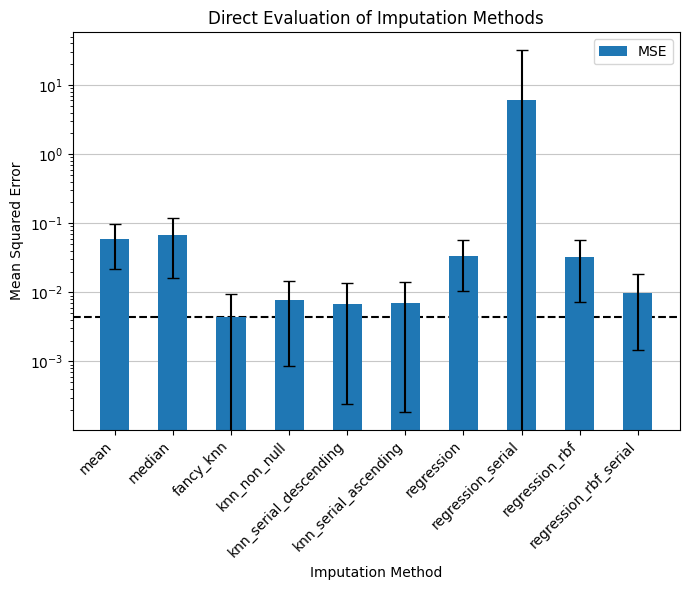

In [46]:
import matplotlib.pyplot as plt

methods = cv_results_df.index
mse_mean = cv_results_df['mse_mean']
mse_var = cv_results_df['mse_variance']

x = range(len(methods))

width = 0.5

plt.figure(figsize=(7, 6))

# Set grid behind bars
plt.grid(axis='y', alpha=0.7, zorder=1)
plt.bar(x, mse_mean, width, label='MSE', yerr=np.sqrt(mse_var), capsize=4, zorder=2)

plt.yscale('log')
plt.xlabel('Imputation Method')
plt.ylabel('Mean Squared Error')
plt.title('Direct Evaluation of Imputation Methods')
# plt.xticks([i + width/2 for i in x], methods, rotation=45, ha='right')  # Rotate x-axis labels
plt.xticks([i for i in x], methods, rotation=45, ha='right')  # Rotate x-axis labels

# add horizontal line for min mse in the background
plt.axhline(y=min(mse_mean), linestyle='--', zorder=-1, color='black')


plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Predict Happiness Score

We perform cross validation to compare the different regression methods for predicting the happiness score, for each method.

In [47]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
target = merged_df['Happiness Score']
happiness_pred_results = {}

for method, imputed_data in imputed_dfs.items():
    happiness_pred_results[method] = {}
    # Split the dataset into training and testing sets

    X = imputed_data
    y = target
    # if method == 'drop':
    #     y = y[X.index]

    scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
    happiness_pred_results[method]['Linear Regression'] = {'mse': -scores.mean(), 'var': np.var(scores)}
    # print(f"Linear, Method: {method}, MSE: {mse}")

    scores = cross_val_score(Ridge(max_iter=2000), X, y, cv=5, scoring='neg_mean_squared_error')
    happiness_pred_results[method]['Ridge'] = {'mse': -scores.mean(), 'var': np.var(scores)}
    # print(f"Ridge, Method: {method}, MSE: {mse}")

    scores = cross_val_score(Lasso(alpha=0.001, max_iter=2000), X, y, cv=5, scoring='neg_mean_squared_error')
    happiness_pred_results[method]['Lasso'] = {'mse': -scores.mean(), 'var': np.var(scores)}
    # print(f"Lasso, Method: {method}, MSE: {mse}")

### Full Results

In [48]:
for method, results in happiness_pred_results.items():
    row = ""
    print(f"{method}:")
    for model, res in results.items():
        print(f"{model}: Mean MSE: {res['mse']:.3f}, MSE Variance: {res['var']}")
    print()

drop:
Linear Regression: Mean MSE: 0.490, MSE Variance: 0.0008155831155209608
Ridge: Mean MSE: 0.495, MSE Variance: 0.0003807603910392054
Lasso: Mean MSE: 0.490, MSE Variance: 0.00046147053392069293

mean:
Linear Regression: Mean MSE: 434.159, MSE Variance: 618575.3825583059
Ridge: Mean MSE: 0.167, MSE Variance: 0.0015788315823978348
Lasso: Mean MSE: 0.174, MSE Variance: 0.0018635781031847865

median:
Linear Regression: Mean MSE: 380.955, MSE Variance: 446731.4189434137
Ridge: Mean MSE: 0.169, MSE Variance: 0.001607175972345339
Lasso: Mean MSE: 0.174, MSE Variance: 0.0019558393926055826

fancy_knn:
Linear Regression: Mean MSE: 19.803, MSE Variance: 705.4219068470615
Ridge: Mean MSE: 0.157, MSE Variance: 0.0016891612246566746
Lasso: Mean MSE: 0.160, MSE Variance: 0.0016052947237042091

knn_non_null:
Linear Regression: Mean MSE: 253.474, MSE Variance: 129278.09136731911
Ridge: Mean MSE: 0.159, MSE Variance: 0.0017028893073296456
Lasso: Mean MSE: 0.158, MSE Variance: 0.001802371462736007


### Plots

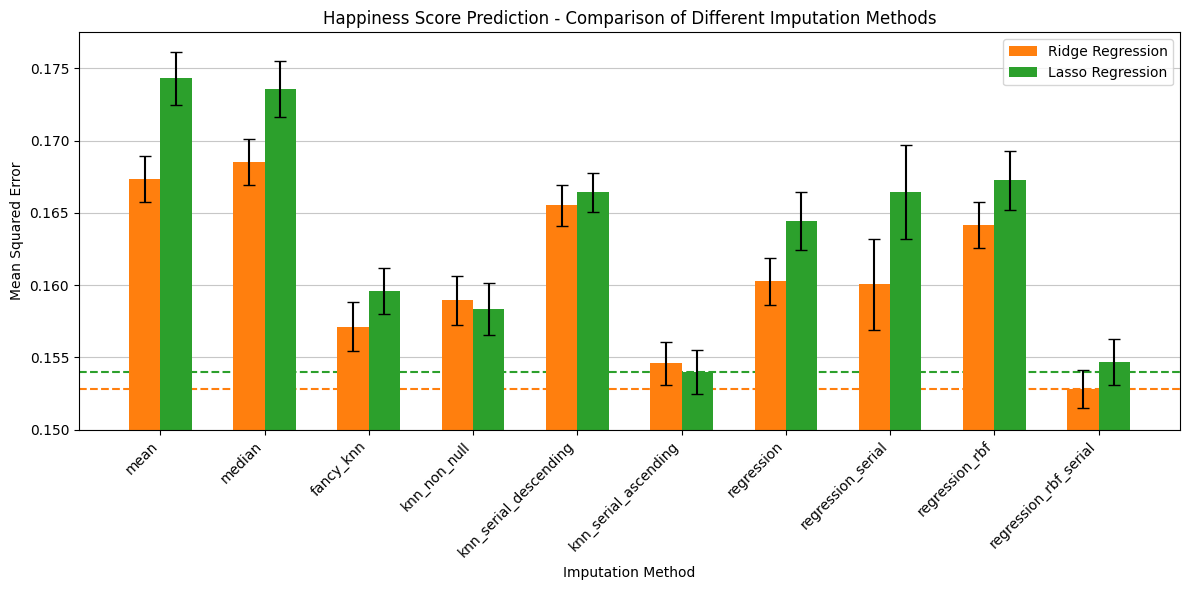

In [65]:
import matplotlib.pyplot as plt

methods = [k for k in imputed_dfs.keys() if k != 'drop']
ridge_mse = [happiness_pred_results[method]['Ridge']['mse'] for method in methods]
lasso_mse = [happiness_pred_results[method]['Lasso']['mse'] for method in methods]
ridge_var = [happiness_pred_results[method]['Ridge']['var'] for method in methods]
lasso_var = [happiness_pred_results[method]['Lasso']['var'] for method in methods]

x = range(len(methods))

width = 0.3

plt.figure(figsize=(12, 6))
plt.grid(axis='y', alpha=0.7, zorder=1)
plt.bar(x, ridge_mse, width, label='Ridge Regression', color='tab:orange', yerr=ridge_var, capsize=4, zorder=2)
plt.bar([i + width for i in x], lasso_mse, width, label='Lasso Regression', color='tab:green', yerr=lasso_var, capsize=4, zorder=2)

plt.ylim(0.15,0.1775)
plt.xlabel('Imputation Method')
plt.ylabel('Mean Squared Error')
plt.title('Happiness Score Prediction - Comparison of Different Imputation Methods')
plt.xticks([i + width/2 for i in x], methods, rotation=45, ha='right')  # Rotate x-axis labels

# add horizontal line for min mse in the background
plt.axhline(y=min(ridge_mse), linestyle='--', zorder=-1, color='tab:orange')
plt.axhline(y=min(lasso_mse), linestyle='--', zorder=-1, color='tab:green')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

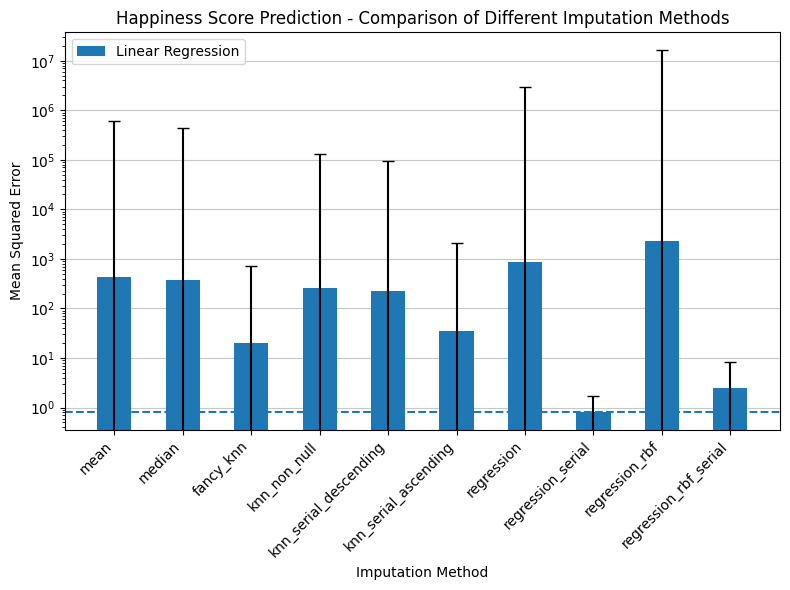

In [66]:
linear_mse = [happiness_pred_results[method]['Linear Regression']['mse'] for method in methods]
linear_var = [happiness_pred_results[method]['Linear Regression']['var'] for method in methods]

width = 0.5

plt.figure(figsize=(8, 6))
plt.grid(axis='y', alpha=0.7, zorder=1)
plt.bar(x, linear_mse, width, label='Linear Regression', yerr=linear_var, capsize=4, zorder=2)

# log y axis
plt.yscale('log')
plt.xlabel('Imputation Method')
plt.ylabel('Mean Squared Error')
plt.title('Happiness Score Prediction - Comparison of Different Imputation Methods')
plt.xticks(x, methods, rotation=45, ha='right')  # Rotate x-axis labels
# add horizontal line for min mse in the background
plt.axhline(y=min(linear_mse), linestyle='--', zorder=-1)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Correlations

<Axes: >

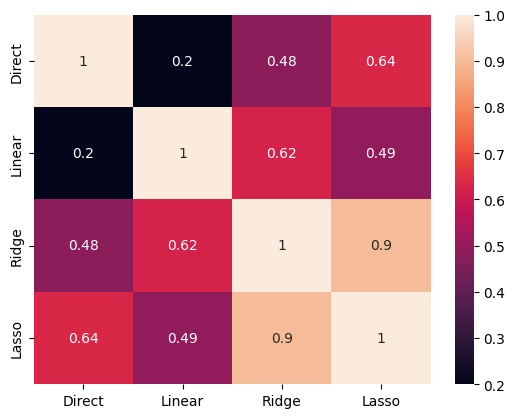

In [69]:
import seaborn as sns
# spearman correlation between each regression method mse and cv_results mse
rows = []

for method in methods:
    rows.append({"method": method, "Direct": cv_results[method]['mse_mean'], "Linear": happiness_pred_results[method]['Linear Regression']['mse'], "Ridge": happiness_pred_results[method]['Ridge']['mse'], "Lasso": happiness_pred_results[method]['Lasso']['mse']})

corr_df = pd.DataFrame(rows)
sns.heatmap(corr_df.drop('method', axis=1).corr(method='spearman'), annot=True)

## Analyze Best Performing Model

In [71]:
imputed_data = imputed_dfs['regression_rbf_serial']
target = merged_df['Happiness Score']
model = Ridge()
model.fit(imputed_data, target)

Ridge()

In [72]:
# calculate mse
y_pred = model.predict(imputed_data)
print(f"MSE on the full data: {mean_squared_error(target, y_pred)}")

MSE on the full data: 0.11723258245215358


In [74]:
# get top 5 coefficients:
top_5_coefs = abs(model.coef_).argsort()[-5:][::-1]

In [75]:
print("Top 5 Factors:")
for i in top_5_coefs:
    print(f"{imputed_data.columns[i]}: {model.coef_[i]:.2f}")

# # plot bars of top 5 and bottom 5
# import matplotlib.pyplot as plt
# plt.bar(imputed_data.columns[pos_top_5_coefs], model.coef_[pos_top_5_coefs])
# plt.bar(imputed_data.columns[neg_top_5_coefs], model.coef_[neg_top_5_coefs])

Top 5 Factors:
Region_Latin America & the Caribbean: 1.03
ef_legal_protection: 0.95
Unemployment: -0.90
ef_money_growth_data: 0.90
pf_ss_disappearances_violent_data: -0.86


<Axes: ylabel='Frequency'>

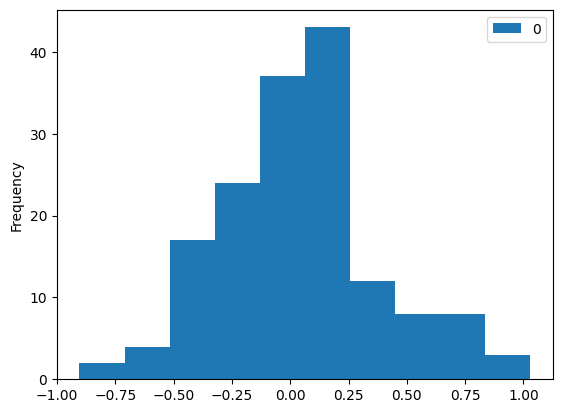

In [76]:
pd.DataFrame(model.coef_).plot(kind='hist')

## Learn Models for Different Regions

In [57]:
# group regions to avoid too small groups
imputed_data = imputed_dfs['regression_serial']
region_models = {}

grouped_regions = [['Western Europe', 'North America'],
       ['Middle East & North Africa'], ['Latin America & the Caribbean'],
       ['South Asia', 'East Asia', 'Oceania'],
       ['Eastern Europe', 'Caucasus & Central Asia'], ['Sub-Saharan Africa']]

for region_lst in grouped_regions:
    region_dfs_lst = [imputed_data[imputed_data[f'Region_{region}'] == 1][[c for c in imputed_data.columns if "Region" not in c]] for region in region_lst]
    region_df = pd.concat(region_dfs_lst)
    target_dfs_lst = [merged_df[merged_df['Region'] == region]['Happiness Score'] for region in region_lst]
    model = Ridge()
    model.fit(region_df, pd.concat(target_dfs_lst))
    region_models[" + ".join(region_lst)] = model

In [58]:
regions_top5_factors = {}
regions_happiness_scores = {}

for region_lst in grouped_regions:
    print(f"Region: {' + '.join(region_lst)}, # Countries: {pd.concat([merged_df[merged_df['Region'] == region]['Country'] for region in region_lst]).nunique()}")
    model_coefs = region_models[" + ".join(region_lst)].coef_
    top_5_coefs = abs(model_coefs).argsort()[-5:][::-1]

    # Compute the mean Happiness score for the region

    target_df = pd.concat([merged_df[merged_df['Region'] == region]['Happiness Score'] for region in region_lst])
    mean_happiness_score = target_df.mean()
    print(f"Mean Happiness Score: {mean_happiness_score:.2f}")
    regions_happiness_scores[" , ".join(region_lst)] = mean_happiness_score

    regions_top5_factors[" , ".join(region_lst)] = imputed_data.columns[top_5_coefs].to_list()

    print("Top 5 absolute value coefficients:")
    for idx, i in enumerate(top_5_coefs):
        print(f"{imputed_data.columns[i]}: {model_coefs[i]:.2f}")

        regions_top5_factors[" , ".join(region_lst)][idx] += ('+++' if model_coefs[i]>0 else '---')

    print('\n')

regions_top5_factors = {k: list(v) for k, v in regions_top5_factors.items()}
# for region, lst in regions_top5_factors.items():
#   for idx, factor in enumerate(lst):
#     if factor.startswith('ef_') or factor.startswith('pf_'):
#       regions_top5_factors[region][idx] = regions_top5_factors[region][idx][3:]

Region: Western Europe + North America, # Countries: 20
Mean Happiness Score: 6.96
Top 5 absolute value coefficients:
ef_legal_courts: 0.43
ef_government_consumption: -0.40
ef_regulation_business_adm: 0.40
ef_legal_protection: 0.37
ef_regulation_labor_hours: 0.33


Region: Middle East & North Africa, # Countries: 19
Mean Happiness Score: 5.37
Top 5 absolute value coefficients:
ef_government_consumption: -0.53
ef_government_consumption_data: 0.34
pf_rol: 0.32
ef_government: -0.30
Sanitation: -0.29


Region: Latin America & the Caribbean, # Countries: 23
Mean Happiness Score: 6.01
Top 5 absolute value coefficients:
ef_regulation_labor_hours: -0.61
pf_ss_disappearances_disap: -0.48
ef_legal_military: 0.45
ef_regulation_credit_private: -0.40
Unemployment: -0.37


Region: South Asia + East Asia + Oceania, # Countries: 21
Mean Happiness Score: 5.42
Top 5 absolute value coefficients:
Latitude: -0.57
IncomeGroup: 0.44
ef_government_consumption: -0.43
ef_regulation_labor_hours: 0.41
ef_regulati

In [59]:
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.3 MB/s eta 0:00:00


Happiness of countries

In [60]:
from pprint import pp

In [61]:
country_happiness = merged_df.groupby('Country')['Happiness Score'].mean().to_dict()

# Some processing to match the world object later
country_happiness.update({'United States of America': country_happiness.pop('United States')})
country_happiness.update({'United Republic of Tanzania': country_happiness.pop('Tanzania')})
country_happiness.update({'Democratic Republic of the Congo': country_happiness.pop('Congo (Kinshasa)')})
country_happiness.update({'Republic of the Congo': country_happiness.pop('Congo (Brazzaville)')})
country_happiness.update({'Republic of Serbia': country_happiness.pop('Serbia')})

# Construct a dict where the keys are regions, and the values are lists of countries in that region.
# The region names should be taken from the `regions_happiness_scores` keys
regions_countries = {}
for region, score in regions_happiness_scores.items():
    region_lst = region.split(' , ')
    regions_countries[region] = (pd.concat([merged_df[merged_df['Region'] == region] for region in region_lst]))['Country'].unique().tolist()
    if 'United States' in regions_countries[region]:
        regions_countries[region].remove('United States')
        regions_countries[region].append('United States of America')
    if 'Tanzania' in regions_countries[region]:
        regions_countries[region].remove('Tanzania')
        regions_countries[region].append('United Republic of Tanzania')
    if 'Congo (Kinshasa)' in regions_countries[region]:
        regions_countries[region].remove('Congo (Kinshasa)')
        regions_countries[region].append('Democratic Republic of the Congo')
    if 'Congo (Brazzaville)' in regions_countries[region]:
        regions_countries[region].remove('Congo (Brazzaville)')
        regions_countries[region].append('Republic of the Congo')
    if 'Serbia' in regions_countries[region]:
        regions_countries[region].remove('Serbia')
        regions_countries[region].append('Republic of Serbia')

# Demo - Happiness across the world

In [62]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import geopandas as gpd
import json

# Download world map data
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(url)

world['happiness_score'] = world['name'].map(country_happiness)

df = pd.DataFrame({
    'country': world['name'],
    'happiness_score': world['happiness_score']
})

# For Plotly choropleth, we can use the country names as location identifiers
# This approach doesn't require manual conversion of the geometry
fig = px.choropleth(
    df,
    locations='country',
    locationmode='country names',  # Use country names for matching
    color='happiness_score',
    color_continuous_scale='RdYlGn',  # Red to Yellow to Green
    range_color=[3, 8],
    projection='natural earth',
    hover_name='country',
    hover_data={'country': False, 'happiness_score': True},
    labels={'happiness_score': 'Happiness Score'}
)

# Improve the layout
fig.update_layout(
    title_text='World Happiness Scores (Hover over countries to see details)',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='aliceblue'
    ),
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    height=750
)

# Create Celestial Equator line (Latitude 0°)
equator_lats = [0] * 360  # Fixed latitude at 0°
equator_lons = list(range(-180, 180))  # Longitude from -180° to 180°

# Add Celestial Equator Line to the Map
equator_trace = px.line_geo(lat=equator_lats, lon=equator_lons).data[0]
equator_trace.line.color = 'black'
equator_trace.line.width = 2
equator_trace.line.dash = 'dash'
equator_trace.name = 'Celestial Equator'
equator_trace.hoverinfo = 'text'  # Enable hover info
equator_trace.hovertemplate = 'Celestial Equator<extra></extra>'  # Custom hover text

fig.add_trace(equator_trace)

# Update hover template to make it more informative
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Happiness Score: %{z}<extra></extra>'
)

# Show the map
fig.show()

# To save as an HTML file (can be opened in a browser and still be interactive)
# fig.write_html("interactive_happiness_map.html")

## Top factors for happiness in each region

In [63]:
regions_top5_factors_strings = regions_top5_factors.copy()
# Make the list of factors to a string, seperated with new line HTML character for plotly
for region, lst in regions_top5_factors.items():
  for idx, factor in enumerate(lst):
    regions_top5_factors_strings[region][idx] = (f"<span style='color: {'green' if '+++' in factor else 'red'}'>{factor}</b>").replace('+++', '').replace('---', '')

regions_top5_factors_strings = {region: '<br>'.join([f"{item}" for item in lst]) for factor in lst for region, lst in regions_top5_factors.items()}

# regions_top5_factors_strings = {region: '<br>'.join([f"<span style='color: green'>{item}</b>" for item in lst]) for region, lst in regions_top5_factors.items()}


In [64]:
world = gpd.read_file(url)

# Define regions and their scores
region_scores = regions_happiness_scores

# Define region descriptions
region_descriptions = regions_top5_factors_strings

# Define regions and their countries
regions = regions_countries

# Create a mapping from country to region
country_to_region = {}
for region, countries in regions.items():
    for country in countries:
        country_to_region[country] = region

# Add region information to the GeoDataFrame
world['region'] = world['name'].map(country_to_region)
world['region_score'] = world['region'].map(region_scores)
world['region_description'] = world['region'].map(region_descriptions)

# Fill NA values for countries not in any region
world['region'] = world['region'].fillna('Other')
# world['region_score'] = world['region_score'].fillna(0)
world['region_description'] = world['region_description'].fillna('No description available')

# Create a DataFrame for plotting
df = pd.DataFrame({
    'country': world['name'],
    'region': world['region'],
    'region_score': world['region_score'],
    'region_description': world['region_description']
})

# Create a hover text with all the information we want to display
# df['hover_text'] = df.apply(
#     lambda row: f"<b>Country:</b> {row['country']}<br>" +
#                 f"<b>Region:</b> {row['region']}<br>" +
#                 f"<b>Region Score:</b> {row['region_score']:.1f}<br>" +
#                 f"<b>Description:</b> {row['region_description']}",
#     axis=1
# )
df['hover_text'] = df.apply(
    lambda row: f"<b>Country:</b> {row['country']}<br>" +
                f"<b>Region:</b> {row['region']}<br>" +
                f"<b>Region Score:</b> {row['region_score']:.1f}<br>" +
                f"<b>Top Factors:</b><br>{row['region_description']}",
    axis=1
)


# Create Celestial Equator Line (Latitude 0°)
equator_lats = [0] * 360
equator_lons = list(range(-180, 180))

# Add Celestial Equator Line FIRST to keep it in the background
equator_trace = go.Scattergeo(
    lon=equator_lons,
    lat=equator_lats,
    mode='lines',
    line=dict(color='black', width=2, dash='dash'),
    name='Celestial Equator',
    hoverinfo='text',
    text='Celestial Equator',
    showlegend=True  # Optional
)

# Start the figure
fig = go.Figure()

# Add the equator trace first
fig.add_trace(equator_trace)

# Create the choropleth map
choropleth = px.choropleth(
    df,
    locations='country',
    locationmode='country names',
    color='region_score',
    color_continuous_scale='RdYlGn',
    range_color=[4, 8],
    hover_data={'country': False, 'region': False, 'region_score': False, 'region_description': False},
    custom_data=['hover_text'],
    labels={'region_score': 'Region Score'}
).data[0]

# Add the choropleth trace on top
fig.add_trace(choropleth)

# Re-apply the color axis manually
fig.update_layout(
    coloraxis=dict(
        colorscale='RdYlGn',
        colorbar_title='Region Score',
        cmin=4,
        cmax=8
    ),
    title_text='World Map by Region Scores',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
        showland=True,
        landcolor='lightgray',  # Land color restored!
        showocean=True,
        oceancolor='aliceblue'  # Ocean color restored!
    ),
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    height=750
)

# Update hover template for countries only
fig.update_traces(
    hovertemplate='%{customdata[0]}<extra></extra>',
    selector=dict(type='choropleth')
)

# Show the map
fig.show()
